# **Table of Contents**

1.   Table of contents

2.   Bibliography

3.   Contexte

4.   Librairies and dataframe's Import





# **Bibliography**

. Consignes : https://openclassrooms.com/fr/paths/324/projects/862/assignment

. Données : https://www.fao.org/faostat/fr/#data/

. Transfer Learning : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/


# **Contexte**

La poule qui chante, a French food company that wants to expand internationally.

International, yes, but for the moment, the field of possibilities is very wide: no particular country or continent has been chosen for the moment. All countries are possible!

Currently, our objective is to offer an initial analysis of the groupings of countries that we can target to export our chickens. We will then delve deeper into the market research.

Patrick, the manager, asks us, as data analyst at "the singing hen", to first test the hierarchical ascending classification, with a dendrogram as visualization. Then use the k-means method, in order to refine the analysis and compare the results of the two clustering methods.


It also indicates not to hesitate to take the time to analyze the centroids of the classes found. We can also carry out a PCA in order to visualize the results of your analysis, understand the groups, the links between the variables, the links between individuals...

# **Librairies and dataframe's Import**

In [ ]:
# Common libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as msno
import os
from os import listdir
import time
import scipy.stats
from scipy import stats
from pylab import figure, text, scatter, show
import re
import warnings
warnings.filterwarnings('ignore')
!pip install pycountry geopy pandas
from geopy.distance import geodesic
import geopandas as gpd
import pycountry
from geopy.geocoders import Nominatim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_population = pd.read_csv(
'/content/drive/MyDrive/projet 9 data analyse/Population_2000_2018.csv',
low_memory=False)

data_disponibility = pd.read_csv(
'/content/drive/MyDrive/projet 9 data analyse/DisponibiliteAlimentaire_2017.csv'
, low_memory=False)


# **Exploratory analysis**

We will explore our data

In [ ]:
# Show the first 5 lines
data_population.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

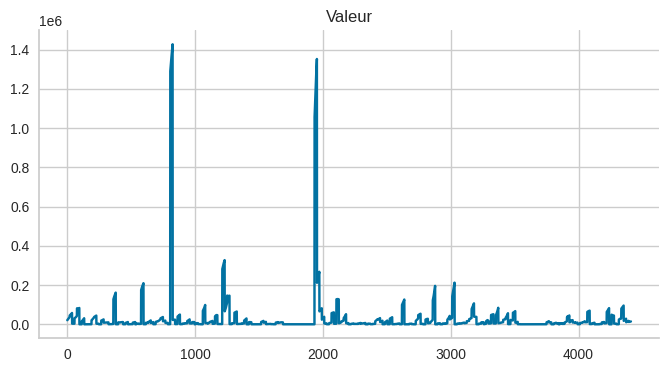

In [ ]:
# @title Valeur

from matplotlib import pyplot as plt
data_population['Valeur'].plot(kind='line', figsize=(8, 4), title='Valeur')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Show the first 5 lines
data_disponibility.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

In [ ]:
def data_details(data):
    """
    This function allows, for a data set, to present and view:
      - the number of lines
      - the number of columns
      - the type of data in each column
      - the column name
      - the number of unique values in each column
      - A list containing the unique values of each column, if
        the length of the list does not exceed 100 values
      - the number of missing values in each column
      - the percentage of missing values in each column
      - the number of null values in each column (for numeric columns only)
      - the number of negative values in each column (for numeric columns only)
      - the number of duplicates in each column
    """

    print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns')
    columns = data.columns

    Nan_counts = data.isnull().sum().tolist()
    Neg_counts = []
    for column in columns:
        if data[column].dtype in ['int64', 'float64']:
            Neg_counts.append((data[column] < 0).sum())
        else:
            Neg_counts.append(np.nan)

    Nan_ratio = (data.isnull().sum() / len(data)).values
    Neg_ratio = []
    for column in columns:
        if data[column].dtype in ['int64', 'float64']:
            Neg_ratio.append(((data[column] < 0).sum() / len(data)) * 100)
        else:
            Neg_ratio.append(np.nan)

    Type = data.dtypes.tolist()
    count = [len(data[i].unique()) for i in columns]

    # Count number of duplicates in each column
    duplicates_count = [data[i].duplicated().sum() for i in columns]

    df = pd.DataFrame({'Columns name': columns,
                       'Type': Type,
                       '# unique values': count,
                       '# Nan values': Nan_counts,
                       '# Neg values': Neg_counts,
                       '% Nan values': Nan_ratio * 100,
                       '% Neg values': Neg_ratio,
                       '# duplicates': duplicates_count
                       })
    return df


def data_summary(data):
  """
 This function provides a summary of the dataset:
    - the number of lines
    - the number of columns
    - the number of datatype of the columns
    - the percentage of missing values ​​in the dataset
  """

  total_per_missing_data = (data.isnull().sum()/len(data)).values.\
  sum()/data.shape[1]*100

  df= pd.DataFrame({'# Columns':data.shape[1],
                    '# Rows':data.shape[0],
                    '# Col Types':data.dtypes.nunique(),
                    'Col Types and #':[[(index,count) for count, index in
                                        zip(data.dtypes.value_counts(),
                                            data.dtypes.value_counts().index)
                                        ]],
                    'Nan total %':total_per_missing_data
                    })
  return df

def data_plot(x):
    plt.figure(figsize=(5, 5))
    wedges, texts, autotexts = plt.pie(x=np.squeeze(x),
                                       labels=['% missing value',
                                               '% non-missing value'],
                                       autopct='%1.1f%%',
                                       explode=(0, 0.1),
                                       shadow=True,
                                       startangle=0)

    plt.title('% total Nan in the dataset', pad=20)

    # Incliner le texte "missing value"
    for text in texts:
        if text.get_text() == '% missing value':
            text.set_rotation(45)

    plt.legend(title="Legend",
               loc="center left",
               bbox_to_anchor=(1.05, 0.5),
               borderaxespad=0.)
    plt.show()


def data_presentation(data):
  """
  This function provides a representation of the dataset
  """
  print()
  print()
  print('Display the first 5 rows of the dataset')
  print()
  print()
  display(data.head())

  print()
  print()
  print('Display the last 5 rows of the dataset')
  print()
  print()
  display(data.tail())

  print()
  print()
  print('Display a summary of the dataset')
  print()
  print()
  df_summary = data_summary(data)
  display(df_summary)


  print()
  print()
  print('Display a summary of the columns of the dataset')
  print()
  print()
  df_details = data_details(data)
  display(df_details)

  print()
  print()
  print('Display a summary of the types of columns in the dataset')
  print()
  print()
  display(df_details.Type.value_counts().to_frame())

  print()
  print()
  print('Percentage of missing values ​​in the dataset')
  print()
  print()
  data_plot([df_summary.iloc[:,-1],
             100 - df_summary.iloc[:,-1]]
            )

  return None


def shape_details(df):
  print(f"Number of lines : {df.shape[0]}")
  print(f"Number of columns : {df.shape[1]}")
  return None

def data_checking(df):
  """
  Get information related to the data frame data as:
  - Head
  - Tail
  - Missing values percentage and numbers
  - Number of unique values
  - Number of different columns type

  """

  shape_details(df)
  print(100*'__')
  print(100*'__')
  data_presentation(df)
  print(100*'__')
  print(100*'__')
  msno.bar(df)


Number of lines : 4411
Number of columns : 15
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN



Display the last 5 rows of the dataset




Code Domaine                       Domaine  Code zone      Zone  \
4406           OA  Séries temporelles annuelles        181  Zimbabwe   
4407           OA  Séries temporelles annuelles        181  Zimbabwe   
4408           OA  Séries temporelles annuelles        181  Zimbabwe   
4409           OA  Séries temporelles annuelles        181  Zimbabwe   
4410           OA  Séries temporelles annuelles        181  Zimbabwe   

      Code Élément            Élément  Code Produit                 Produit  \
4406           511  Population totale          3010  Population-Estimations   
4407           511  Population totale          3010  Population-Estimations   
4408           511  Population totale          3010  Population-Estimations   
4409           511  Population totale          3010  Population-Estimations   
4410           511  Population totale          3010  Population-Estimations   

      Code année  Année           Unité     Valeur Symbole  \
4406        2014   2014  1000 personnes  13586.707       X   
4407        2015   2015  1000 personnes  13814.629       X   
4408        2016   2016  1000 personnes  14030.331       X   
4409        2017   2017  1000 personnes  14236.595       X   
4410        2018   2018  1000 personnes  14438.802       X   

             Description du Symbole Note  
4406  Sources internationales sûres  NaN  
4407  Sources internationales sûres  NaN  
4408  Sources internationales sûres  NaN  
4409  Sources internationales sûres  NaN  
4410  Sources internationales sûres  NaN



Display a summary of the dataset




# Columns  # Rows  # Col Types                          Col Types and #  \
0         15    4411            3  [(object, 9), (int64, 5), (float64, 1)]   

   Nan total %  
0     6.276732



Display a summary of the columns of the dataset


Dataset contains 4411 rows and 15 columns


Columns name     Type  # unique values  # Nan values  \
0             Code Domaine   object                1             0   
1                  Domaine   object                1             0   
2                Code zone    int64              238             0   
3                     Zone   object              238             0   
4             Code Élément    int64                1             0   
5                  Élément   object                1             0   
6             Code Produit    int64                1             0   
7                  Produit   object                1             0   
8               Code année    int64               19             0   
9                    Année    int64               19             0   
10                   Unité   object                1             0   
11                  Valeur  float64             4398             0   
12                 Symbole   object                2             0   
13  Description du Symbole   object                2             0   
14                    Note   object                2          4153   

    # Neg values  % Nan values  % Neg values  # duplicates  
0            NaN      0.000000           NaN          4410  
1            NaN      0.000000           NaN          4410  
2            0.0      0.000000           0.0          4173  
3            NaN      0.000000           NaN          4173  
4            0.0      0.000000           0.0          4410  
5            NaN      0.000000           NaN          4410  
6            0.0      0.000000           0.0          4410  
7            NaN      0.000000           NaN          4410  
8            0.0      0.000000           0.0          4392  
9            0.0      0.000000           0.0          4392  
10           NaN      0.000000           NaN          4410  
11           0.0      0.000000           0.0            13  
12           NaN      0.000000           NaN          4409  
13           NaN      0.000000           NaN          4409  
14           NaN     94.150986           NaN          4409



Display a summary of the types of columns in the dataset




count
Type          
object       9
int64        5
float64      1



Percentage of missing values ​​in the dataset




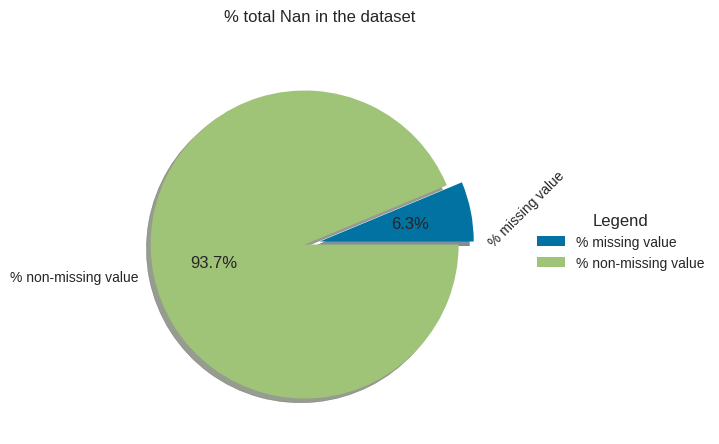

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


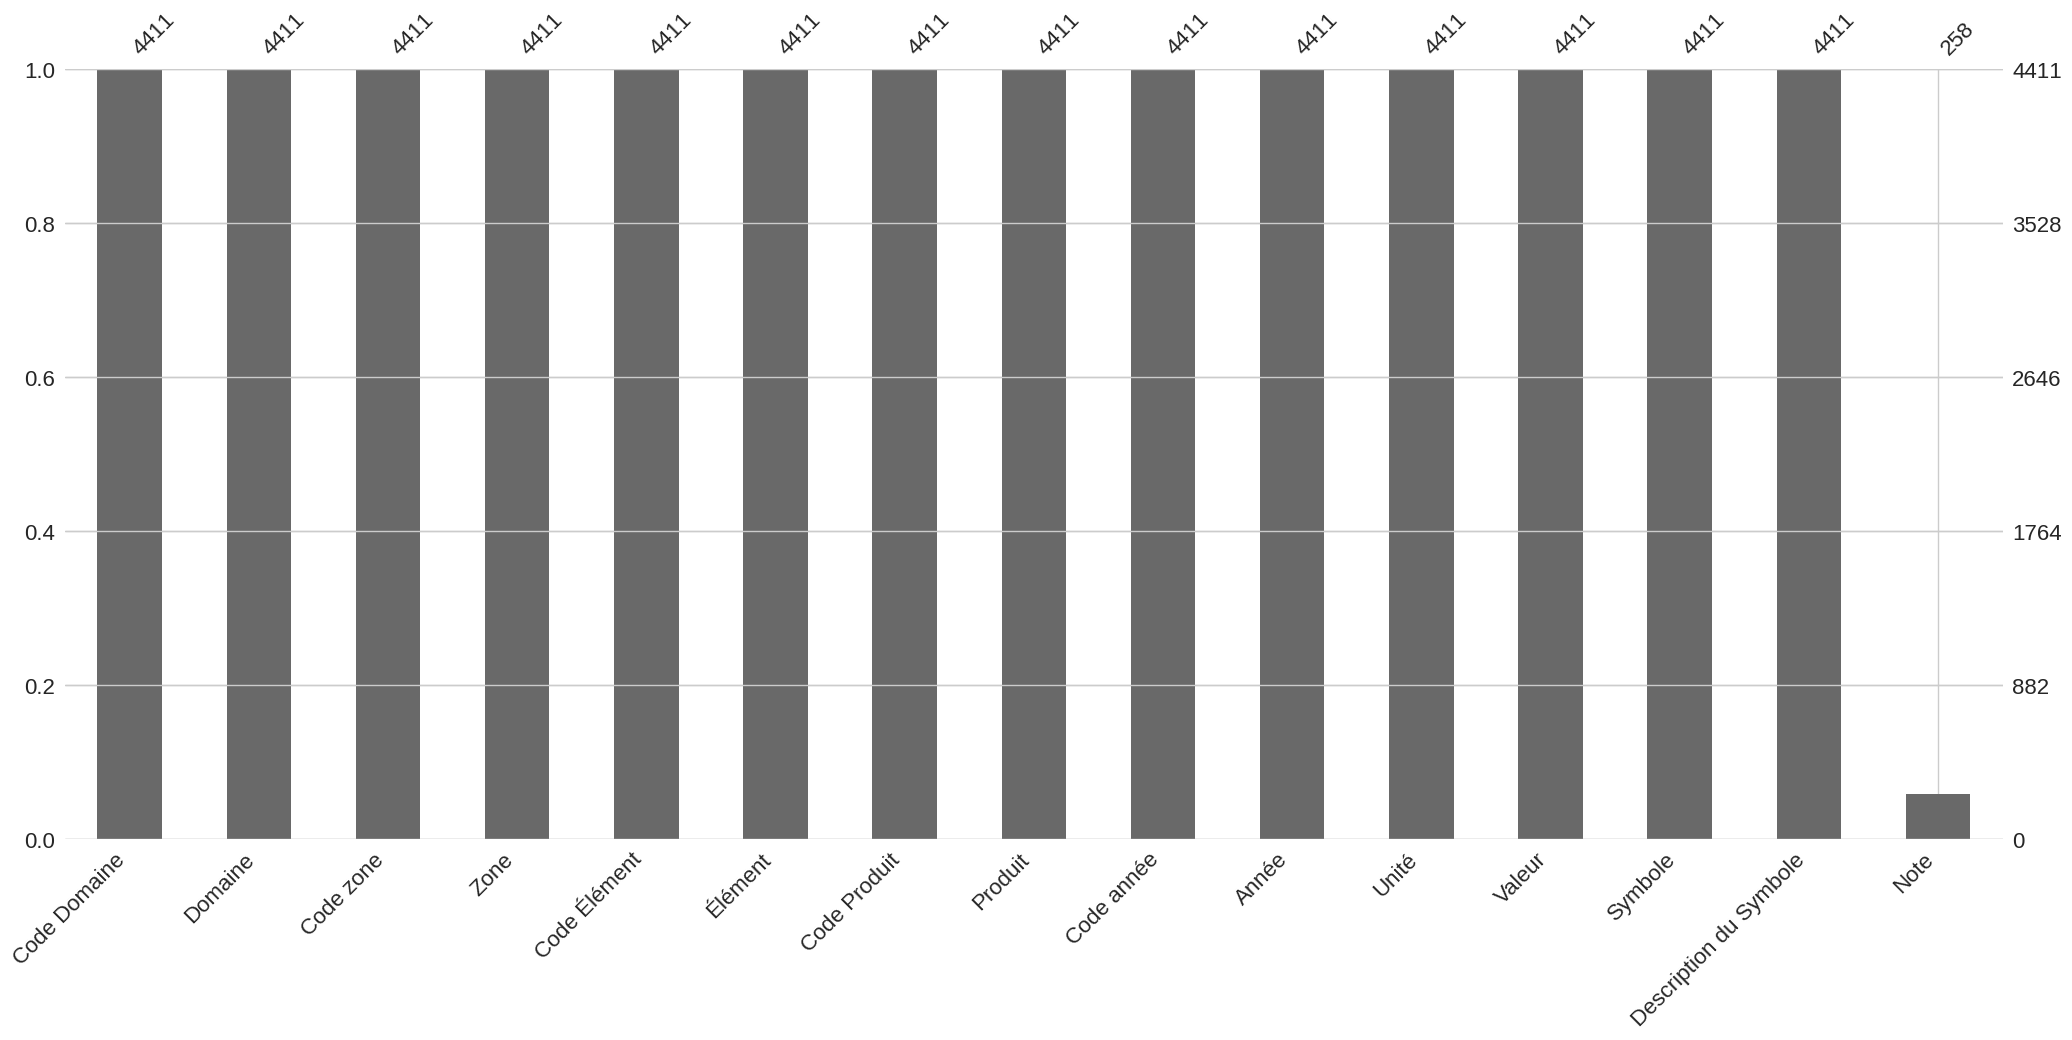

In [ ]:
data_checking(data_population)

We notice that:

This table describes the population of each country over different years.

There are 4398 different 'Valeur' for 4155 rows (population) so there are repeated 'Valeur'.

The unit of the 'Value' variable is in 1000 people from which we will multiply each value by 1000 then we will delete the 'Unit' variable.

There are 238 'Code zone' for 238 different 'Zone'.

There are 4153 missing values ​​for the 'Note' variable (94%), so it is better to remove it.


The 'Année' and 'Code année' variables are identical, from where one can be deleted, each one contains 19 different value.

Variables 'Unité', 'Produit', 'Code produit', 'Elément', 'Code Elément', 'Domaine' and 'Code Domaine' seem irrelevant in the following analysis, so we will delete them.

In [ ]:
# Multiply the Value column by 1000 and rename it
data_population['Valeur'] *= 1000
data_population.rename(columns={'Valeur': 'Population'}, inplace=True)

# Drop the column 'Unité'
data_population.drop(columns=['Unité'], inplace=True)
data_population.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année  Population Symbole         Description du Symbole Note  
0        2000   2000  20779953.0       X  Sources internationales sûres  NaN  
1        2001   2001  21606988.0       X  Sources internationales sûres  NaN  
2        2002   2002  22600770.0       X  Sources internationales sûres  NaN  
3        2003   2003  23680871.0       X  Sources internationales sûres  NaN  
4        2004   2004  24726684.0       X  Sources internationales sûres  NaN

In [ ]:
data_population['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

We notice the presence of different regions of China so we must leave only mainland China.

In [ ]:
# Areas to filter
Areas_to_filter = ['Chine - RAS de Hong-Kong','Chine - RAS de Macao',
                   'Chine, continentale', 'Chine']

# Filter rows where 'Area' is in the specified list
filtered_data = data_population[data_population['Zone'].isin(Areas_to_filter)]


filtered_data

Code Domaine                       Domaine  Code zone  \
768           OA  Séries temporelles annuelles         96   
769           OA  Séries temporelles annuelles         96   
770           OA  Séries temporelles annuelles         96   
771           OA  Séries temporelles annuelles         96   
772           OA  Séries temporelles annuelles         96   
773           OA  Séries temporelles annuelles         96   
774           OA  Séries temporelles annuelles         96   
775           OA  Séries temporelles annuelles         96   
776           OA  Séries temporelles annuelles         96   
777           OA  Séries temporelles annuelles         96   
778           OA  Séries temporelles annuelles         96   
779           OA  Séries temporelles annuelles         96   
780           OA  Séries temporelles annuelles         96   
781           OA  Séries temporelles annuelles         96   
782           OA  Séries temporelles annuelles         96   
783           OA  Séries temporelles annuelles         96   
784           OA  Séries temporelles annuelles         96   
785           OA  Séries temporelles annuelles         96   
786           OA  Séries temporelles annuelles         96   
787           OA  Séries temporelles annuelles        128   
788           OA  Séries temporelles annuelles        128   
789           OA  Séries temporelles annuelles        128   
790           OA  Séries temporelles annuelles        128   
791           OA  Séries temporelles annuelles        128   
792           OA  Séries temporelles annuelles        128   
793           OA  Séries temporelles annuelles        128   
794           OA  Séries temporelles annuelles        128   
795           OA  Séries temporelles annuelles        128   
796           OA  Séries temporelles annuelles        128   
797           OA  Séries temporelles annuelles        128   
798           OA  Séries temporelles annuelles        128   
799           OA  Séries temporelles annuelles        128   
800           OA  Séries temporelles annuelles        128   
801           OA  Séries temporelles annuelles        128   
802           OA  Séries temporelles annuelles        128   
803           OA  Séries temporelles annuelles        128   
804           OA  Séries temporelles annuelles        128   
805           OA  Séries temporelles annuelles        128   
806           OA  Séries temporelles annuelles         41   
807           OA  Séries temporelles annuelles         41   
808           OA  Séries temporelles annuelles         41   
809           OA  Séries temporelles annuelles         41   
810           OA  Séries temporelles annuelles         41   
811           OA  Séries temporelles annuelles         41   
812           OA  Séries temporelles annuelles         41   
813           OA  Séries temporelles annuelles         41   
814           OA  Séries temporelles annuelles         41   
815           OA  Séries temporelles annuelles         41   
816           OA  Séries temporelles annuelles         41   
817           OA  Séries temporelles annuelles         41   
818           OA  Séries temporelles annuelles         41   
819           OA  Séries temporelles annuelles         41   
820           OA  Séries temporelles annuelles         41   
821           OA  Séries temporelles annuelles         41   
822           OA  Séries temporelles annuelles         41   
823           OA  Séries temporelles annuelles         41   
824           OA  Séries temporelles annuelles         41   

                         Zone  Code Élément            Élément  Code Produit  \
768  Chine - RAS de Hong-Kong           511  Population totale          3010   
769  Chine - RAS de Hong-Kong           511  Population totale          3010   
770  Chine - RAS de Hong-Kong           511  Population totale          3010   
771  Chine - RAS de Hong-Kong           511  Population totale          3010   
772  Chine - RAS de Hong-Kong           511  Population totale   

In [ ]:
# Keep only “Chine, continentale” and other countries
filtered_data = data_population\
 [(data_population['Zone'] == 'Chine, continentale') |
 (~data_population['Zone'].str.contains('Chine', case=False))]
filtered_data.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année  Population Symbole         Description du Symbole Note  
0        2000   2000  20779953.0       X  Sources internationales sûres  NaN  
1        2001   2001  21606988.0       X  Sources internationales sûres  NaN  
2        2002   2002  22600770.0       X  Sources internationales sûres  NaN  
3        2003   2003  23680871.0       X  Sources internationales sûres  NaN  
4        2004   2004  24726684.0       X  Sources internationales sûres  NaN

Now we are going to use pivot table to present the table in another, more meaningful way

In [ ]:
# Select only the year 2017
filterd_data_2017 = filtered_data[filtered_data['Année']==2017]

In [ ]:
# Take into account only the variables of interest in our study
population_2017 = filterd_data_2017[['Zone','Population']]


# Show first 5 lines
population_2017.head()

Zone  Population
17     Afghanistan  36296113.0
36  Afrique du Sud  57009756.0
55         Albanie   2884169.0
74         Algérie  41389189.0
93       Allemagne  82658409.0

In [ ]:
data_disponibility.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

Number of lines : 176600
Number of columns : 14
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées



Display the last 5 rows of the dataset




Code Domaine                      Domaine  Code zone      Zone  \
176595          FBS  Nouveaux Bilans Alimentaire        181  Zimbabwe   
176596          FBS  Nouveaux Bilans Alimentaire        181  Zimbabwe   
176597          FBS  Nouveaux Bilans Alimentaire        181  Zimbabwe   
176598          FBS  Nouveaux Bilans Alimentaire        181  Zimbabwe   
176599          FBS  Nouveaux Bilans Alimentaire        181  Zimbabwe   

        Code Élément                                            Élément  \
176595          5142                                         Nourriture   
176596           645  Disponibilité alimentaire en quantité (kg/pers...   
176597           664     Disponibilité alimentaire (Kcal/personne/jour)   
176598           674  Disponibilité de protéines en quantité (g/pers...   
176599           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit       Produit  Code année  Année               Unité  \
176595          2899  Miscellanees        2017   2017  Milliers de tonnes   
176596          2899  Miscellanees        2017   2017                  kg   
176597          2899  Miscellanees        2017   2017  Kcal/personne/jour   
176598          2899  Miscellanees        2017   2017     g/personne/jour   
176599          2899  Miscellanees        2017   2017     g/personne/jour   

        Valeur Symbole Description du Symbole  
176595   19.00       S  Données standardisées  
176596    1.33      Fc        Donnée calculée  
176597    1.00      Fc        Donnée calculée  
176598    0.04      Fc        Donnée calculée  
176599    0.02      Fc        Donnée calculée



Display a summary of the dataset




# Columns  # Rows  # Col Types                          Col Types and #  \
0         14  176600            3  [(object, 8), (int64, 5), (float64, 1)]   

   Nan total %  
0          0.0



Display a summary of the columns of the dataset


Dataset contains 176600 rows and 14 columns


Columns name     Type  # unique values  # Nan values  \
0             Code Domaine   object                1             0   
1                  Domaine   object                1             0   
2                Code zone    int64              174             0   
3                     Zone   object              174             0   
4             Code Élément    int64               17             0   
5                  Élément   object               17             0   
6             Code Produit    int64               98             0   
7                  Produit   object               98             0   
8               Code année    int64                1             0   
9                    Année    int64                1             0   
10                   Unité   object                4             0   
11                  Valeur  float64             7250             0   
12                 Symbole   object                2             0   
13  Description du Symbole   object                2             0   

    # Neg values  % Nan values  % Neg values  # duplicates  
0            NaN           0.0           NaN        176599  
1            NaN           0.0           NaN        176599  
2            0.0           0.0      0.000000        176426  
3            NaN           0.0           NaN        176426  
4            0.0           0.0      0.000000        176583  
5            NaN           0.0           NaN        176583  
6            0.0           0.0      0.000000        176502  
7            NaN           0.0           NaN        176502  
8            0.0           0.0      0.000000        176599  
9            0.0           0.0      0.000000        176599  
10           NaN           0.0           NaN        176596  
11        2544.0           0.0      1.440544        169350  
12           NaN           0.0           NaN        176598  
13           NaN           0.0           NaN        176598



Display a summary of the types of columns in the dataset




count
Type          
object       8
int64        5
float64      1



Percentage of missing values ​​in the dataset




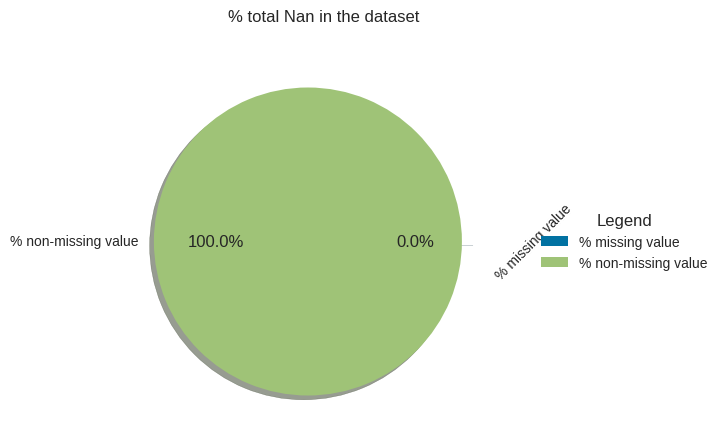

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


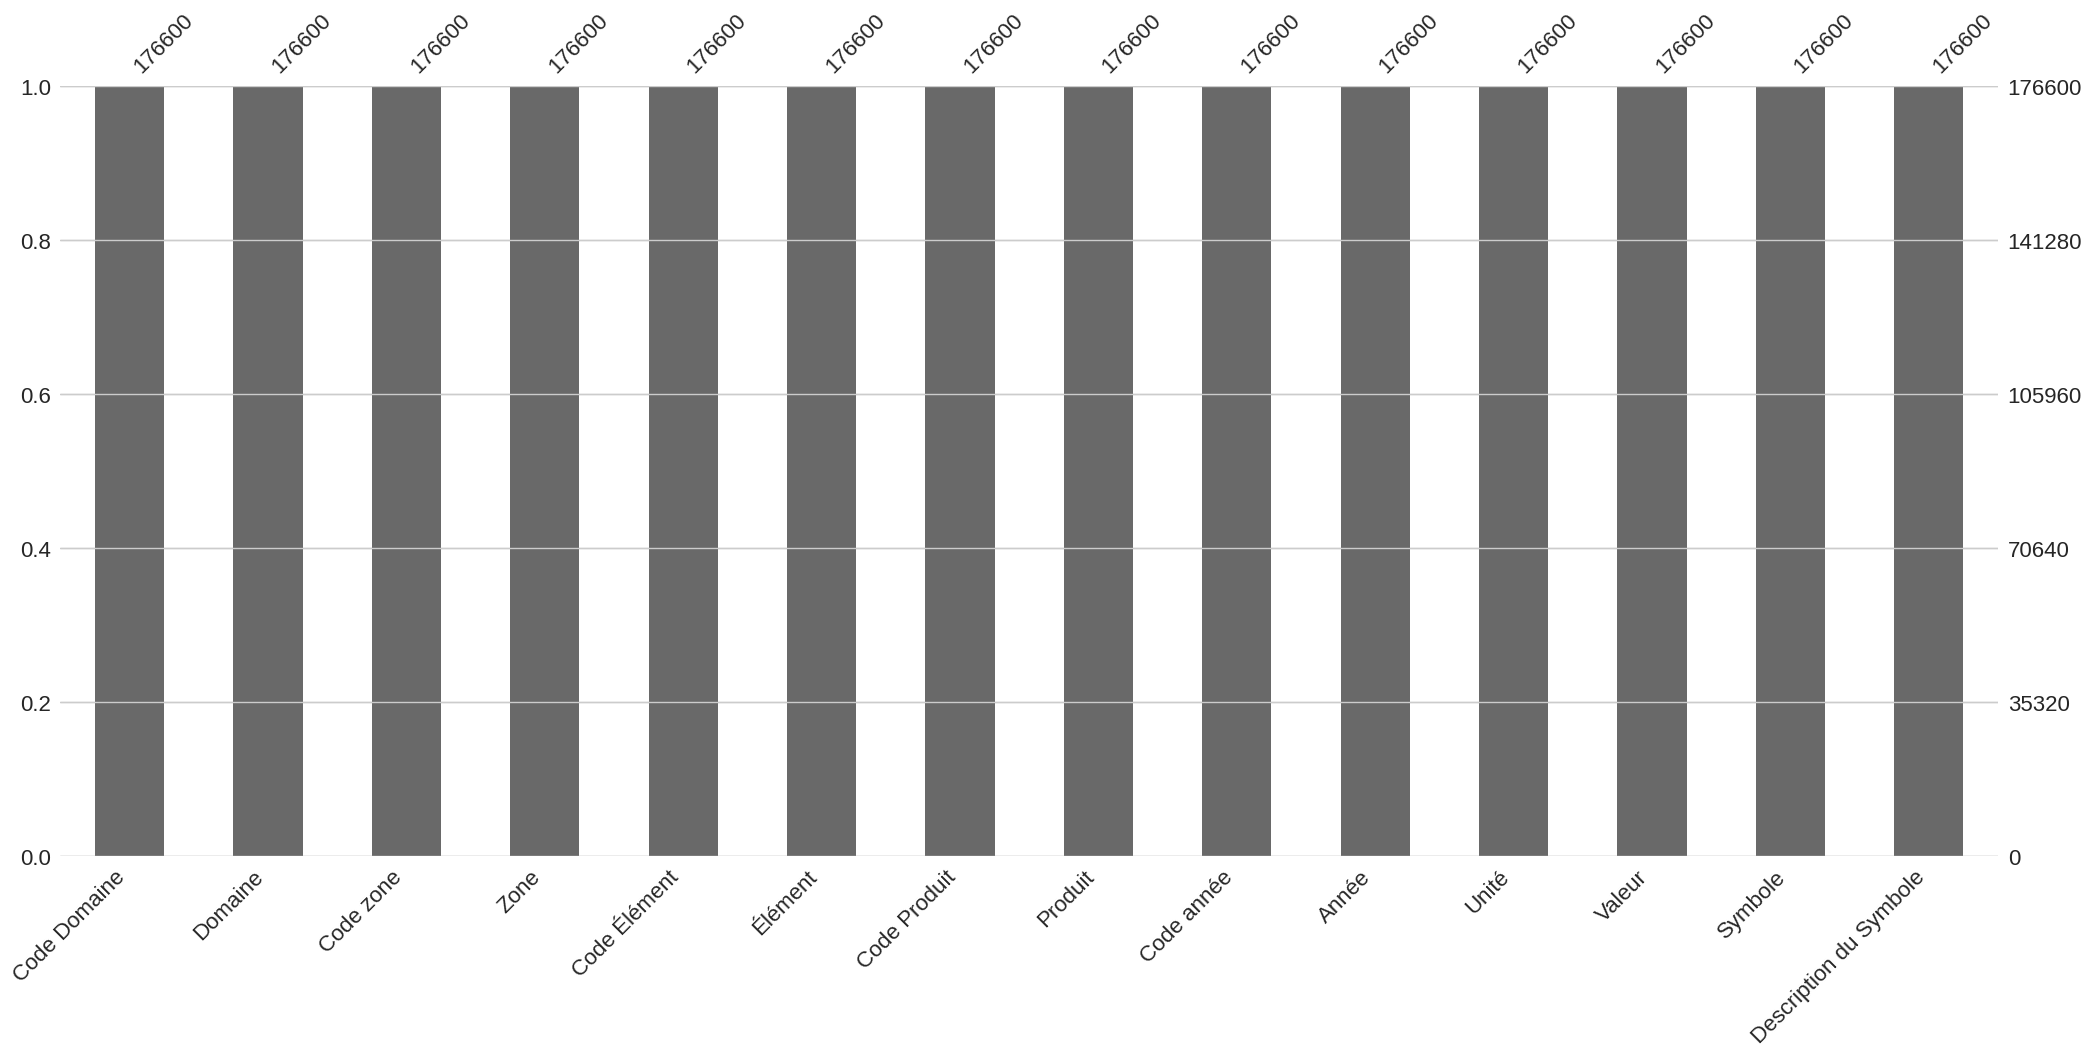

In [ ]:
data_checking(data_disponibility)

We notice that:

This table describes different products in different countries.

There are 98 different 'Produit' for 176600 rows so there are repeated 'Produit'.

There are 174 'Code zone' for 174 different 'Zone'.

There are 7250 different 'Values' of which 2544 are negative values.

In [ ]:
# Multiply the Value column by 1000 (go from thousands of tonnes to kg)
data_disponibility.loc[data_disponibility['Unité'] == 'Milliers de tonnes',
                       'Valeur'] *= 1000

We will use the pivot table to better visualize the data disponibility.

In [ ]:
# Summarize data with pivot_table
disponibility = data_disponibility.pivot_table(index=['Zone','Produit'],
                                               columns='Élément',
                                               values='Valeur',aggfunc='sum')

# Show first 5 lines
disponibility.head()

Élément                             Alimentation pour touristes  \
Zone        Produit                                               
Afghanistan Abats Comestible                                NaN   
            Agrumes, Autres                                 NaN   
            Alcool, non Comestible                          NaN   
            Aliments pour enfants                           NaN   
            Ananas et produits                              NaN   

Élément                             Aliments pour animaux  \
Zone        Produit                                         
Afghanistan Abats Comestible                          NaN   
            Agrumes, Autres                           NaN   
            Alcool, non Comestible                    NaN   
            Aliments pour enfants                     NaN   
            Ananas et produits                        NaN   

Élément                             Autres utilisations (non alimentaire)  \
Zone        Produit                                                         
Afghanistan Abats Comestible                                          NaN   
            Agrumes, Autres                                           NaN   
            Alcool, non Comestible                                    NaN   
            Aliments pour enfants                                     NaN   
            Ananas et produits                                        NaN   

Élément                             Disponibilité alimentaire (Kcal/personne/jour)  \
Zone        Produit                                                                  
Afghanistan Abats Comestible                                                   5.0   
            Agrumes, Autres                                                    1.0   
            Alcool, non Comestible                                             NaN   
            Aliments pour enfants                                              1.0   
            Ananas et produits                                                 0.0   

Élément                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone        Produit                                                                          
Afghanistan Abats Comestible                                                     1.47        
            Agrumes, Autres                                                      1.32        
            Alcool, non Comestible                                                NaN        
            Aliments pour enfants                                                0.10        
            Ananas et produits                                                   0.00        

Élément                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone        Produit                                                                                 
Afghanistan Abats Comestible                                                     0.19               
            Agrumes, Autres                                                      0.01               
            Alcool, non Comestible                                                NaN               
            Aliments pour enfants                                                0.01               
            Ananas et produits                                                   0.00               

Élément                             Disponibilité de protéines en quantité (g/personne/jour)  \
Zone        Produit                                                                            
Afghanistan Abats Comestible                                                     0.64          
            Agrumes, Autres                                                      0.02          
            Alcool, non Comestible                                                NaN          
            Aliments pour enfants                                                0.04          
            Anan

In [ ]:
disponibility.describe()

Élément  Alimentation pour touristes  Aliments pour animaux  \
count                    5560.000000           4.188000e+03   
mean                      179.496403           3.619432e+05   
std                      3589.396513           4.045920e+06   
min                    -44000.000000          -2.000000e+03   
25%                         0.000000           0.000000e+00   
50%                         0.000000           1.000000e+03   
75%                         0.000000           3.100000e+04   
max                    166000.000000           1.875530e+08   

Élément  Autres utilisations (non alimentaire)  \
count                             5.292000e+03   
mean                              1.757649e+05   
std                               4.979485e+06   
min                              -1.000000e+03   
25%                               0.000000e+00   
50%                               0.000000e+00   
75%                               4.000000e+03   
max                               3.196030e+08   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
count                                      14476.000000   
mean                                          33.962697   
std                                          106.684337   
min                                            0.000000   
25%                                            0.000000   
50%                                            3.000000   
75%                                           20.000000   
max                                         1785.000000   

Élément  Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                         14618.000000        
mean                                              8.149033        
std                                              24.304463        
min                                               0.000000        
25%                                               0.020000        
50%                                               0.610000        
75%                                               4.647500        
max                                             457.700000        

Élément  Disponibilité de matière grasse en quantité (g/personne/jour)  \
count                                         14512.000000               
mean                                              1.045673               
std                                               3.384062               
min                                               0.000000               
25%                                               0.000000               
50%                                               0.030000               
75%                                               0.370000               
max                                              60.100000               

Élément  Disponibilité de protéines en quantité (g/personne/jour)  \
count                                         14507.000000          
mean                                              0.962651          
std                                               3.248910          
min                                               0.000000          
25%                                               0.000000          
50%                                               0.030000          
75%                                               0.400000          
max                                              48.680000          

Élément  Disponibilité intérieure  Exportations - Quantité  \
count                1.590500e+04             1.211300e+04   
mean                 6.945992e+05             1.312361e+05   
std                  9.717089e+06             1.376617e+06   
min                 -8.280000e+05             0.000000e+00   
25%                  0.000000e+00             0.000000e+00   
50%                  6.000000e+03             0.000000e+00   
75%                  7.500000e+04             1.000000e+04   
max                  7.585480e+08             6.815600e+07  

We notice the presence of negative values in the values.

In [ ]:
def find_negative_values(df):
    """
    Finds rows with negative values in any column of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    pd.DataFrame: A DataFrame containing only rows with negative values.
    """
    return df[(df < 0).any(axis=1)]

In [ ]:
# Use the function to find negative values
negative_values = find_negative_values(disponibility)

print("Rows with negative values in any column:")
negative_values

Rows with negative values in any column:


Élément                          Alimentation pour touristes  \
Zone         Produit                                           
Afghanistan  Blé et produits                             NaN   
             Coco (Incl Coprah)                          NaN   
             Fruits, Autres                              NaN   
             Haricots                                    NaN   
             Ignames                                     NaN   
...                                                      ...   
Éthiopie     Viande de Bovins                            0.0   
Îles Salomon Huile de Palmistes                          0.0   
             Ignames                                     0.0   
             Patates douces                              0.0   
             Riz et produits                         10000.0   

Élément                          Aliments pour animaux  \
Zone         Produit                                     
Afghanistan  Blé et produits                   76000.0   
             Coco (Incl Coprah)                 1000.0   
             Fruits, Autres                        NaN   
             Haricots                              NaN   
             Ignames                               NaN   
...                                                ...   
Éthiopie     Viande de Bovins                      NaN   
Îles Salomon Huile de Palmistes                    NaN   
             Ignames                            1000.0   
             Patates douces                     2000.0   
             Riz et produits                    8000.0   

Élément                          Autres utilisations (non alimentaire)  \
Zone         Produit                                                     
Afghanistan  Blé et produits                                       NaN   
             Coco (Incl Coprah)                                    NaN   
             Fruits, Autres                                        NaN   
             Haricots                                              NaN   
             Ignames                                               NaN   
...                                                                ...   
Éthiopie     Viande de Bovins                                      NaN   
Îles Salomon Huile de Palmistes                                    NaN   
             Ignames                                               NaN   
             Patates douces                                        NaN   
             Riz et produits                                       0.0   

Élément                          Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Produit                                                              
Afghanistan  Blé et produits                                             1331.0   
             Coco (Incl Coprah)                                             0.0   
             Fruits, Autres                                                10.0   
             Haricots                                                       NaN   
             Ignames                                                        NaN   
...                                                                         ...   
Éthiopie     Viande de Bovins                                              22.0   
Îles Salomon Huile de Palmistes                                             0.0   
             Ignames                                                      186.0   
             Patates douces                                               459.0   
             Riz et produits                                              606.0   

Élément                          Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone         Produit                                                                      
Afghanistan  Blé et produits                                                155.39        
             Coco (Incl Coprah)                                               0.00        
     

We notice the presence of nan and negative values. Negative values ​​may be normal in some columns (like stock change) but not in others. It is crucial to understand the context of each column before deciding how to treat these values. The code above provides an example of replacing inappropriate negative values ​​with the column median, but other methods can be applied depending on the context and specific needs of your analysis.

For the nan, it appears that these nan represent random missing data or an inability to record data, hence we will replace them with the medians. In fact, the median is a measure of central tendency that is not affected by extreme values. Filling with the median can maintain the data distribution without introducing significant bia and also the median can offer a more representative substitute value than zero.

For the variable 'Alimentation pour touristes', it contains 75% zero values ​​so it will be better to replace the negative values ​​with the average.

Number of lines : 16047
Number of columns : 17
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Élément                             Alimentation pour touristes  \
Zone        Produit                                               
Afghanistan Abats Comestible                                NaN   
            Agrumes, Autres                                 NaN   
            Alcool, non Comestible                          NaN   
            Aliments pour enfants                           NaN   
            Ananas et produits                              NaN   

Élément                             Aliments pour animaux  \
Zone        Produit                                         
Afghanistan Abats Comestible                          NaN   
            Agrumes, Autres                           NaN   
            Alcool, non Comestible                    NaN   
            Aliments pour enfants                     NaN   
            Ananas et produits                        NaN   

Élément                             Autres utilisations (non alimentaire)  \
Zone        Produit                                                         
Afghanistan Abats Comestible                                          NaN   
            Agrumes, Autres                                           NaN   
            Alcool, non Comestible                                    NaN   
            Aliments pour enfants                                     NaN   
            Ananas et produits                                        NaN   

Élément                             Disponibilité alimentaire (Kcal/personne/jour)  \
Zone        Produit                                                                  
Afghanistan Abats Comestible                                                   5.0   
            Agrumes, Autres                                                    1.0   
            Alcool, non Comestible                                             NaN   
            Aliments pour enfants                                              1.0   
            Ananas et produits                                                 0.0   

Élément                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone        Produit                                                                          
Afghanistan Abats Comestible                                                     1.47        
            Agrumes, Autres                                                      1.32        
            Alcool, non Comestible                                                NaN        
            Aliments pour enfants                                                0.10        
            Ananas et produits                                                   0.00        

Élément                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone        Produit                                                                                 
Afghanistan Abats Comestible                                                     0.19               
            Agrumes, Autres                                                      0.01               
            Alcool, non Comestible                                                NaN               
            Aliments pour enfants                                                0.01               
            Ananas et produits                                                   0.00               

Élément                             Disponibilité de protéines en quantité (g/personne/jour)  \
Zone        Produit                                                                            
Afghanistan Abats Comestible                                                     0.64          
            Agrumes, Autres                                                      0.02          
            Alcool, non Comestible                                                NaN          
            Aliments pour enfants                                                0.04          
            Anan



Display the last 5 rows of the dataset




Élément                           Alimentation pour touristes  \
Zone         Produit                                            
Îles Salomon Viande de Suides                             0.0   
             Viande de Volailles                          0.0   
             Viande, Autre                                0.0   
             Vin                                          0.0   
             Épices, Autres                               0.0   

Élément                           Aliments pour animaux  \
Zone         Produit                                      
Îles Salomon Viande de Suides                       NaN   
             Viande de Volailles                    NaN   
             Viande, Autre                          NaN   
             Vin                                    NaN   
             Épices, Autres                         NaN   

Élément                           Autres utilisations (non alimentaire)  \
Zone         Produit                                                      
Îles Salomon Viande de Suides                                       NaN   
             Viande de Volailles                                    NaN   
             Viande, Autre                                          NaN   
             Vin                                                    NaN   
             Épices, Autres                                         NaN   

Élément                           Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Produit                                                               
Îles Salomon Viande de Suides                                               44.0   
             Viande de Volailles                                            18.0   
             Viande, Autre                                                   0.0   
             Vin                                                             0.0   
             Épices, Autres                                                  4.0   

Élément                           Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone         Produit                                                                       
Îles Salomon Viande de Suides                                                  4.49        
             Viande de Volailles                                               4.45        
             Viande, Autre                                                     0.01        
             Vin                                                               0.25        
             Épices, Autres                                                    0.48        

Élément                           Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone         Produit                                                                              
Îles Salomon Viande de Suides                                                  4.24               
             Viande de Volailles                                               1.31               
             Viande, Autre                                                     0.00               
             Vin                                                               0.00               
             Épices, Autres                                                    0.20               

Élément                           Disponibilité de protéines en quantité (g/personne/jour)  \
Zone         Produit                                                                         
Îles Salomon Viande de Suides                                                  1.38          
             Viande de Volailles                                               1.51          
             Viande, Autre                                                     0.00          
             Vin                                                               0.00          
             Épices, Autres                                                    0.15          

Élément          



Display a summary of the dataset




# Columns  # Rows  # Col Types  Col Types and #  Nan total %
0         17   16047            1  [(float64, 17)]    35.263692



Display a summary of the columns of the dataset


Dataset contains 16047 rows and 17 columns


Columns name     Type  \
0                         Alimentation pour touristes  float64   
1                               Aliments pour animaux  float64   
2               Autres utilisations (non alimentaire)  float64   
3      Disponibilité alimentaire (Kcal/personne/jour)  float64   
4   Disponibilité alimentaire en quantité (kg/pers...  float64   
5   Disponibilité de matière grasse en quantité (g...  float64   
6   Disponibilité de protéines en quantité (g/pers...  float64   
7                            Disponibilité intérieure  float64   
8                             Exportations - Quantité  float64   
9                             Importations - Quantité  float64   
10                                         Nourriture  float64   
11                                             Pertes  float64   
12                                         Production  float64   
13                                            Résidus  float64   
14                                           Semences  float64   
15                                         Traitement  float64   
16                                 Variation de stock  float64   

    # unique values  # Nan values  # Neg values  % Nan values  % Neg values  \
0                42         10487            57     65.351779      0.355207   
1               621         11859             1     73.901664      0.006232   
2               420         10755             1     67.021873      0.006232   
3               557          1571             0      9.789992      0.000000   
4              2866          1429             0      8.905091      0.000000   
5              1115          1535             0      9.565651      0.000000   
6              1039          1540             0      9.596809      0.000000   
7              1906           142           187      0.884901      1.165327   
8               806          3934             0     24.515486      0.000000   
9               887           787             0      4.904343      0.000000   
10             1410          1549             0      9.652895      0.000000   
11              492         10234             0     63.775160      0.000000   
12             1721          5713             0     35.601670      0.000000   
13              225          3480           913     21.686297      5.689537   
14              251         13935             0     86.838661      0.000000   
15              557         12501             0     77.902412      0.000000   
16              599          4748          1385     29.588085      8.630897   

    # duplicates  
0          16005  
1          15426  
2          15627  
3          15490  
4          13181  
5          14932  
6          15008  
7          14141  
8          15241  
9          15160  
10         14637  
11         15555  
12         14326  
13         15822  
14         15796  
15         15490  
16         15448



Display a summary of the types of columns in the dataset




count
Type          
float64     17



Percentage of missing values ​​in the dataset




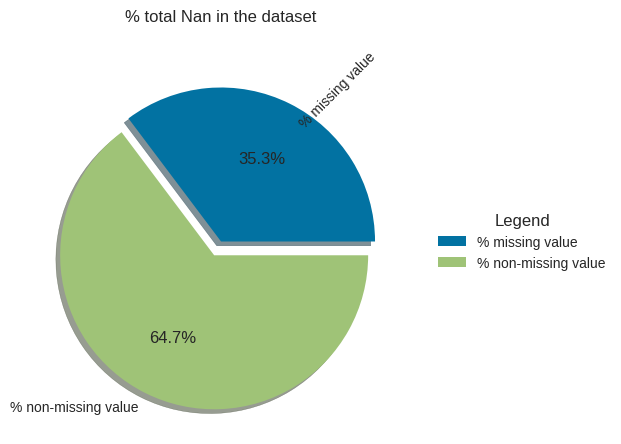

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


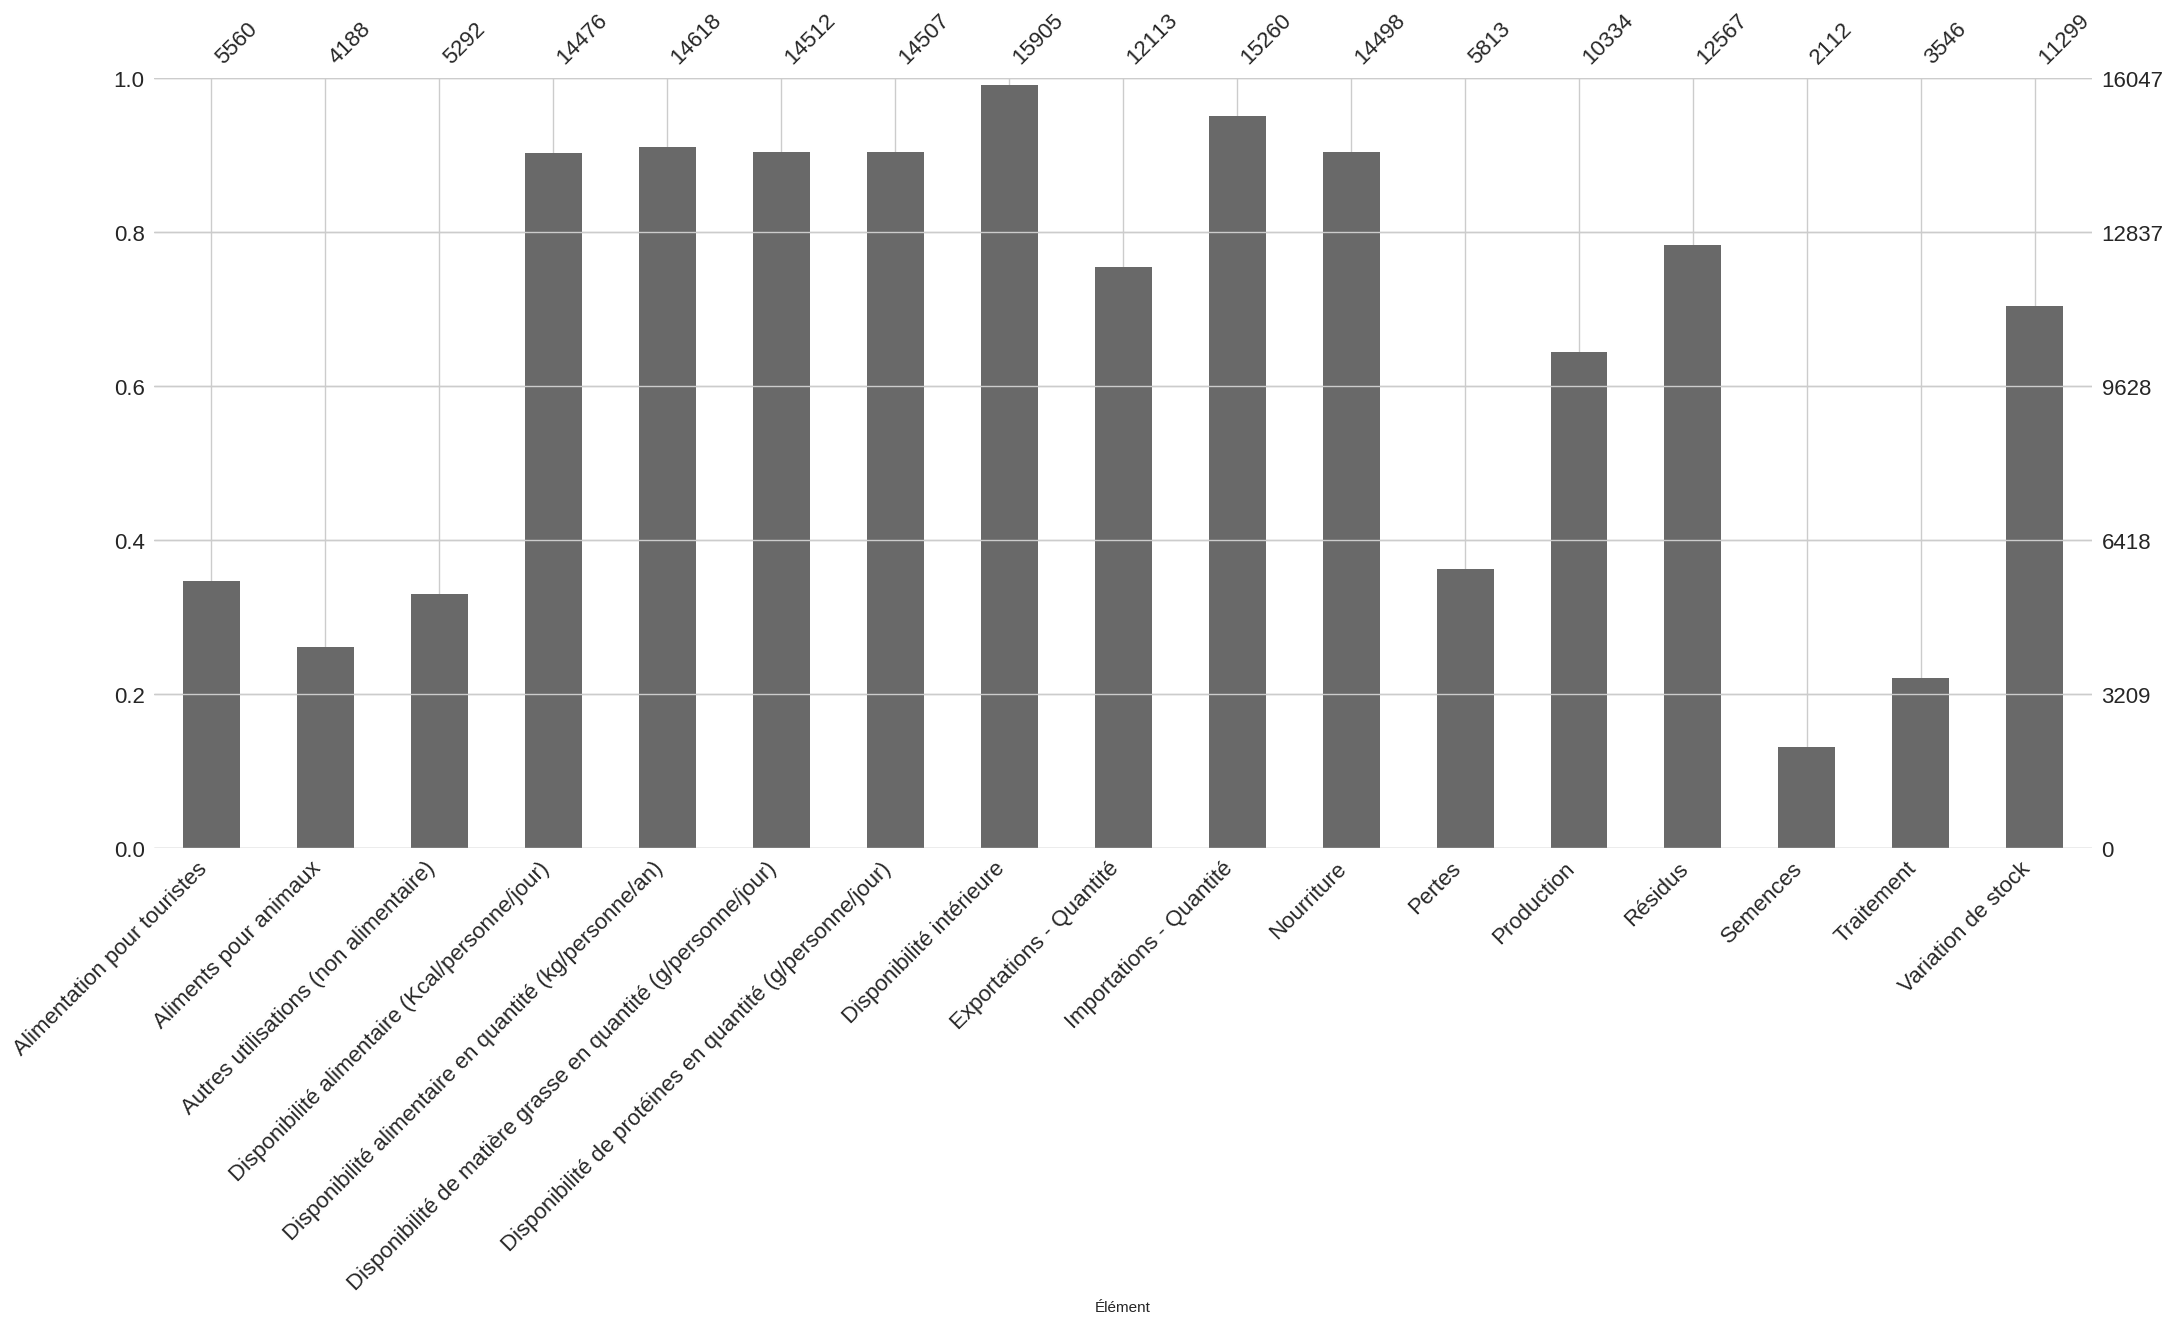

In [ ]:
data_checking(disponibility)

On remarque qu'il y a des variables qui montrent beaucoup de valeurs manquantes, donc on a décidé de supprimer toute variable qui montre plus de 60% de valeurs manquantes.

In [ ]:
# Identify columns where negative values ​​should not exist, excluding 'Inventory change'
cols_to_check = disponibility.columns.drop(['Variation de stock'])

# Replace negative values ​​with NaN
disponibility[cols_to_check] = disponibility[cols_to_check].applymap\
 (lambda x: np.nan if x < 0 else x)

# Replace NaN with the median of each column except 'Food for tourists'
for col in cols_to_check:
    if col == 'Alimentation pour touristes':
        disponibility[col] = disponibility[col].fillna(disponibility[col]\
                                                       .mean())
    else:
        disponibility[col] = disponibility[col].fillna(disponibility[col]\
                                                       .median())

# Replace the NaN in 'Variation de stock' with the mean of this column
disponibility['Variation de stock'] = disponibility['Variation de stock']\
.replace({np.nan: disponibility['Variation de stock'].mean()})

# Displaying the modified DataFrame
disponibility.head()

Élément                             Alimentation pour touristes  \
Zone        Produit                                               
Afghanistan Abats Comestible                         242.776667   
            Agrumes, Autres                          242.776667   
            Alcool, non Comestible                   242.776667   
            Aliments pour enfants                    242.776667   
            Ananas et produits                       242.776667   

Élément                             Aliments pour animaux  \
Zone        Produit                                         
Afghanistan Abats Comestible                       1000.0   
            Agrumes, Autres                        1000.0   
            Alcool, non Comestible                 1000.0   
            Aliments pour enfants                  1000.0   
            Ananas et produits                     1000.0   

Élément                             Autres utilisations (non alimentaire)  \
Zone        Produit                                                         
Afghanistan Abats Comestible                                          0.0   
            Agrumes, Autres                                           0.0   
            Alcool, non Comestible                                    0.0   
            Aliments pour enfants                                     0.0   
            Ananas et produits                                        0.0   

Élément                             Disponibilité alimentaire (Kcal/personne/jour)  \
Zone        Produit                                                                  
Afghanistan Abats Comestible                                                   5.0   
            Agrumes, Autres                                                    1.0   
            Alcool, non Comestible                                             3.0   
            Aliments pour enfants                                              1.0   
            Ananas et produits                                                 0.0   

Élément                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone        Produit                                                                          
Afghanistan Abats Comestible                                                     1.47        
            Agrumes, Autres                                                      1.32        
            Alcool, non Comestible                                               0.61        
            Aliments pour enfants                                                0.10        
            Ananas et produits                                                   0.00        

Élément                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone        Produit                                                                                 
Afghanistan Abats Comestible                                                     0.19               
            Agrumes, Autres                                                      0.01               
            Alcool, non Comestible                                               0.03               
            Aliments pour enfants                                                0.01               
            Ananas et produits                                                   0.00               

Élément                             Disponibilité de protéines en quantité (g/personne/jour)  \
Zone        Produit                                                                            
Afghanistan Abats Comestible                                                     0.64          
            Agrumes, Autres                                                      0.02          
            Alcool, non Comestible                                               0.03          
            Aliments pour enfants                                                0.04          
            Anan

In [ ]:
# Merge dataframes based on 'Zone' column
merged_df = disponibility.reset_index().merge(population_2017, on='Zone',
                                           how='inner')

merged_df.rename(columns={2017: 'Population'}, inplace=True)

merged_df.head()

Zone                 Produit  Alimentation pour touristes  \
0  Afghanistan        Abats Comestible                   242.776667   
1  Afghanistan         Agrumes, Autres                   242.776667   
2  Afghanistan  Alcool, non Comestible                   242.776667   
3  Afghanistan   Aliments pour enfants                   242.776667   
4  Afghanistan      Ananas et produits                   242.776667   

   Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                 1000.0                                    0.0   
1                 1000.0                                    0.0   
2                 1000.0                                    0.0   
3                 1000.0                                    0.0   
4                 1000.0                                    0.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                             1.0   
2                                             3.0   
3                                             1.0   
4                                             0.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.47        
1                                               1.32        
2                                               0.61        
3                                               0.10        
4                                               0.00        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.19               
1                                               0.01               
2                                               0.03               
3                                               0.01               
4                                               0.00               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.64          
1                                               0.02          
2                                               0.03          
3                                               0.04          
4                                               0.00          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                   53000.0                      0.0                   6000.0   
1                   50000.0                      0.0                  33000.0   
2                       0.0                      0.0                      0.0   
3                    4000.0                      0.0                   4000.0   
4                       0.0                      0.0                      0.0   

   Nourriture  Pertes  Production  Résidus  Semences  Traitement  \
0     53000.0  2000.0     48000.0      0.0    2000.0      2000.0   
1     48000.0  2000.0     17000.0      0.0    2000.0      2000.0   
2      4000.0  2000.0     15000.0      0.0    2000.0      2000.0   
3      4000.0  2000.0     15000.0      0.0    2000.0      2000.0   
4         0.0  2000.0     15000.0      0.0    2000.0      2000.0   

   Variation de stock  Population  
0        10017.258164  36296113.0  
1        10017.258164  36296113.0  
2            0.000000  36296113.0  
3        10017.258164  36296113.0  
4        10017.258164  36296113.0

In [ ]:
def count_duplicates_rows(data):
    """
    This function returns the number of duplicate rows in a DataFrame.

     Arguments:
     data -- DataFrame to count duplicates for

     Back:
     int -- Number of duplicate lines
    """
    total_rows = len(data)
    unique_rows = len(data.drop_duplicates())
    duplicate_rows = total_rows - unique_rows

    return duplicate_rows

# Count duplicate lines
num_duplicates = count_duplicates_rows(merged_df)
print(f"Number of duplicated lines: {num_duplicates}")


Number of duplicated lines: 0


Number of lines : 15766
Number of columns : 20
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Zone                 Produit  Alimentation pour touristes  \
0  Afghanistan        Abats Comestible                   242.776667   
1  Afghanistan         Agrumes, Autres                   242.776667   
2  Afghanistan  Alcool, non Comestible                   242.776667   
3  Afghanistan   Aliments pour enfants                   242.776667   
4  Afghanistan      Ananas et produits                   242.776667   

   Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                 1000.0                                    0.0   
1                 1000.0                                    0.0   
2                 1000.0                                    0.0   
3                 1000.0                                    0.0   
4                 1000.0                                    0.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                             1.0   
2                                             3.0   
3                                             1.0   
4                                             0.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.47        
1                                               1.32        
2                                               0.61        
3                                               0.10        
4                                               0.00        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.19               
1                                               0.01               
2                                               0.03               
3                                               0.01               
4                                               0.00               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.64          
1                                               0.02          
2                                               0.03          
3                                               0.04          
4                                               0.00          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                   53000.0                      0.0                   6000.0   
1                   50000.0                      0.0                  33000.0   
2                       0.0                      0.0                      0.0   
3                    4000.0                      0.0                   4000.0   
4                       0.0                      0.0                      0.0   

   Nourriture  Pertes  Production  Résidus  Semences  Traitement  \
0     53000.0  2000.0     48000.0      0.0    2000.0      2000.0   
1     48000.0  2000.0     17000.0      0.0    2000.0      2000.0   
2      4000.0  2000.0     15000.0      0.0    2000.0      2000.0   
3      4000.0  2000.0     15000.0      0.0    2000.0      2000.0   
4         0.0  2000.0     15000.0      0.0    2000.0      2000.0   

   Variation de stock  Population  
0        10017.258164  36296113.0  
1        10017.258164  36296113.0  
2            0.000000  36296113.0  
3        10017.258164  36296113.0  
4        10017.258164  36296113.0



Display the last 5 rows of the dataset




Zone              Produit  Alimentation pour touristes  \
15761  Îles Salomon     Viande de Suides                          0.0   
15762  Îles Salomon  Viande de Volailles                          0.0   
15763  Îles Salomon        Viande, Autre                          0.0   
15764  Îles Salomon                  Vin                          0.0   
15765  Îles Salomon       Épices, Autres                          0.0   

       Aliments pour animaux  Autres utilisations (non alimentaire)  \
15761                 1000.0                                    0.0   
15762                 1000.0                                    0.0   
15763                 1000.0                                    0.0   
15764                 1000.0                                    0.0   
15765                 1000.0                                    0.0   

       Disponibilité alimentaire (Kcal/personne/jour)  \
15761                                            44.0   
15762                                            18.0   
15763                                             0.0   
15764                                             0.0   
15765                                             4.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
15761                                               4.49        
15762                                               4.45        
15763                                               0.01        
15764                                               0.25        
15765                                               0.48        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
15761                                               4.24               
15762                                               1.31               
15763                                               0.00               
15764                                               0.00               
15765                                               0.20               

       Disponibilité de protéines en quantité (g/personne/jour)  \
15761                                               1.38          
15762                                               1.51          
15763                                               0.00          
15764                                               0.00          
15765                                               0.15          

       Disponibilité intérieure  Exportations - Quantité  \
15761                    3000.0                      0.0   
15762                    3000.0                      0.0   
15763                       0.0                      0.0   
15764                       0.0                      0.0   
15765                       0.0                      0.0   

       Importations - Quantité  Nourriture  Pertes  Production  Résidus  \
15761                      0.0      3000.0  2000.0      2000.0      0.0   
15762                   6000.0      3000.0  2000.0         0.0      0.0   
15763                      0.0         0.0  2000.0     15000.0      0.0   
15764                      0.0         0.0  2000.0     15000.0      0.0   
15765                      0.0         0.0  2000.0         0.0      0.0   

       Semences  Traitement  Variation de stock  Population  
15761    2000.0      2000.0                 0.0    636039.0  
15762    2000.0      2000.0              3000.0    636039.0  
15763    2000.0      2000.0                 0.0    636039.0  
15764    2000.0      2000.0                 0.0    636039.0  
15765    2000.0      2000.0                 0.0    636039.0



Display a summary of the dataset




# Columns  # Rows  # Col Types               Col Types and #  Nan total %
0         20   15766            2  [(float64, 18), (object, 2)]          0.0



Display a summary of the columns of the dataset


Dataset contains 15766 rows and 20 columns


Columns name     Type  \
0                                                Zone   object   
1                                             Produit   object   
2                         Alimentation pour touristes  float64   
3                               Aliments pour animaux  float64   
4               Autres utilisations (non alimentaire)  float64   
5      Disponibilité alimentaire (Kcal/personne/jour)  float64   
6   Disponibilité alimentaire en quantité (kg/pers...  float64   
7   Disponibilité de matière grasse en quantité (g...  float64   
8   Disponibilité de protéines en quantité (g/pers...  float64   
9                            Disponibilité intérieure  float64   
10                            Exportations - Quantité  float64   
11                            Importations - Quantité  float64   
12                                         Nourriture  float64   
13                                             Pertes  float64   
14                                         Production  float64   
15                                            Résidus  float64   
16                                           Semences  float64   
17                                         Traitement  float64   
18                                 Variation de stock  float64   
19                                         Population  float64   

    # unique values  # Nan values  # Neg values  % Nan values  % Neg values  \
0               171             0           NaN           0.0           NaN   
1                98             0           NaN           0.0           NaN   
2                27             0           0.0           0.0      0.000000   
3               618             0           0.0           0.0      0.000000   
4               418             0           0.0           0.0      0.000000   
5               550             0           0.0           0.0      0.000000   
6              2831             0           0.0           0.0      0.000000   
7              1102             0           0.0           0.0      0.000000   
8              1024             0           0.0           0.0      0.000000   
9              1824             0           0.0           0.0      0.000000   
10              803             0           0.0           0.0      0.000000   
11              877             0           0.0           0.0      0.000000   
12             1405             0           0.0           0.0      0.000000   
13              491             0           0.0           0.0      0.000000   
14             1714             0           0.0           0.0      0.000000   
15               53             0           0.0           0.0      0.000000   
16              250             0           0.0           0.0      0.000000   
17              554             0           0.0           0.0      0.000000   
18              599             0        1371.0           0.0      8.695928   
19              171             0           0.0           0.0      0.000000   

    # duplicates  
0          15595  
1          15668  
2          15739  
3          15148  
4          15348  
5          15216  
6          12935  
7          14664  
8          14742  
9          13942  
10         14963  
11         14889  
12         14361  
13         15275  
14         14052  
15         15713  
16         15516  
17         15212  
18         15167  
19         15595



Display a summary of the types of columns in the dataset




count
Type          
float64     18
object       2



Percentage of missing values ​​in the dataset




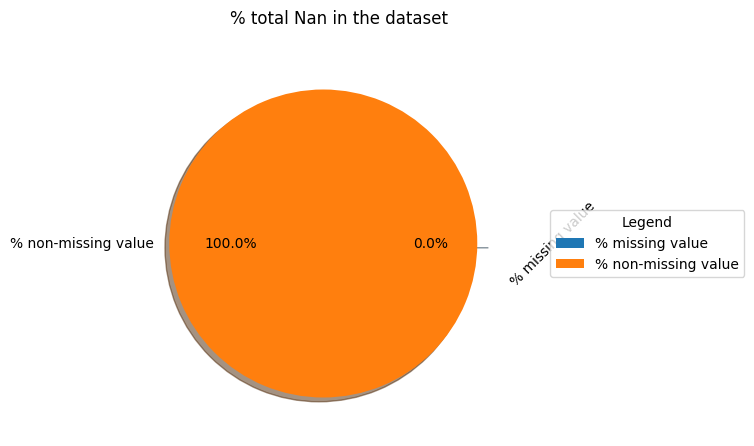

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


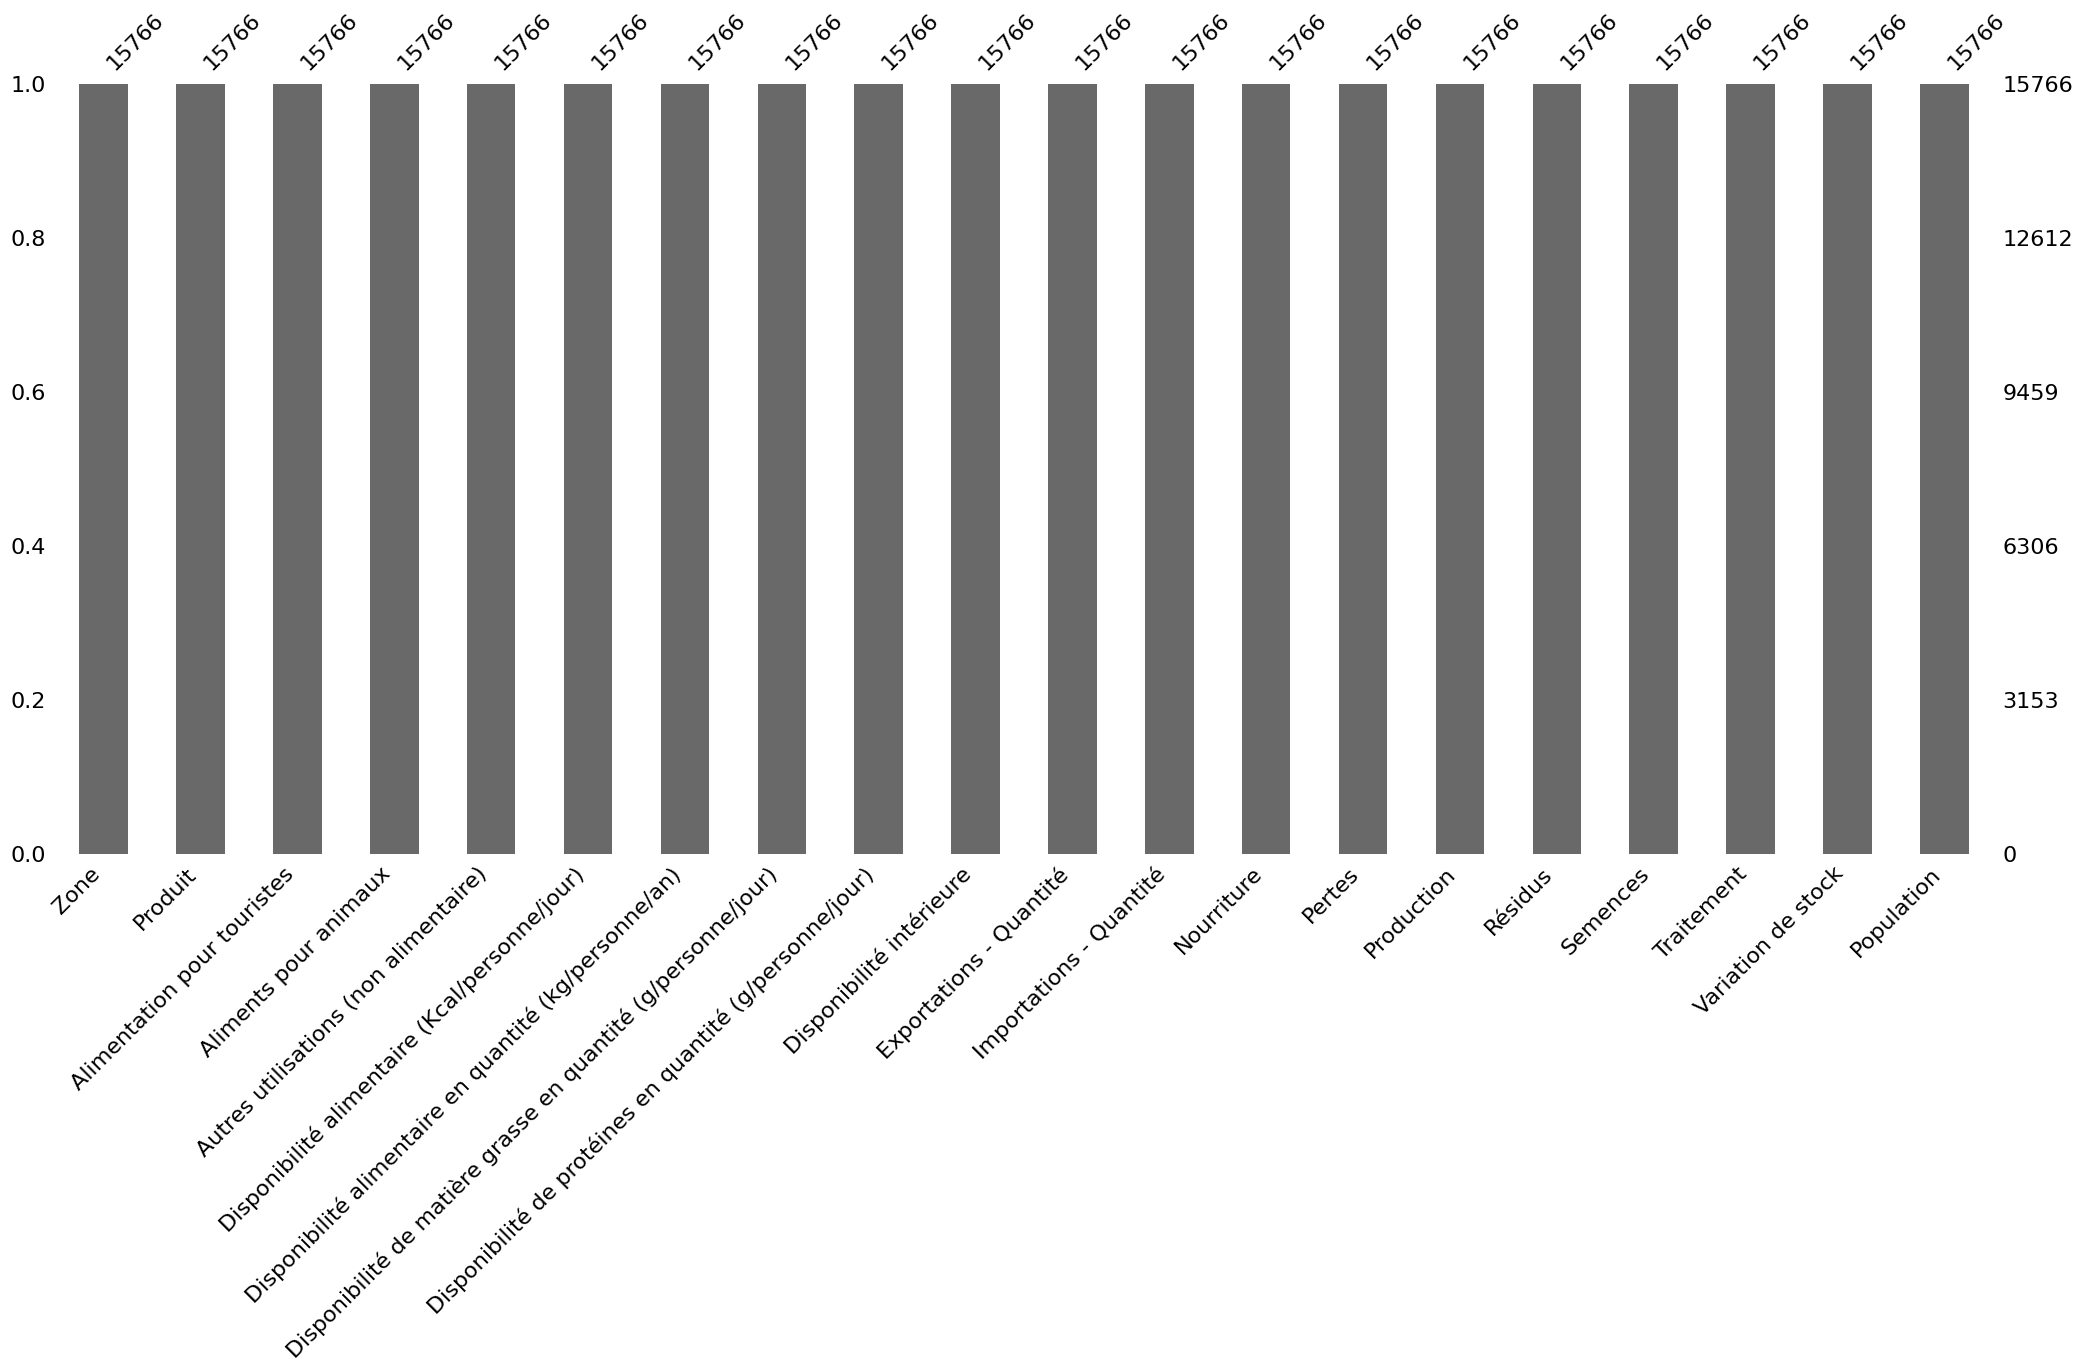

In [ ]:
data_checking(merged_df)

In [ ]:
# Take into account only the variables of interest in our study
result = merged_df[['Zone','Produit', 'Alimentation pour touristes',
                    'Disponibilité alimentaire (Kcal/personne/jour)',
                    'Disponibilité alimentaire en quantité (kg/personne/an)',
                    'Disponibilité de protéines en quantité (g/personne/jour)',
                    'Disponibilité intérieure','Importations - Quantité',
                    'Nourriture','Production',
                    'Variation de stock', 'Population']]

result.head()

Zone                 Produit  Alimentation pour touristes  \
0  Afghanistan        Abats Comestible                   242.776667   
1  Afghanistan         Agrumes, Autres                   242.776667   
2  Afghanistan  Alcool, non Comestible                   242.776667   
3  Afghanistan   Aliments pour enfants                   242.776667   
4  Afghanistan      Ananas et produits                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                             1.0   
2                                             3.0   
3                                             1.0   
4                                             0.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.47        
1                                               1.32        
2                                               0.61        
3                                               0.10        
4                                               0.00        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.64          
1                                               0.02          
2                                               0.03          
3                                               0.04          
4                                               0.00          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   53000.0                   6000.0     53000.0     48000.0   
1                   50000.0                  33000.0     48000.0     17000.0   
2                       0.0                      0.0      4000.0     15000.0   
3                    4000.0                   4000.0      4000.0     15000.0   
4                       0.0                      0.0         0.0     15000.0   

   Variation de stock  Population  
0        10017.258164  36296113.0  
1        10017.258164  36296113.0  
2            0.000000  36296113.0  
3        10017.258164  36296113.0  
4        10017.258164  36296113.0

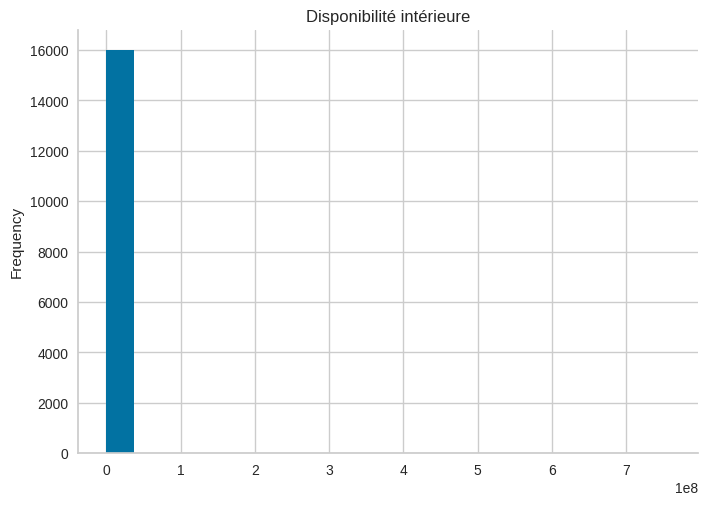

In [ ]:
# @title Disponibilité intérieure

from matplotlib import pyplot as plt
result['Disponibilité intérieure'].plot(kind='hist', bins=20, title='Disponibilité intérieure')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
result['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas et produits',
       'Arachides Decortiquees', 'Avoine', 'Bananes', 'Beurre, Ghee',
       'Bière', 'Blé et produits', 'Boissons Alcooliques',
       'Boissons Fermentés', 'Café et produits',
       'Citrons & Limes et produits', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao et produits', 'Fruits, Autres', 'Girofles',
       'Graines Colza/Moutarde', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue', 'Haricots',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Coco',
       'Huile de Colza&Moutarde', 'Huile de Germe de Maïs',
       'Huile de Palme', 'Huile de Palmistes', 'Huile de Soja',
       'Huile de Son de Riz', 'Huile de Sésame', 'Huile de Tournesol',
       'Ignames', 'Lait - Excl Beurre', 'Légumes, Autres',
     

In [ ]:
# Filter the DataFrame to only keep the lines where 'Product' is 'Viande de Volailles'
filtered_df = result.loc[result['Produit'] == 'Viande de Volailles']

# Then delete the 'Product' column
filtered_df.drop(columns={'Produit'}, inplace=True)

# Show new table
filtered_df.head()

Zone  Alimentation pour touristes  \
78      Afghanistan                   242.776667   
173  Afrique du Sud                     0.000000   
265         Albanie                   242.776667   
357         Algérie                     0.000000   
452       Allemagne                   242.776667   

     Disponibilité alimentaire (Kcal/personne/jour)  \
78                                              5.0   
173                                           143.0   
265                                            85.0   
357                                            22.0   
452                                            71.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
78                                                1.53        
173                                              35.69        
265                                              16.36        
357                                               6.38        
452                                              19.47        

     Disponibilité de protéines en quantité (g/personne/jour)  \
78                                                0.54          
173                                              14.11          
265                                               6.26          
357                                               1.97          
452                                               7.96          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
78                    57000.0                  29000.0     55000.0   
173                 2118000.0                 514000.0   2035000.0   
265                   47000.0                  38000.0     47000.0   
357                  277000.0                   2000.0    264000.0   
452                 1739000.0                 842000.0   1609000.0   

     Production  Variation de stock  Population  
78      28000.0                 0.0  36296113.0  
173   1667000.0                 0.0  57009756.0  
265     13000.0              4000.0   2884169.0  
357    275000.0                 0.0  41389189.0  
452   1514000.0            -29000.0  82658409.0

# **Data enrichment**

We will enrich our data with data from the FAO concerning the political stability and the GDP of the countries.

In [ ]:
data_stability = pd.read_excel(
'/content/drive/MyDrive/projet 9 data analyse/Stability_2017.xls')

data_PIB = pd.read_csv(
'/content/drive/MyDrive/projet 9 data analyse/FAOSTAT_data_fr_5-24-2024.csv',
low_memory=False)

In [ ]:
data_stability.head()

Zone  Code Élément  Année  Valeur
0     Afghanistan          6125   2017   -2.80
1  Afrique du Sud          6125   2017   -0.28
2         Albanie          6125   2017    0.38
3         Algérie          6125   2017   -0.92
4       Allemagne          6125   2017    0.59

Number of lines : 196
Number of columns : 4
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Zone  Code Élément  Année  Valeur
0     Afghanistan          6125   2017   -2.80
1  Afrique du Sud          6125   2017   -0.28
2         Albanie          6125   2017    0.38
3         Algérie          6125   2017   -0.92
4       Allemagne          6125   2017    0.59



Display the last 5 rows of the dataset




Zone  Code Élément  Année  Valeur
191  Venezuela (République bolivarienne du)          6125   2017   -1.27
192                                Viet Nam          6125   2017    0.23
193                                   Yémen          6125   2017   -2.94
194                                  Zambie          6125   2017    0.15
195                                Zimbabwe          6125   2017   -0.71



Display a summary of the dataset




# Columns  # Rows  # Col Types                          Col Types and #  \
0          4     196            3  [(int64, 2), (object, 1), (float64, 1)]   

   Nan total %  
0          0.0



Display a summary of the columns of the dataset


Dataset contains 196 rows and 4 columns


Columns name     Type  # unique values  # Nan values  # Neg values  \
0          Zone   object              196             0           NaN   
1  Code Élément    int64                1             0           0.0   
2         Année    int64                1             0           0.0   
3        Valeur  float64              146             0          95.0   

   % Nan values  % Neg values  # duplicates  
0           0.0           NaN             0  
1           0.0      0.000000           195  
2           0.0      0.000000           195  
3           0.0     48.469388            50



Display a summary of the types of columns in the dataset




count
Type          
int64        2
object       1
float64      1



Percentage of missing values ​​in the dataset




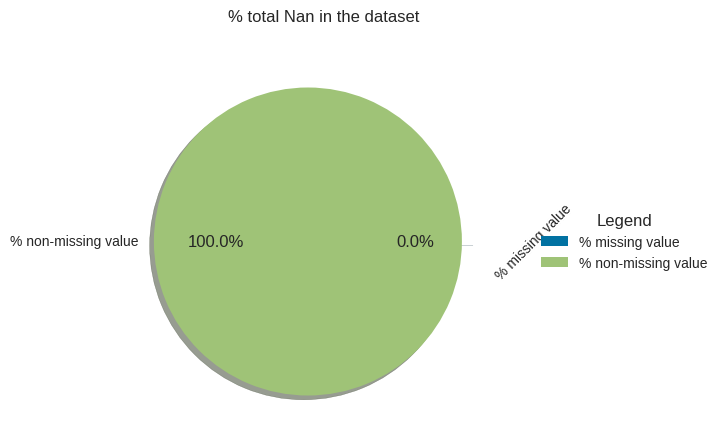

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


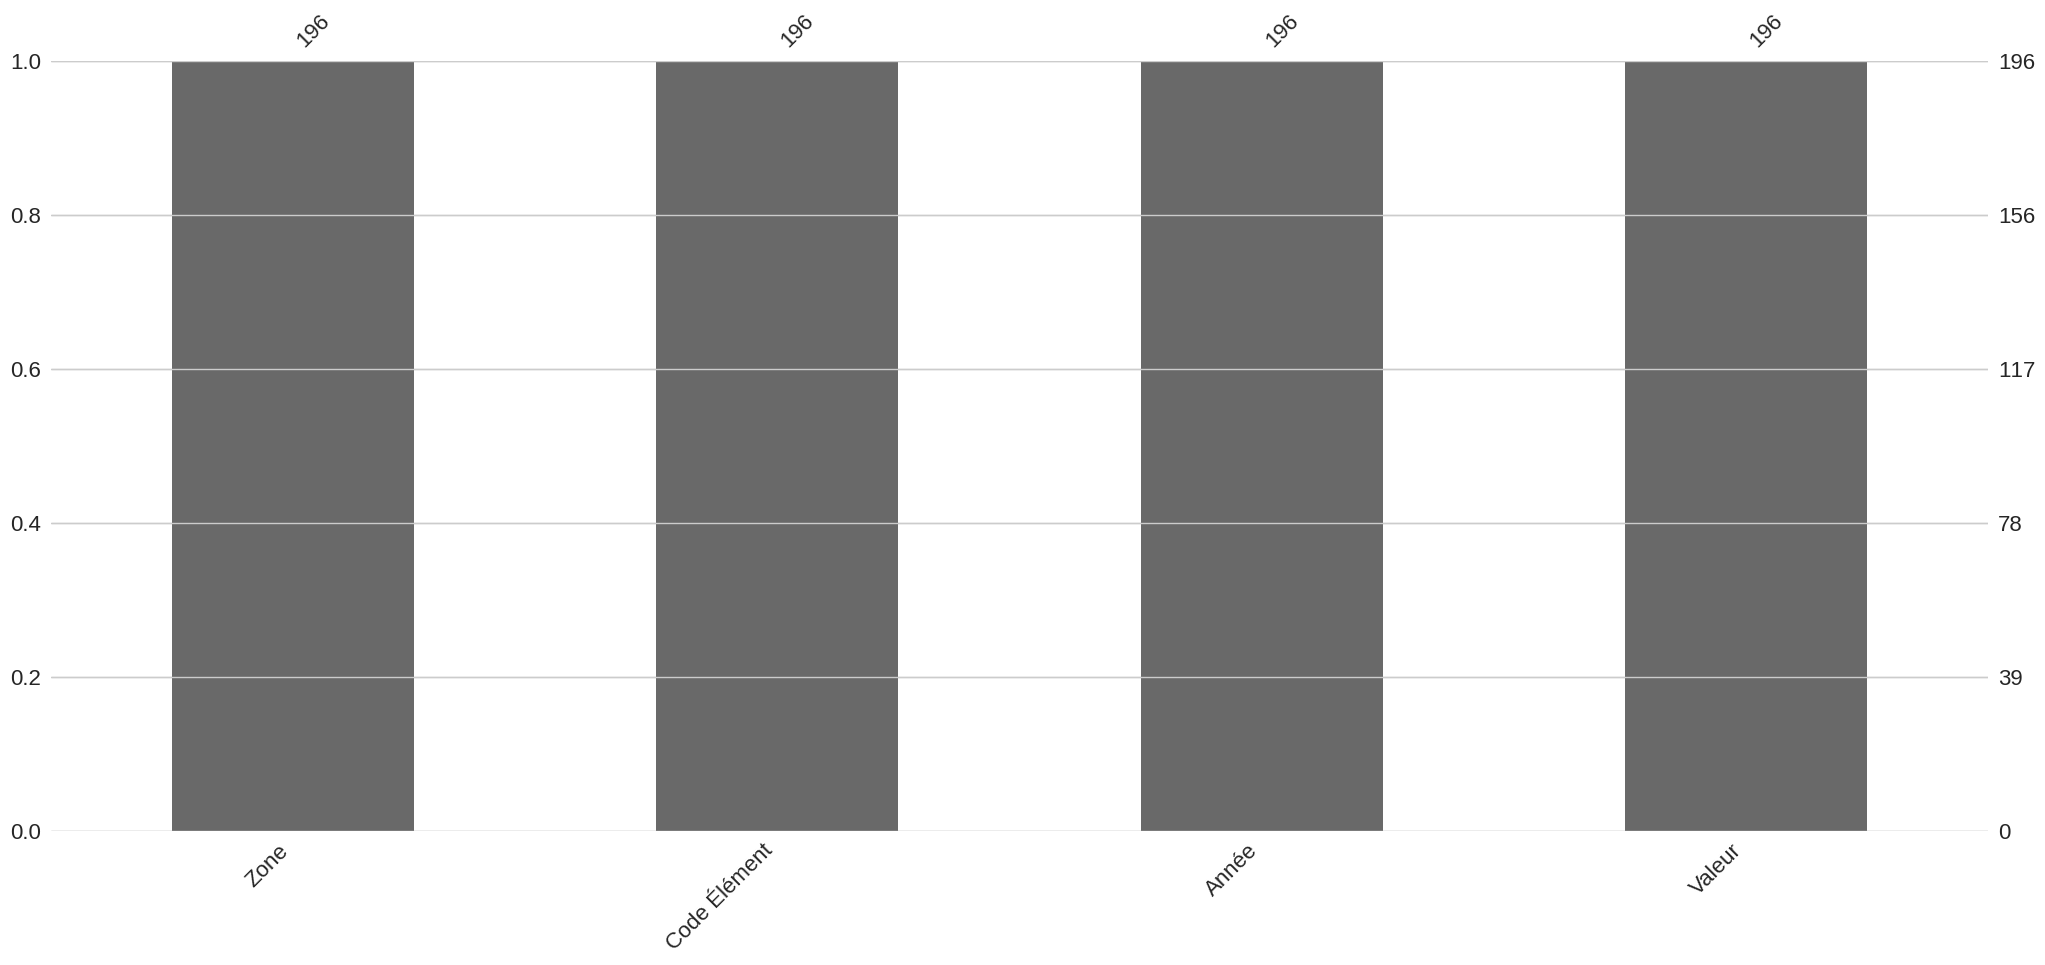

In [ ]:
data_checking(data_stability)

In [ ]:
# Rename the column 'Valeur'
data_stability.rename(columns={'Valeur': 'Stabilité'}, inplace=True)

# Take the variables that interest us
data_stability = data_stability[['Zone','Stabilité']]

# show the new table
data_stability.head()

Zone  Stabilité
0     Afghanistan      -2.80
1  Afrique du Sud      -0.28
2         Albanie       0.38
3         Algérie      -0.92
4       Allemagne       0.59

In [ ]:
data_PIB.head()

Code Domaine            Domaine  Code zone (M49)            Zone  \
0           MK  Indicateurs macro                4     Afghanistan   
1           MK  Indicateurs macro              710  Afrique du Sud   
2           MK  Indicateurs macro                8         Albanie   
3           MK  Indicateurs macro               12         Algérie   
4           MK  Indicateurs macro              276       Allemagne   

   Code Élément                   Élément  Code Produit  \
0          6119  Valeur US $ par habitant         22008   
1          6119  Valeur US $ par habitant         22008   
2          6119  Valeur US $ par habitant         22008   
3          6119  Valeur US $ par habitant         22008   
4          6119  Valeur US $ par habitant         22008   

                  Produit  Code année  Année Unité        Valeur Symbole  \
0  Produit Intérieur Brut        2017   2017   US$    530.149831       X   
1  Produit Intérieur Brut        2017   2017   US$   6723.928582       X   
2  Produit Intérieur Brut        2017   2017   US$   4521.752217       X   
3  Produit Intérieur Brut        2017   2017   US$   4134.936055       X   
4  Produit Intérieur Brut        2017   2017   US$  44670.222282       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN

Number of lines : 209
Number of columns : 15
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Code Domaine            Domaine  Code zone (M49)            Zone  \
0           MK  Indicateurs macro                4     Afghanistan   
1           MK  Indicateurs macro              710  Afrique du Sud   
2           MK  Indicateurs macro                8         Albanie   
3           MK  Indicateurs macro               12         Algérie   
4           MK  Indicateurs macro              276       Allemagne   

   Code Élément                   Élément  Code Produit  \
0          6119  Valeur US $ par habitant         22008   
1          6119  Valeur US $ par habitant         22008   
2          6119  Valeur US $ par habitant         22008   
3          6119  Valeur US $ par habitant         22008   
4          6119  Valeur US $ par habitant         22008   

                  Produit  Code année  Année Unité        Valeur Symbole  \
0  Produit Intérieur Brut        2017   2017   US$    530.149831       X   
1  Produit Intérieur Brut        2017   2017   US$   6723.928582       X   
2  Produit Intérieur Brut        2017   2017   US$   4521.752217       X   
3  Produit Intérieur Brut        2017   2017   US$   4134.936055       X   
4  Produit Intérieur Brut        2017   2017   US$  44670.222282       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN



Display the last 5 rows of the dataset




Code Domaine            Domaine  Code zone (M49)  \
204           MK  Indicateurs macro              862   
205           MK  Indicateurs macro              704   
206           MK  Indicateurs macro              887   
207           MK  Indicateurs macro              894   
208           MK  Indicateurs macro              716   

                                       Zone  Code Élément  \
204  Venezuela (République bolivarienne du)          6119   
205                                Viet Nam          6119   
206                                   Yémen          6119   
207                                  Zambie          6119   
208                                Zimbabwe          6119   

                      Élément  Code Produit                 Produit  \
204  Valeur US $ par habitant         22008  Produit Intérieur Brut   
205  Valeur US $ par habitant         22008  Produit Intérieur Brut   
206  Valeur US $ par habitant         22008  Produit Intérieur Brut   
207  Valeur US $ par habitant         22008  Produit Intérieur Brut   
208  Valeur US $ par habitant         22008  Produit Intérieur Brut   

     Code année  Année Unité       Valeur Symbole  \
204        2017   2017   US$  8112.053374       X   
205        2017   2017   US$  2992.071534       X   
206        2017   2017   US$   612.353054       X   
207        2017   2017   US$  1495.437665       X   
208        2017   2017   US$  1494.170144       X   

                Description du Symbole  Note  
204  Ciffre de sources internationales   NaN  
205  Ciffre de sources internationales   NaN  
206  Ciffre de sources internationales   NaN  
207  Ciffre de sources internationales   NaN  
208  Ciffre de sources internationales   NaN



Display a summary of the dataset




# Columns  # Rows  # Col Types                          Col Types and #  \
0         15     209            3  [(object, 8), (int64, 5), (float64, 2)]   

   Nan total %  
0     6.666667



Display a summary of the columns of the dataset


Dataset contains 209 rows and 15 columns


Columns name     Type  # unique values  # Nan values  \
0             Code Domaine   object                1             0   
1                  Domaine   object                1             0   
2          Code zone (M49)    int64              209             0   
3                     Zone   object              209             0   
4             Code Élément    int64                1             0   
5                  Élément   object                1             0   
6             Code Produit    int64                1             0   
7                  Produit   object                1             0   
8               Code année    int64                1             0   
9                    Année    int64                1             0   
10                   Unité   object                1             0   
11                  Valeur  float64              209             0   
12                 Symbole   object                1             0   
13  Description du Symbole   object                1             0   
14                    Note  float64                1           209   

    # Neg values  % Nan values  % Neg values  # duplicates  
0            NaN           0.0           NaN           208  
1            NaN           0.0           NaN           208  
2            0.0           0.0           0.0             0  
3            NaN           0.0           NaN             0  
4            0.0           0.0           0.0           208  
5            NaN           0.0           NaN           208  
6            0.0           0.0           0.0           208  
7            NaN           0.0           NaN           208  
8            0.0           0.0           0.0           208  
9            0.0           0.0           0.0           208  
10           NaN           0.0           NaN           208  
11           0.0           0.0           0.0             0  
12           NaN           0.0           NaN           208  
13           NaN           0.0           NaN           208  
14           0.0         100.0           0.0           208



Display a summary of the types of columns in the dataset




count
Type          
object       8
int64        5
float64      2



Percentage of missing values ​​in the dataset




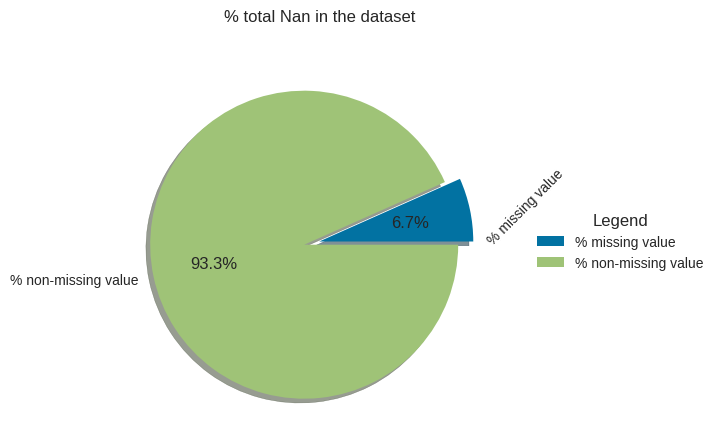

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


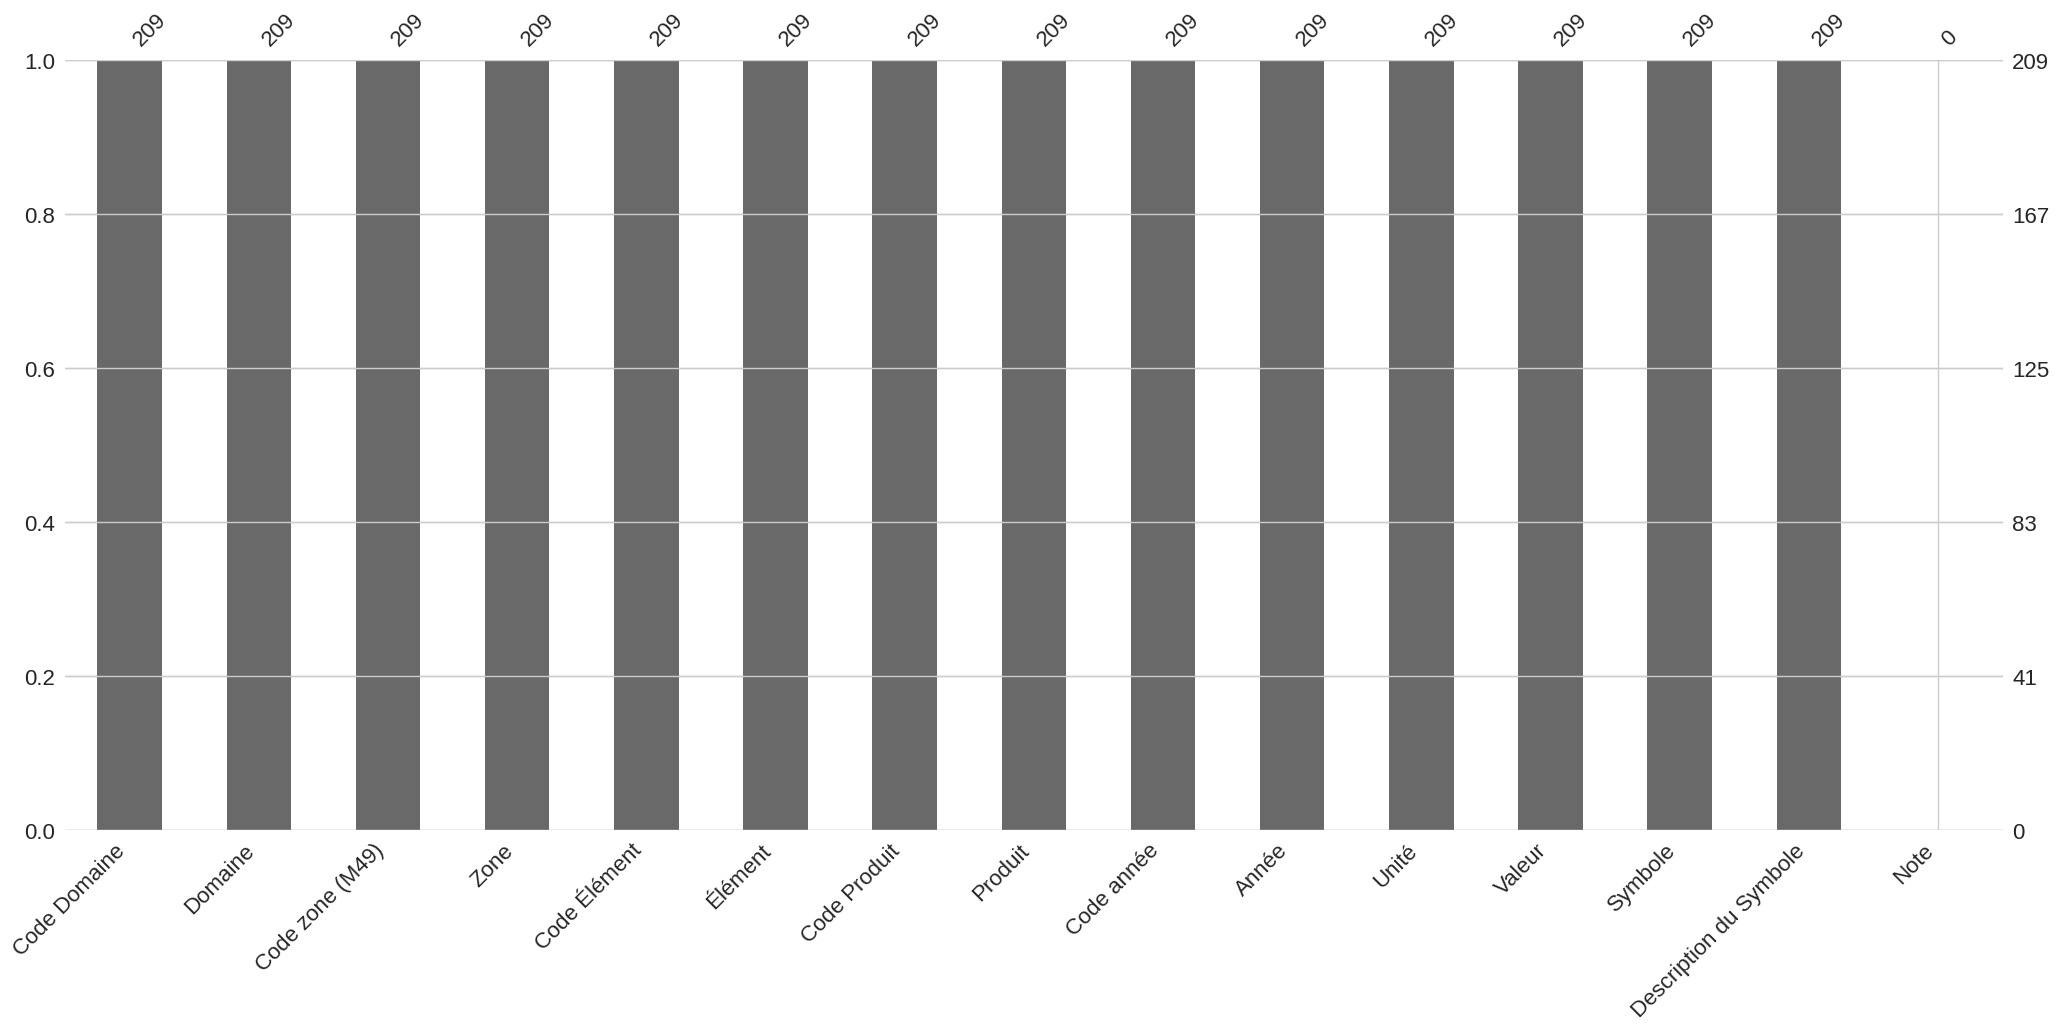

In [ ]:
data_checking(data_PIB)

In [ ]:
# Rename the column 'Valeur'
data_PIB.rename(columns={'Valeur': 'PIB par habitant'}, inplace=True)

# Take the variables that interest us
data_PIB = data_PIB[['Zone', 'PIB par habitant']]

# show the new table
data_PIB.head()

Zone  PIB par habitant
0     Afghanistan        530.149831
1  Afrique du Sud       6723.928582
2         Albanie       4521.752217
3         Algérie       4134.936055
4       Allemagne      44670.222282

Number of lines : 209
Number of columns : 2
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Zone  PIB par habitant
0     Afghanistan        530.149831
1  Afrique du Sud       6723.928582
2         Albanie       4521.752217
3         Algérie       4134.936055
4       Allemagne      44670.222282



Display the last 5 rows of the dataset




Zone  PIB par habitant
204  Venezuela (République bolivarienne du)       8112.053374
205                                Viet Nam       2992.071534
206                                   Yémen        612.353054
207                                  Zambie       1495.437665
208                                Zimbabwe       1494.170144



Display a summary of the dataset




# Columns  # Rows  # Col Types              Col Types and #  Nan total %
0          2     209            2  [(object, 1), (float64, 1)]          0.0



Display a summary of the columns of the dataset


Dataset contains 209 rows and 2 columns


Columns name     Type  # unique values  # Nan values  # Neg values  \
0              Zone   object              209             0           NaN   
1  PIB par habitant  float64              209             0           0.0   

   % Nan values  % Neg values  # duplicates  
0           0.0           NaN             0  
1           0.0           0.0             0



Display a summary of the types of columns in the dataset




count
Type          
object       1
float64      1



Percentage of missing values ​​in the dataset




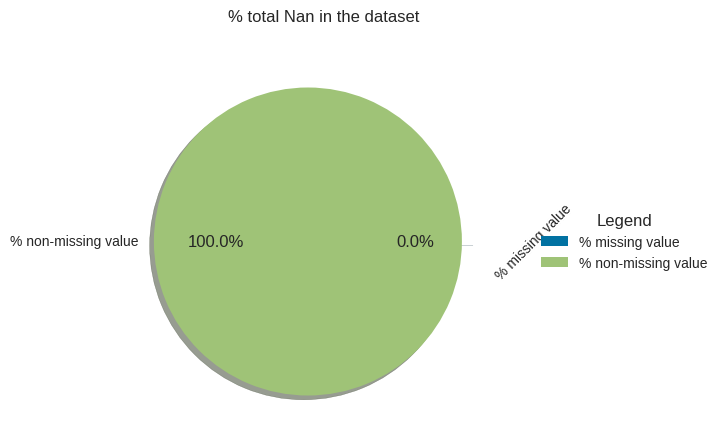

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


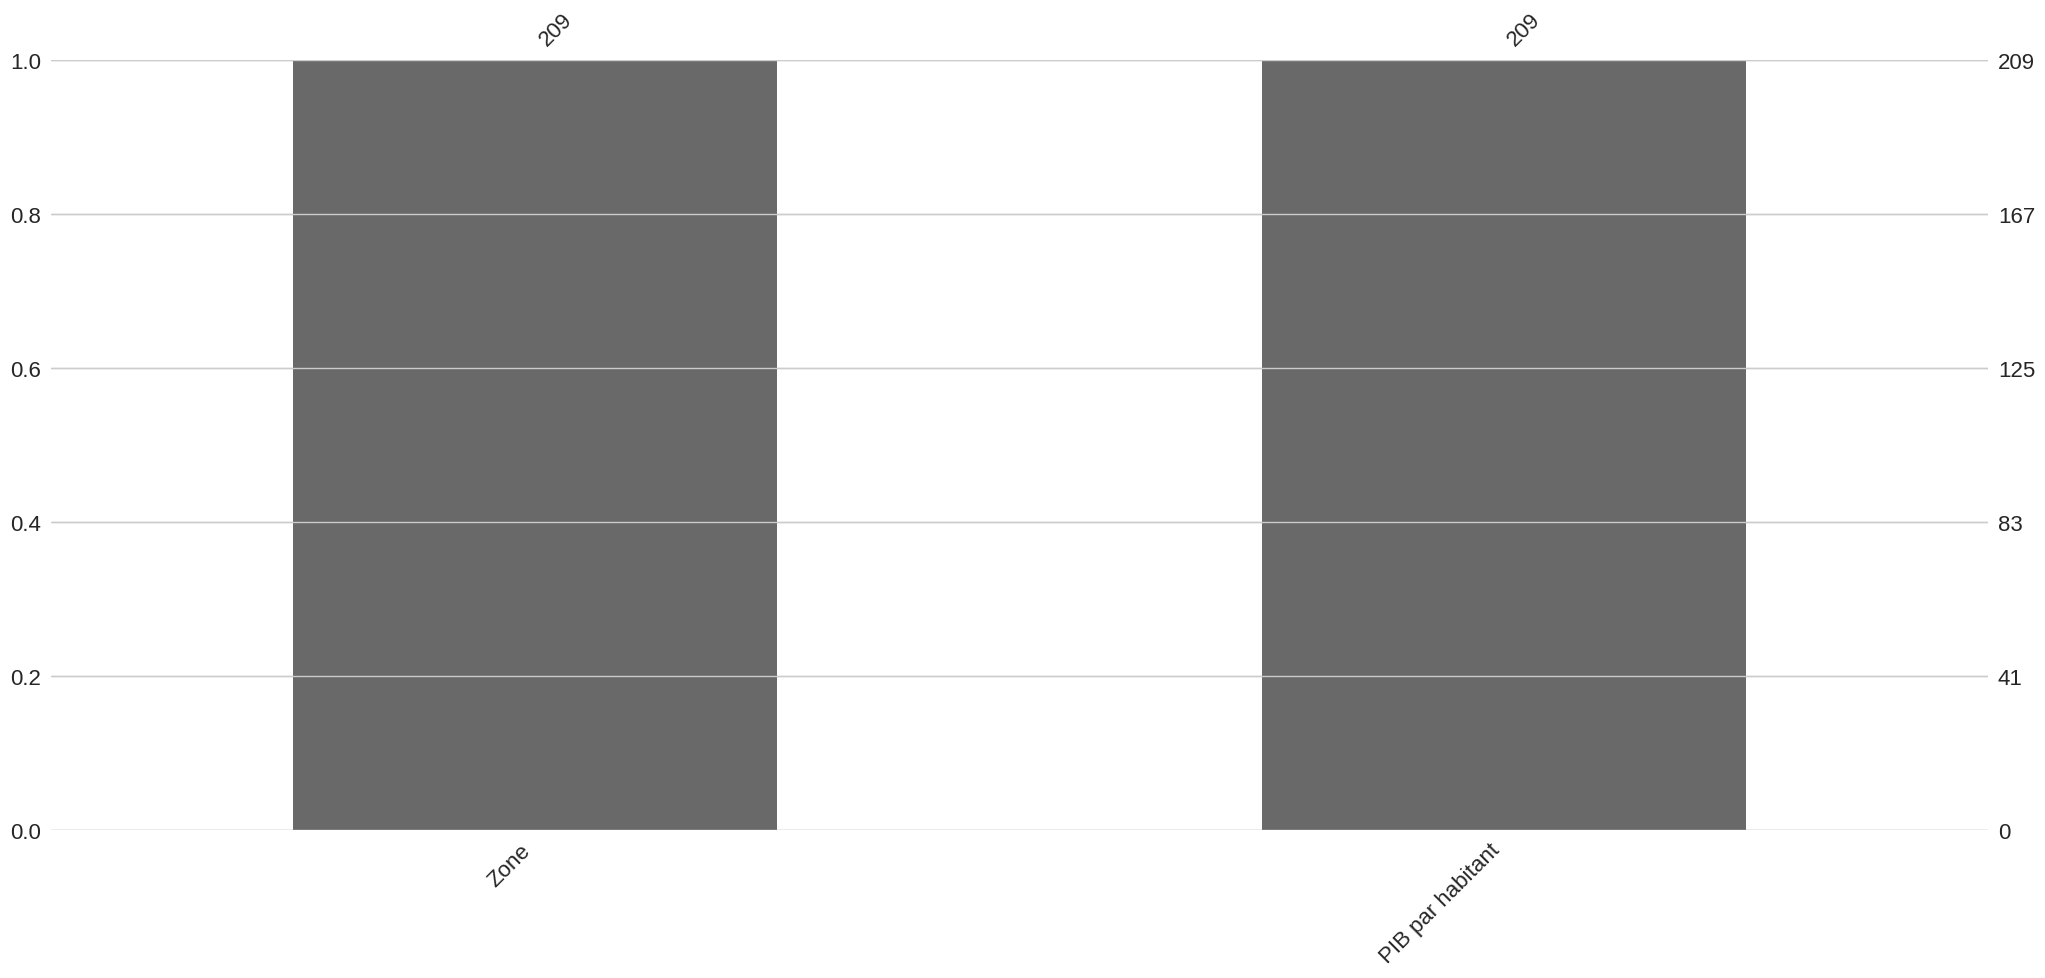

In [ ]:
data_checking(data_PIB)

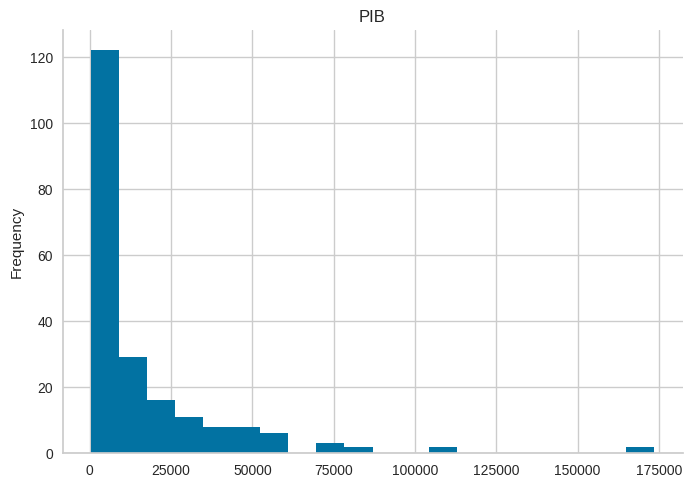

In [ ]:
# @title PIB

from matplotlib import pyplot as plt
data_PIB['PIB'].plot(kind='hist', bins=20, title='PIB')
plt.gca().spines[['top', 'right',]].set_visible(False)

Now we will add this data to our dataframe.

In [ ]:
# Merge dataframes based on 'Zone' column
df = filtered_df.merge(data_stability, on='Zone', how='left')

df = df.merge(data_PIB, on='Zone', how='left')


df.head()

Zone  Alimentation pour touristes  \
0     Afghanistan                   242.776667   
1  Afrique du Sud                     0.000000   
2         Albanie                   242.776667   
3         Algérie                     0.000000   
4       Allemagne                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   57000.0                  29000.0     55000.0     28000.0   
1                 2118000.0                 514000.0   2035000.0   1667000.0   
2                   47000.0                  38000.0     47000.0     13000.0   
3                  277000.0                   2000.0    264000.0    275000.0   
4                 1739000.0                 842000.0   1609000.0   1514000.0   

   Variation de stock  Population  Stabilité  PIB par habitant  
0                 0.0  36296113.0      -2.80        530.149831  
1                 0.0  57009756.0      -0.28       6723.928582  
2              4000.0   2884169.0       0.38       4521.752217  
3                 0.0  41389189.0      -0.92       4134.936055  
4            -29000.0  82658409.0       0.59      44670.222282

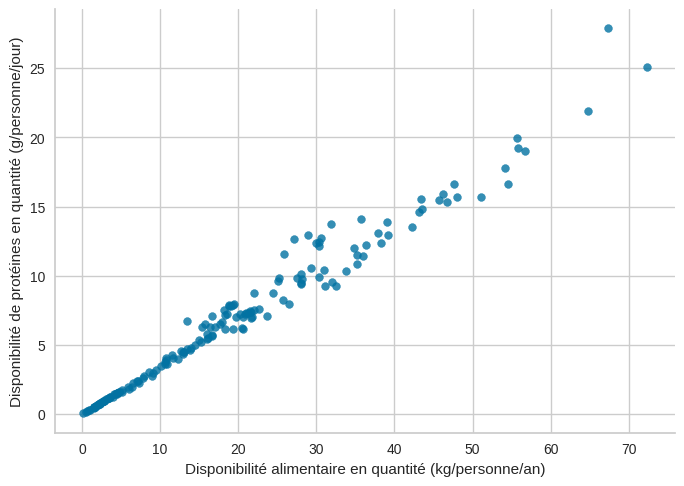

In [ ]:
# @title Disponibilité alimentaire en quantité (kg/personne/an) vs Disponibilité de protéines en quantité (g/personne/jour)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

These two variables are strongly correlated.

Number of lines : 169
Number of columns : 13
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




Zone  Alimentation pour touristes  \
0     Afghanistan                   242.776667   
1  Afrique du Sud                     0.000000   
2         Albanie                   242.776667   
3         Algérie                     0.000000   
4       Allemagne                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   57000.0                  29000.0     55000.0     28000.0   
1                 2118000.0                 514000.0   2035000.0   1667000.0   
2                   47000.0                  38000.0     47000.0     13000.0   
3                  277000.0                   2000.0    264000.0    275000.0   
4                 1739000.0                 842000.0   1609000.0   1514000.0   

   Variation de stock  Population  Stabilité  PIB par habitant  
0                 0.0  36296113.0      -2.80        530.149831  
1                 0.0  57009756.0      -0.28       6723.928582  
2              4000.0   2884169.0       0.38       4521.752217  
3                 0.0  41389189.0      -0.92       4134.936055  
4            -29000.0  82658409.0       0.59      44670.222282



Display the last 5 rows of the dataset




Zone  Alimentation pour touristes  \
164    Émirats arabes unis                   242.776667   
165               Équateur                     0.000000   
166  États-Unis d'Amérique                   242.776667   
167               Éthiopie                     0.000000   
168           Îles Salomon                     0.000000   

     Disponibilité alimentaire (Kcal/personne/jour)  \
164                                           147.0   
165                                            83.0   
166                                           219.0   
167                                             0.0   
168                                            18.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
164                                              43.47        
165                                              19.31        
166                                              55.68        
167                                               0.13        
168                                               4.45        

     Disponibilité de protéines en quantité (g/personne/jour)  \
164                                              14.80          
165                                               6.15          
166                                              19.93          
167                                               0.04          
168                                               1.51          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
164                  412000.0                 433000.0    412000.0   
165                  341000.0                      0.0    324000.0   
166                18266000.0                 123000.0  18100000.0   
167                   14000.0                   1000.0     14000.0   
168                    3000.0                   6000.0      3000.0   

     Production  Variation de stock   Population  Stabilité  PIB par habitant  
164     48000.0            -26000.0    9487203.0       0.62      42522.377617  
165    340000.0             -1000.0   16785361.0      -0.07       6246.404252  
166  21914000.0             80000.0  325084756.0       0.29      59059.596403  
167     14000.0                 0.0  106399924.0      -1.68        709.761008  
168         0.0              3000.0     636039.0       0.20       2283.581124



Display a summary of the dataset




# Columns  # Rows  # Col Types               Col Types and #  Nan total %
0         13     169            2  [(float64, 12), (object, 1)]     0.227583



Display a summary of the columns of the dataset


Dataset contains 169 rows and 13 columns


Columns name     Type  \
0                                                Zone   object   
1                         Alimentation pour touristes  float64   
2      Disponibilité alimentaire (Kcal/personne/jour)  float64   
3   Disponibilité alimentaire en quantité (kg/pers...  float64   
4   Disponibilité de protéines en quantité (g/pers...  float64   
5                            Disponibilité intérieure  float64   
6                             Importations - Quantité  float64   
7                                          Nourriture  float64   
8                                          Production  float64   
9                                  Variation de stock  float64   
10                                         Population  float64   
11                                          Stabilité  float64   
12                                   PIB par habitant  float64   

    # unique values  # Nan values  # Neg values  % Nan values  % Neg values  \
0               169             0           NaN      0.000000           NaN   
1                 6             0           0.0      0.000000      0.000000   
2               110             0           0.0      0.000000      0.000000   
3               166             0           0.0      0.000000      0.000000   
4               161             0           0.0      0.000000      0.000000   
5               134             0           0.0      0.000000      0.000000   
6                82             0           0.0      0.000000      0.000000   
7               127             0           0.0      0.000000      0.000000   
8               123             0           0.0      0.000000      0.000000   
9                56             0          33.0      0.000000     19.526627   
10              169             0           0.0      0.000000      0.000000   
11              127             4          84.0      2.366864     49.704142   
12              169             1           0.0      0.591716      0.000000   

    # duplicates  
0              0  
1            163  
2             59  
3              3  
4              8  
5             35  
6             87  
7             42  
8             46  
9            113  
10             0  
11            42  
12             0



Display a summary of the types of columns in the dataset




count
Type          
float64     12
object       1



Percentage of missing values ​​in the dataset




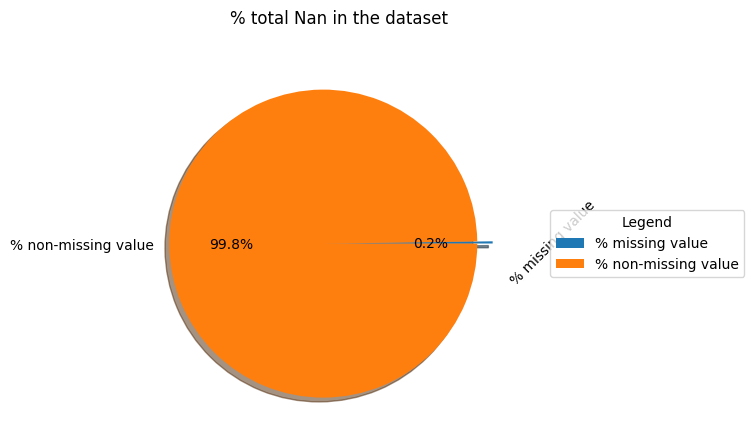

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


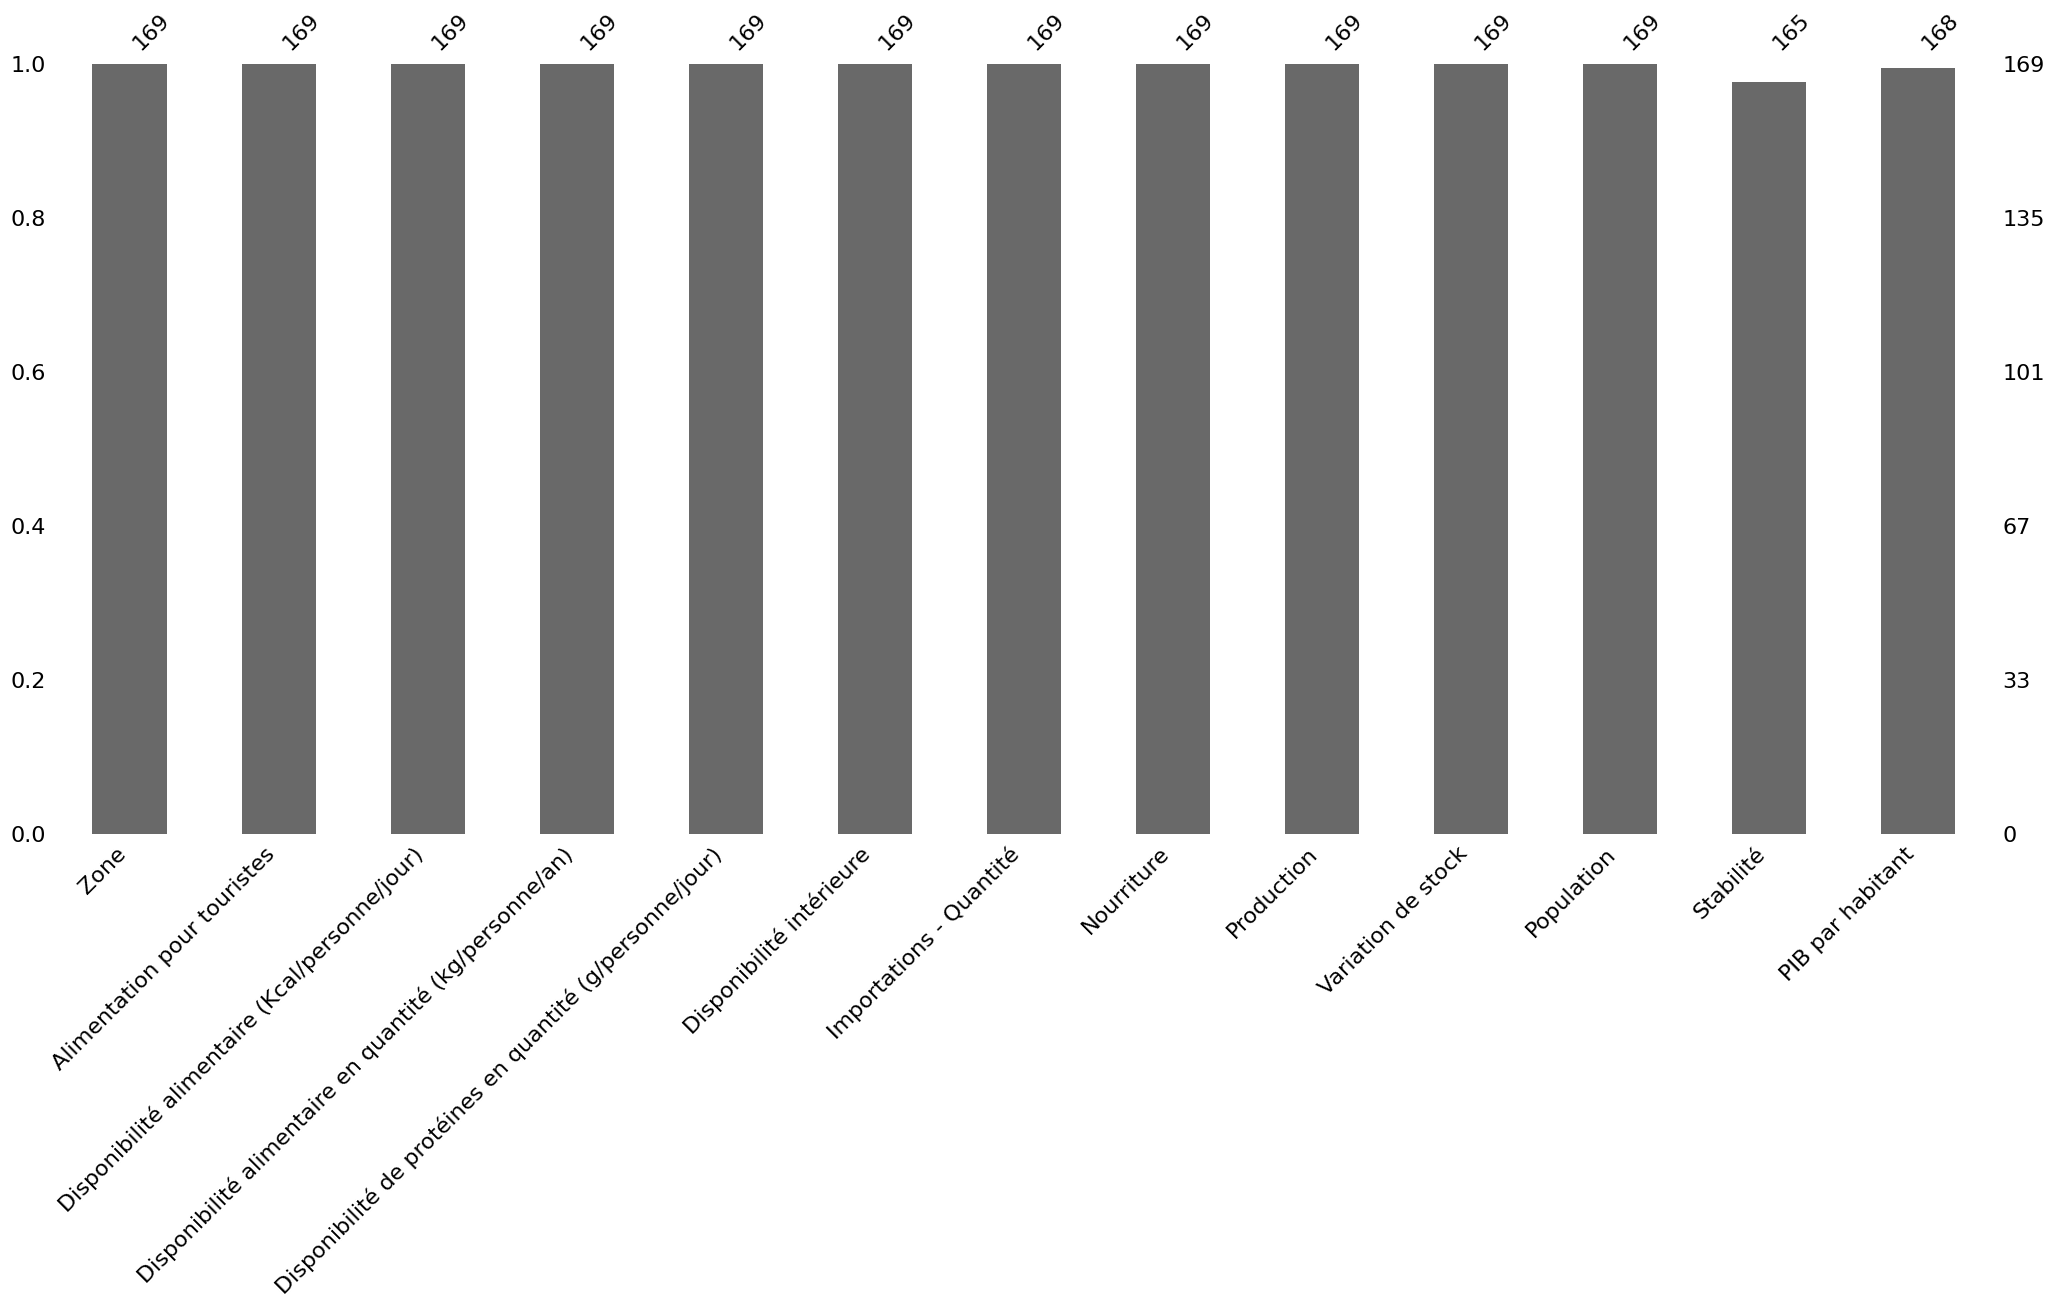

In [ ]:
data_checking(df)

In [ ]:
# Calculate the median of the 'stability' column
median_stabilite = df['Stabilité'].median()
median_PIB = df['PIB par habitant'].median()

# Replace NaN with median
df['Stabilité'].fillna(median_stabilite, inplace=True)
df['PIB par habitant'].fillna(median_PIB, inplace=True)

# Show first 5 lines to check
df.head()

Zone  Alimentation pour touristes  \
0     Afghanistan                   242.776667   
1  Afrique du Sud                     0.000000   
2         Albanie                   242.776667   
3         Algérie                     0.000000   
4       Allemagne                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   57000.0                  29000.0     55000.0     28000.0   
1                 2118000.0                 514000.0   2035000.0   1667000.0   
2                   47000.0                  38000.0     47000.0     13000.0   
3                  277000.0                   2000.0    264000.0    275000.0   
4                 1739000.0                 842000.0   1609000.0   1514000.0   

   Variation de stock  Population  Stabilité  PIB par habitant  
0                 0.0  36296113.0      -2.80        530.149831  
1                 0.0  57009756.0      -0.28       6723.928582  
2              4000.0   2884169.0       0.38       4521.752217  
3                 0.0  41389189.0      -0.92       4134.936055  
4            -29000.0  82658409.0       0.59      44670.222282

# **Indicateurs**

**Chicken consumption**

In [ ]:
# Creating a new variable
df['Consommation de poulet par habitant'] = df['Nourriture']/df['Population']\
*1000

df.head()

Zone  Alimentation pour touristes  \
0     Afghanistan                   242.776667   
1  Afrique du Sud                     0.000000   
2         Albanie                   242.776667   
3         Algérie                     0.000000   
4       Allemagne                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   57000.0                  29000.0     55000.0     28000.0   
1                 2118000.0                 514000.0   2035000.0   1667000.0   
2                   47000.0                  38000.0     47000.0     13000.0   
3                  277000.0                   2000.0    264000.0    275000.0   
4                 1739000.0                 842000.0   1609000.0   1514000.0   

   Variation de stock  Population  Stabilité  PIB par habitant  \
0                 0.0  36296113.0      -2.80        530.149831   
1                 0.0  57009756.0      -0.28       6723.928582   
2              4000.0   2884169.0       0.38       4521.752217   
3                 0.0  41389189.0      -0.92       4134.936055   
4            -29000.0  82658409.0       0.59      44670.222282   

   Consommation de poulet par habitant  
0                             1.515314  
1                            35.695645  
2                            16.295855  
3                             6.378477  
4                            19.465654

In [ ]:
# Obtain the 10 countries with the highest per capita consumption of chicken
top_10_country = df.nlargest(10, 'Consommation de poulet par habitant')

# Obtain the 10 countries with the lowest per capita chicken consumption
bottom_10_country = df.nsmallest(10, 'Consommation de poulet par habitant')

# Show the results
print("Top 10 countries by chicken consumption per capita:")
top_10_country[['Zone', 'Consommation de poulet par habitant']]

Top 10 countries by chicken consumption per capita:


Zone  Consommation de poulet par habitant
131  Saint-Vincent-et-les Grenadines                            72.841833
69                            Israël                            67.444232
133                            Samoa                            66.546542
130             Saint-Kitts-et-Nevis                            57.642425
166            États-Unis d'Amérique                            55.677788
132                     Sainte-Lucie                            55.262663
151                Trinité-et-Tobago                            54.188441
6                 Antigua-et-Barbuda                            52.396621
71                          Jamaïque                            51.012583
21                            Brésil                            48.028756

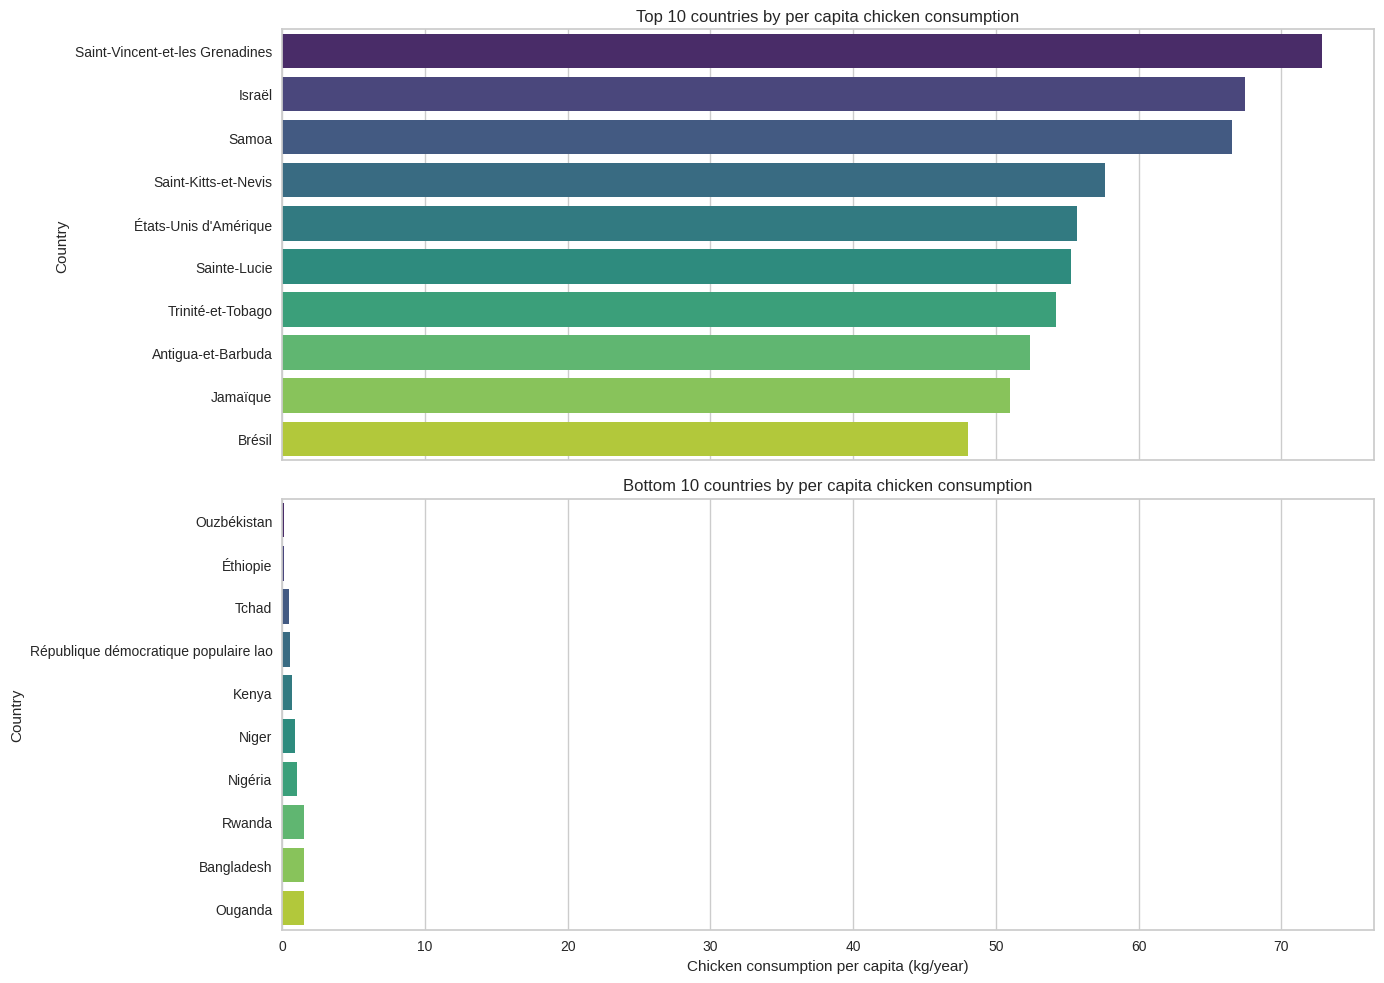

In [ ]:
# Create subcharts for both charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Graph for the 10 countries with the highest consumption
sns.barplot(x='Consommation de poulet par habitant', y='Zone',
            data=top_10_country, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 countries by per capita chicken consumption')
axes[0].set_xlabel('Chicken consumption per capita (kg/year)')
axes[0].set_ylabel('Country')

# Graph for the 10 countries with the lowest consumption
sns.barplot(x='Consommation de poulet par habitant', y='Zone',
            data=bottom_10_country, ax=axes[1], palette='viridis')
axes[1].set_title('Bottom 10 countries by per capita chicken consumption')
axes[1].set_xlabel('Chicken consumption per capita (kg/year)')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


**Distance to France**

Now, we want to create a new variable which can help us in our clustering which is the distance between each country and France.

In [ ]:
# Load geographic data
gdf = gpd.read_file("/content/drive/MyDrive/projet 9 data analyse/ne_10m_admin_\
0_countries.shp")

In [ ]:
# Country lists in French and English'Serbia', 'eswatini', 'São Tomé and Príncipe', 'Tanzania
pays_francais = [
    'Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
    'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
    'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
    'Bangladesh', 'Barbade', 'Belgique', 'Belize',
    'Bolivie (État plurinational de)',
    'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
    'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
    'Cameroun', 'Canada', 'Chili', 'Chine, continentale', 'Chypre', 'Colombie',
    'Congo', 'Costa Rica', 'Croatie',
    'Cuba', 'Côte d\'Ivoire', 'Danemark', 'Djibouti', 'Dominique',
    'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
    'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana',
    'Grenade', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau',
    'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Inde',
    'Indonésie', 'Iran (République islamique d\')', 'Iraq', 'Irlande',
    'Islande', 'Israël',
    'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan', 'Kenya',
    'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho', 'Lettonie',
    'Liban', 'Libéria', 'Lituanie', 'Luxembourg', 'Macédoine du Nord',
    'Madagascar', 'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Malte',
    'Maroc', 'Maurice', 'Mauritanie', 'Mexique', 'Mongolie',
    'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua',
    'Niger', 'Nigéria', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande',
    'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Panama',
    'Paraguay', 'Pays-Bas', 'Philippines', 'Pologne',
    'Polynésie française', 'Portugal', 'Pérou', 'Roumanie',
    'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Rwanda',
    'République centrafricaine','République de Corée', 'République de Moldova',
    'République dominicaine', 'République démocratique populaire lao',
    'République populaire démocratique de Corée', 'République-Unie de Tanzanie',
    'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
    'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe',
    'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie',
    'Soudan', 'Sri Lanka', 'Suisse', 'Suriname', 'Suède',
    'Sénégal', 'Tadjikistan', 'Tchad', 'Tchéquie', 'Thaïlande',
    'Timor-Leste', 'Togo', 'Trinité-et-Tobago', 'Tunisie',
    'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
    'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
    'Zimbabwe', 'Égypte','Émirats arabes unis', 'Équateur',
    'États-Unis d\'Amérique','Éthiopie', 'Îles Salomon'
]

pays_anglais = [
    'Afghanistan', 'South Africa', 'Albania', 'Algeria', 'Germany',
    'Angola', 'Antigua and Barbuda', 'Saudi Arabia', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas',
    'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Bolivia',
    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
    'Burkina Faso', 'Belarus', 'Benin', 'Cabo Verde', 'Cambodia',
    'Cameroon', 'Canada', 'Chile', 'China', 'Cyprus', 'Colombia',
    'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
    'Cuba', 'Ivory Coast', 'Denmark', 'Djibouti', 'Dominica',
    'El Salvador', 'Spain', 'Estonia', 'eSwatini', 'Fiji',
    'Finland', 'France', 'Russia', 'Gabon', 'Gambia', 'Ghana',
    'Grenada', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
    'Guyana', 'Georgia', 'Haiti', 'Honduras', 'Hungary', 'India',
    'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Iceland', 'Israel',
    'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
    'Kyrgyzstan', 'Kiribati', 'Kuwait', 'Lesotho', 'Latvia',
    'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'North Macedonia',
    'Madagascar', 'Malaysia', 'Malawi', 'Maldives', 'Mali', 'Malta',
    'Morocco', 'Mauritius', 'Mauritania', 'Mexico', 'Mongolia',
    'Montenegro', 'Mozambique', 'Myanmar', 'Namibia', 'Nicaragua',
    'Niger', 'Nigeria', 'Norway', 'New Caledonia', 'New Zealand',
    'Nepal', 'Oman', 'Uganda', 'Uzbekistan', 'Pakistan', 'Panama',
    'Paraguay', 'Netherlands', 'Philippines', 'Poland',
    'French Polynesia', 'Portugal', 'Peru', 'Romania',
    'United Kingdom', 'Rwanda', 'Central African Republic',
    'South Korea', 'Moldova', 'Dominican Republic', 'Laos',
    'North Korea', 'United Republic of Tanzania', 'Saint Kitts and Nevis',
    'Saint Vincent and the Grenadines',
    'Saint Lucia', 'Samoa', 'São Tomé and Principe',
    'Republic of Serbia', 'Sierra Leone', 'Slovakia', 'Slovenia',
    'Sudan', 'Sri Lanka', 'Switzerland', 'Suriname', 'Sweden',
    'Senegal', 'Tajikistan', 'Chad', 'Czechia', 'Thailand',
    'East Timor', 'Togo', 'Trinidad and Tobago', 'Tunisia',
    'Turkmenistan', 'Turkey', 'Ukraine', 'Uruguay', 'Vanuatu',
    'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe', 'Egypt',
    'United Arab Emirates', 'Ecuador', 'United States of America',
    'Ethiopia', 'Solomon Islands'
]

# Create a DataFrame
df_pays = pd.DataFrame({
    'Nom en français': pays_francais,
    'Nom en anglais': pays_anglais
})

# # Save as CSV file
# df_pays.to_csv('country_mapping.csv', sep=';', index=False)

In [ ]:
# Ensure that the latitude and longitude columns exist and are valid
if 'LATITUDE' not in gdf.columns or 'LONGITUDE' not in gdf.columns:
    gdf['LATITUDE'] = gdf.geometry.centroid.y
    gdf['LONGITUDE'] = gdf.geometry.centroid.x

# Add France with valid coordinates
france_coords = {'LATITUDE': 46.603354, 'LONGITUDE': 1.888334}
gdf.loc[gdf['ADMIN'] == 'France', ['LATITUDE', 'LONGITUDE']] = france_coords\
 ['LATITUDE'], france_coords['LONGITUDE']

# Remove lines with NaN coordinates
gdf = gdf.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Check if the 'Area' column exists, if not, use another column
if 'Zone' not in df.columns:
    print("The 'Zone' column does not exist. Here are the available columns:")
    print(df.columns)
    # Suppose the name of the countries is stored in a column called 'Country'
    df['Zone'] = df['Country']

# Add a column for the distances to France
df['distance_to_france'] = None

# Check the available columns in the match file
print("Columns available in the match file:")
print(df_pays.columns)

# Create a mapping dictionary
mapping = dict(zip(df_pays['Nom en français'],
                   df_pays['Nom en anglais']))

# Apply mappings
df['Zone'] = df['Zone'].replace(mapping)

# Show countries from df which are not found in gdf
missing_countries = set(df['Zone']) - set(gdf['ADMIN'])
if missing_countries:
    print(f"The following countries are not found in the GeoDataFrame: \
    {missing_countries}")

# Function to calculate the distance between two geographic points
def calculate_distance(country_coords, france_coords):
    try:
        if not all(np.isfinite(country_coords)):
            return None
        return geodesic(country_coords, (france_coords['LATITUDE'],
                                         france_coords['LONGITUDE'])).kilometers
    except ValueError:
        return None

# Apply distance calculation function
for country in df['Zone']:
    row = gdf[gdf['ADMIN'] == country]
    if not row.empty:
        country_coords = (row.iloc[0]['LATITUDE'], row.iloc[0]['LONGITUDE'])
        df.loc[df['Zone'] == country, 'distance_to_france'] = \
        calculate_distance(country_coords, france_coords)
    else:
        print(f"The country '{country}' was not found in the GeoDataFrame.")

# Show first rows of updated DataFrame
df.head()

Columns available in the match file:
Index(['Nom en français', 'Nom en anglais'], dtype='object')


Zone  Alimentation pour touristes  \
0   Afghanistan                   242.776667   
1  South Africa                     0.000000   
2       Albania                   242.776667   
3       Algeria                     0.000000   
4       Germany                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
0                   57000.0                  29000.0     55000.0     28000.0   
1                 2118000.0                 514000.0   2035000.0   1667000.0   
2                   47000.0                  38000.0     47000.0     13000.0   
3                  277000.0                   2000.0    264000.0    275000.0   
4                 1739000.0                 842000.0   1609000.0   1514000.0   

   Variation de stock  Population  Stabilité  PIB par habitant  \
0                 0.0  36296113.0      -2.80        530.149831   
1                 0.0  57009756.0      -0.28       6723.928582   
2              4000.0   2884169.0       0.38       4521.752217   
3                 0.0  41389189.0      -0.92       4134.936055   
4            -29000.0  82658409.0       0.59      44670.222282   

   Consommation de poulet par habitant distance_to_france  
0                             1.515314        5480.783491  
1                            35.695645         8692.45795  
2                            16.295855        1576.486793  
3                             6.378477        2049.304179  
4                            19.465654         798.644139

Now, we can remove France from our data since we will not export to our country.

In [ ]:
# Remove lines where 'Zone' equals 'France'
df = df[df['Zone'] != 'France']

In [ ]:
# Explicit conversion of distances to float type
df['distance_to_france'] = pd.to_numeric(df['distance_to_france'],
                                         errors='coerce')

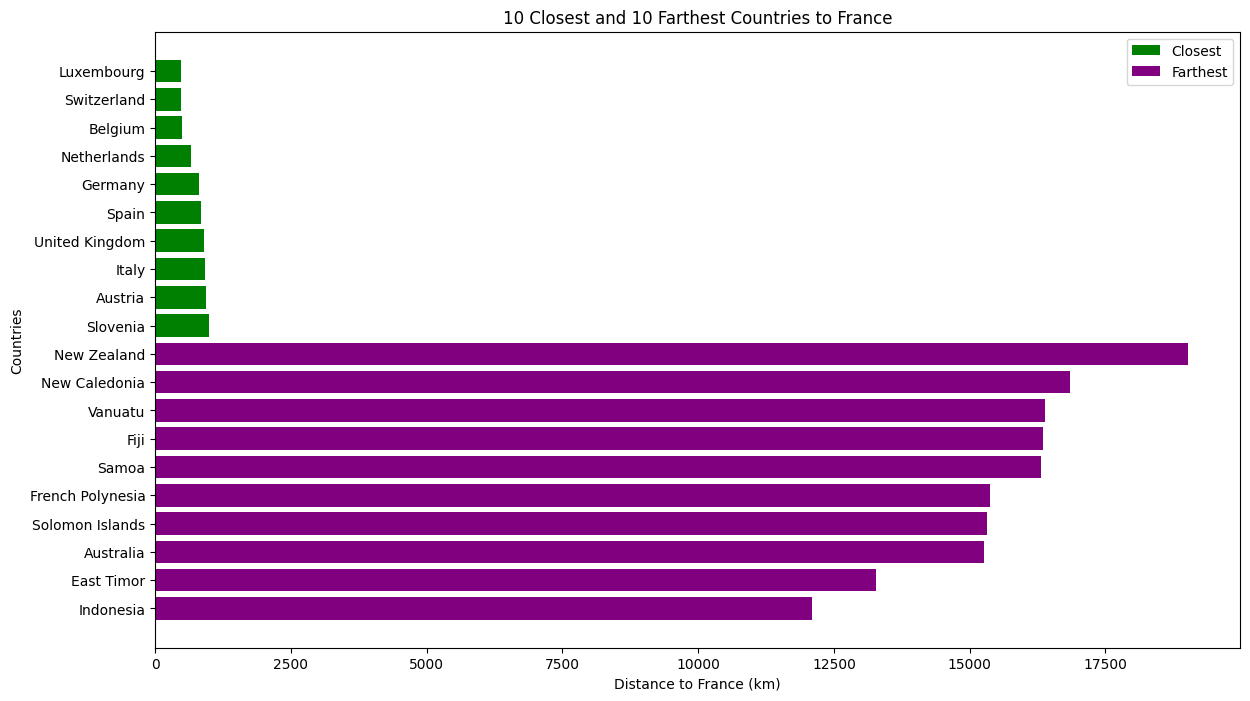

In [ ]:
# Selection of the ten closest countries and the ten furthest countries
closest_countries = df.nsmallest(10, 'distance_to_france')
farthest_countries = df.nlargest(10, 'distance_to_france')

# Creation of the graph
fig, ax = plt.subplots(figsize=(14, 8))

# Showing the nearest countries
ax.barh(closest_countries['Zone'], closest_countries['distance_to_france'],
        color='green', label='Closest')

# Showing the most distant countries
ax.barh(farthest_countries['Zone'], farthest_countries['distance_to_france'],
        color='purple', label='Farthest')

# Configuring labels and title
ax.set_xlabel('Distance to France (km)')
ax.set_ylabel('Countries')
ax.set_title('10 Closest and 10 Farthest Countries to France')
ax.legend()

# Invert the y axis to have the closest country at the top
ax.invert_yaxis()

# Graph display
plt.show()

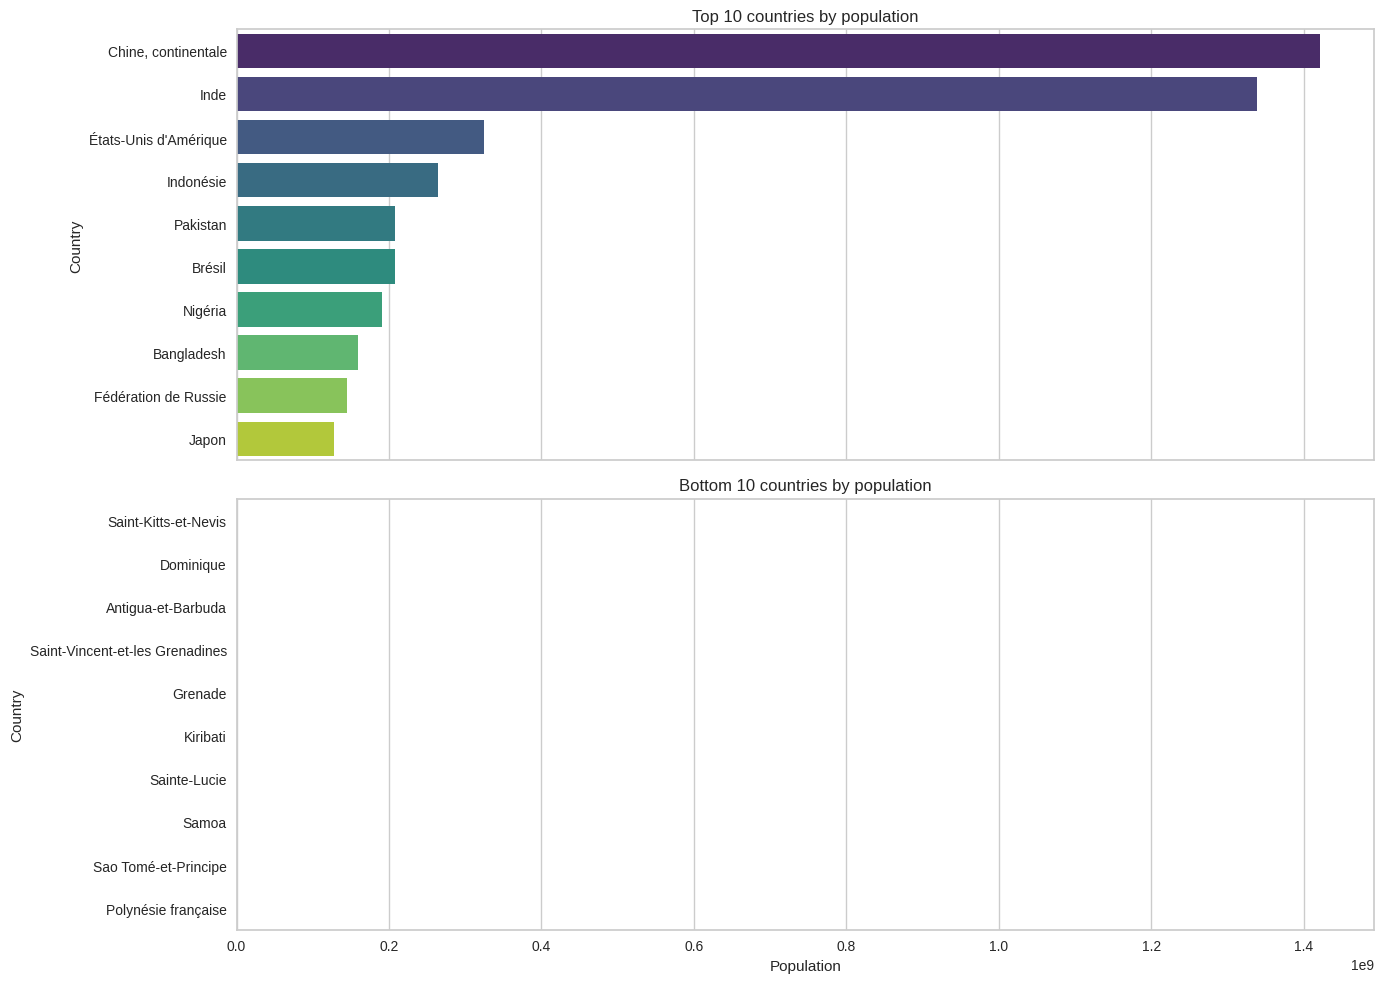

In [ ]:
# Get the 10 countries with the largest population
top_10_population = df.nlargest(10, 'Population')

# Get the 10 countries with the smallest population
bottom_10_population = df.nsmallest(10, 'Population')

# Create subcharts for both charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Chart for the 10 countries with the largest population
sns.barplot(x='Population', y='Zone', data=top_10_population, ax=axes[0],
            palette='viridis')
axes[0].set_title('Top 10 countries by population')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Country')

# Chart for the 10 countries with the smallest population
sns.barplot(x='Population', y='Zone', data=bottom_10_population, ax=axes[1],
            palette='viridis')
axes[1].set_title('Bottom 10 countries by population')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

**Political stability**

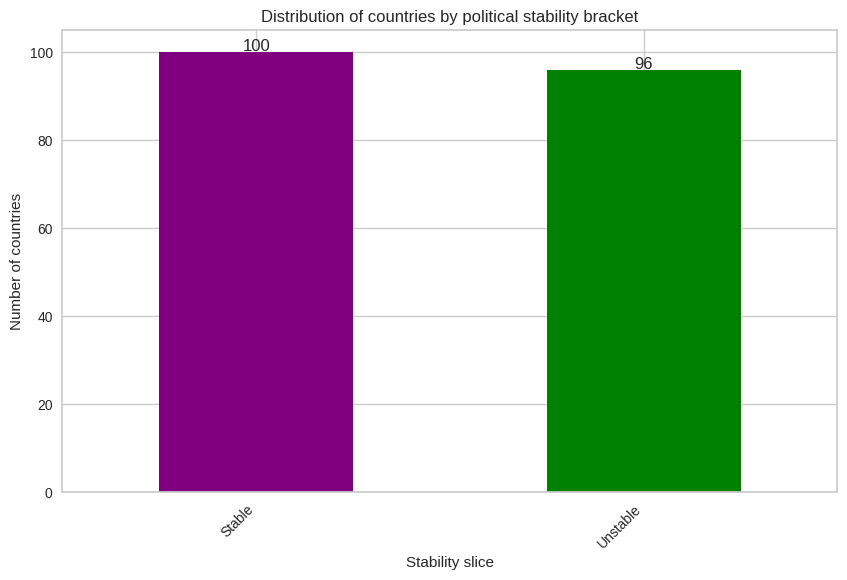

In [ ]:
# Determine the cutoff points for your slices
cutpoints = [-float('inf'), 0, float('inf')]

# Set labels for slices
labels_stability = ['Unstable', 'Stable']

# Create a new column to indicate the stability slice
data_stability['Tranche_stabilité'] = pd.cut(data_stability['Stabilité'],
                                              bins=cutpoints,
                                              labels=labels_stability)

# Count the number of countries in each stability bracket
counts = data_stability['Tranche_stabilité'].value_counts()

# Plot the bar chart with different colors for each stability slice
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color=['purple', 'green'])
plt.title('Distribution of countries by political stability bracket')
plt.xlabel('Stability slice')
plt.ylabel('Number of countries')

# calculation of countries in each bracket
for i, v in enumerate(counts):
     plt.text(i, v + 0.2, str(v), ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filter data for top 10 unstable countries
unstable_country = data_stability[data_stability['Tranche_stabilité'] == \
                                  'Unstable'].head(10)

# Filter data for top 10 stable countries
stable_country = data_stability[data_stability['Tranche_stabilité'] == \
                                'Stable'].head(10)

# Show the results
print("\ntop 10 stable countries:")
stable_country[['Zone', 'Stabilité']]


top 10 stable countries:


Zone  Stabilité
2              Albanie       0.38
4            Allemagne       0.59
5              Andorre       1.42
7   Antigua-et-Barbuda       0.75
9            Argentine       0.17
11           Australie       0.90
12            Autriche       1.05
14             Bahamas       0.99
17             Barbade       0.97
19            Belgique       0.43

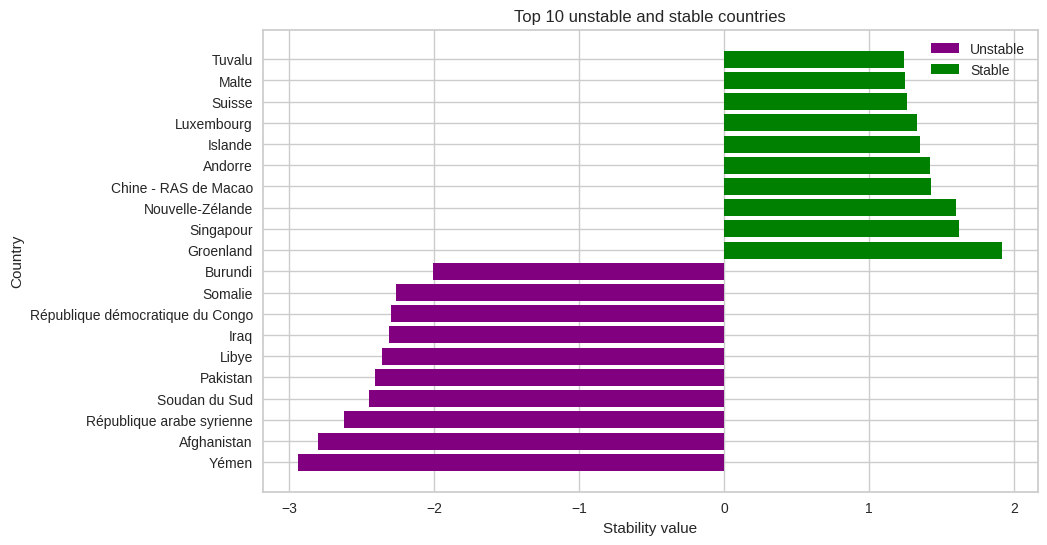

In [ ]:
# Filter data for top 10 unstable countries
unstable_country = data_stability[data_stability\
 ['Tranche_stabilité'] == 'Unstable'].sort_values(by='Stabilité').head(10)

# Filter data for top 10 stable countries
stable_country = data_stability[data_stability\
 ['Tranche_stabilité'] == 'Stable'].sort_values(by='Stabilité',
                                                ascending=False).head(10)



# Create a figure
plt.figure(figsize=(10, 6))

# Plot the bars for unstable countries
plt.barh(unstable_country['Zone'], unstable_country['Stabilité'], color='purple',
         label='Unstable')

# Plot the bars for stable countries
plt.barh(stable_country['Zone'], stable_country['Stabilité'], color='green',
         label='Stable')

# Add title and tags
plt.title('Top 10 unstable and stable countries')
plt.xlabel('Stability value')
plt.ylabel('Country')

# Show legend
plt.legend()

# Show chart
plt.show()


**Import**

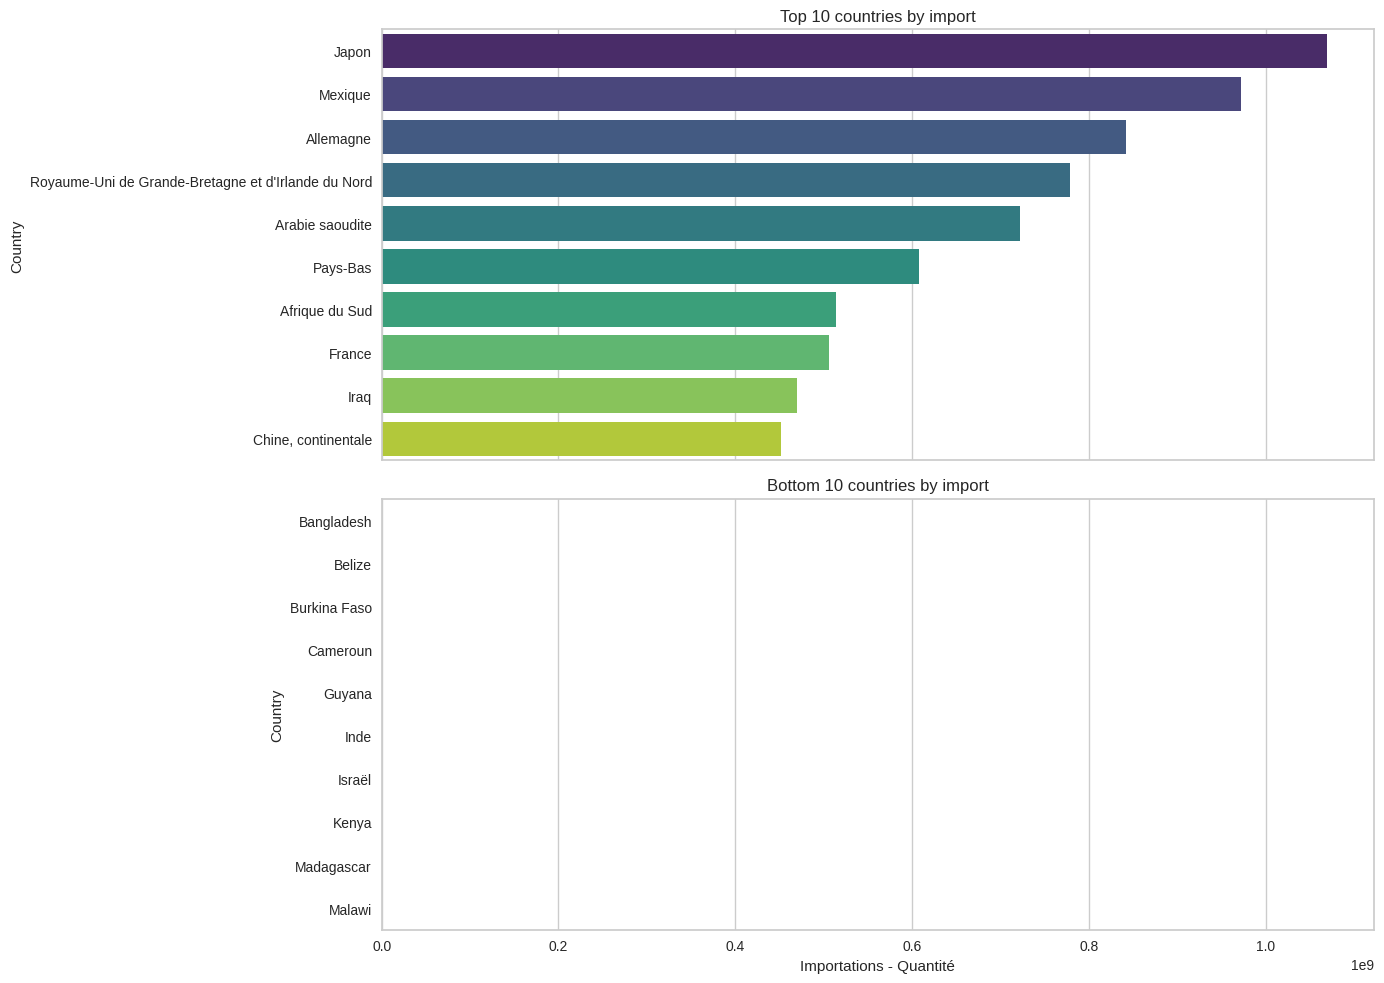

In [ ]:
# Get the 10 countries with the largest Import quantity
top_10_import = df.nlargest(10, 'Importations - Quantité')

# Get the 10 countries with the smallest Import quantity
bottom_10_import = df.nsmallest(10, 'Importations - Quantité')

# Create subcharts for both charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Chart for the 10 countries with the largest Import quantity
sns.barplot(x='Importations - Quantité', y='Zone', data=top_10_import,
            ax=axes[0],
            palette='viridis')
axes[0].set_title('Top 10 countries by import')
axes[0].set_xlabel('Importations - Quantité')
axes[0].set_ylabel('Country')

# Chart for the 10 countries with the smallest Import quantity
sns.barplot(x='Importations - Quantité', y='Zone', data=bottom_10_import,
            ax=axes[1],
            palette='viridis')
axes[1].set_title('Bottom 10 countries by import')
axes[1].set_xlabel('Importations - Quantité')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

**Production**

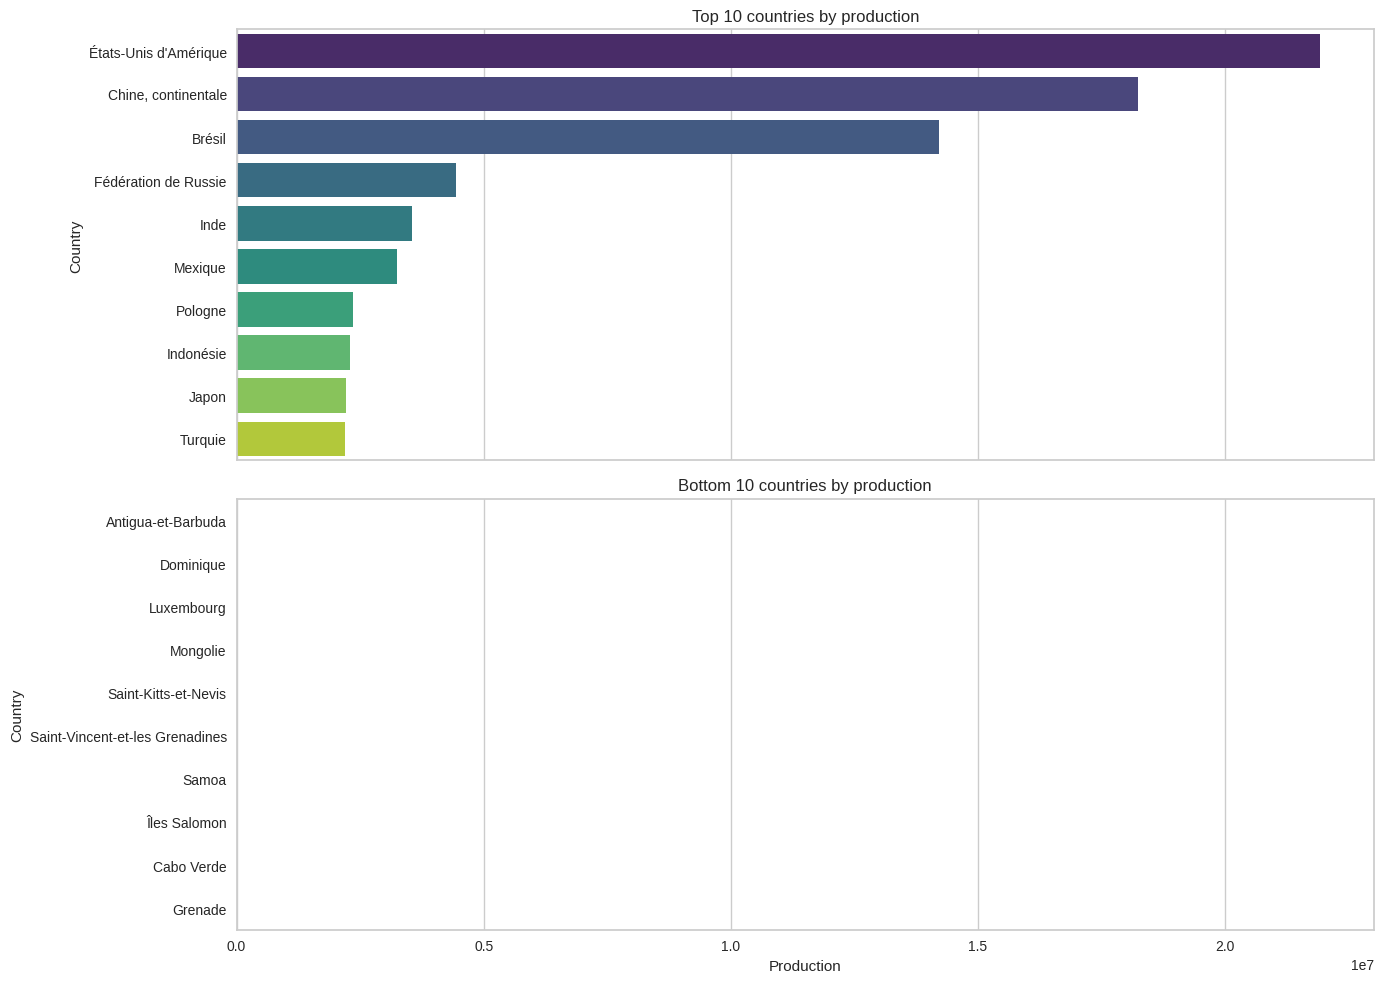

In [ ]:
# Get the 10 countries with the largest Production
top_10_production = df.nlargest(10, 'Production')

# Get the 10 countries with the smallest production
bottom_10_production = df.nsmallest(10, 'Production')

# Create subcharts for both charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Chart for the 10 countries with the largest production
sns.barplot(x='Production', y='Zone', data=top_10_production,
            ax=axes[0],
            palette='viridis')
axes[0].set_title('Top 10 countries by production')
axes[0].set_xlabel('Production')
axes[0].set_ylabel('Country')

# Chart for the 10 countries with the smallest production
sns.barplot(x='Production', y='Zone', data=bottom_10_production,
            ax=axes[1],
            palette='viridis')
axes[1].set_title('Bottom 10 countries by production')
axes[1].set_xlabel('Production')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

**Univariate analysis**

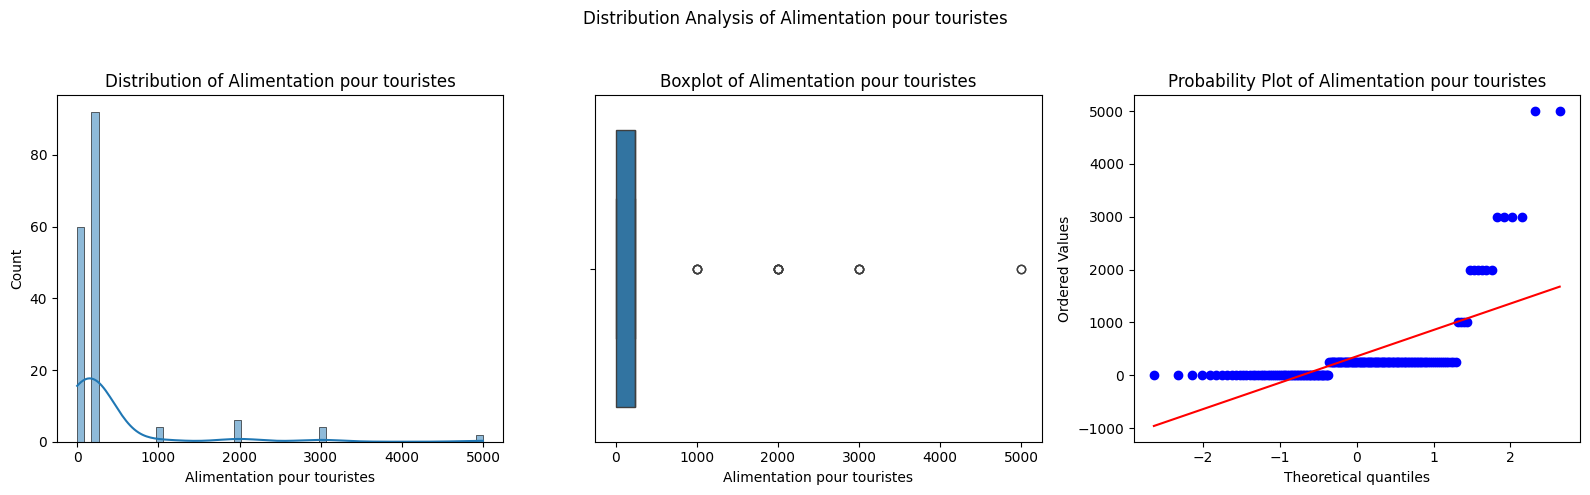

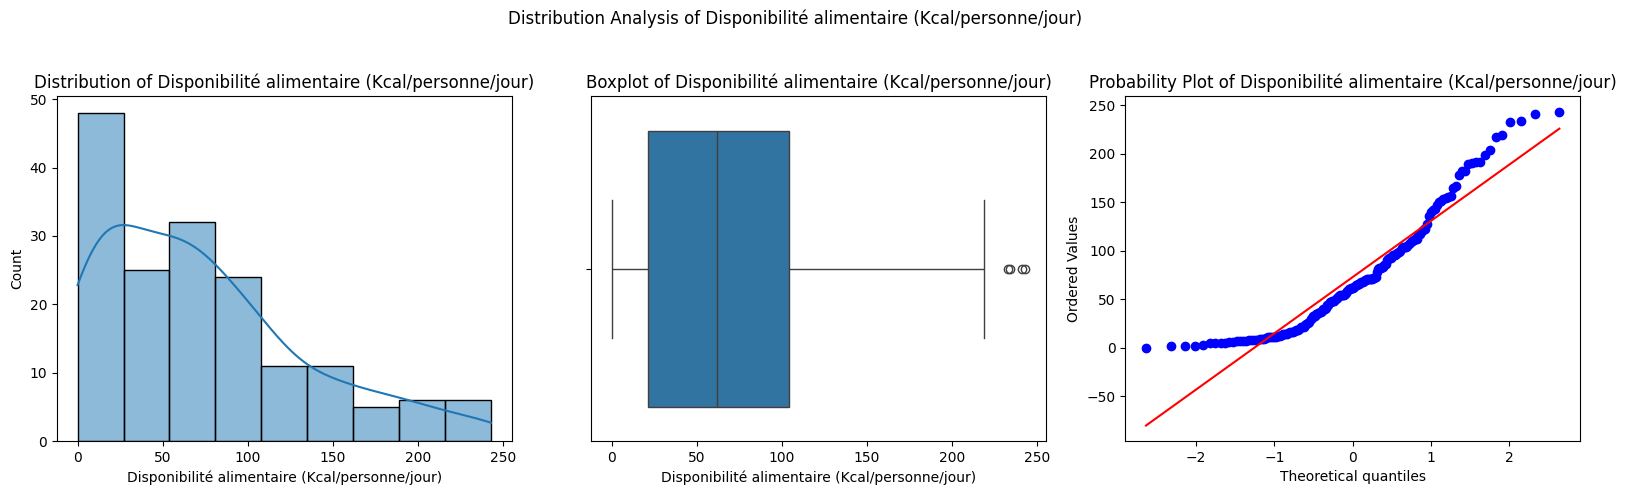

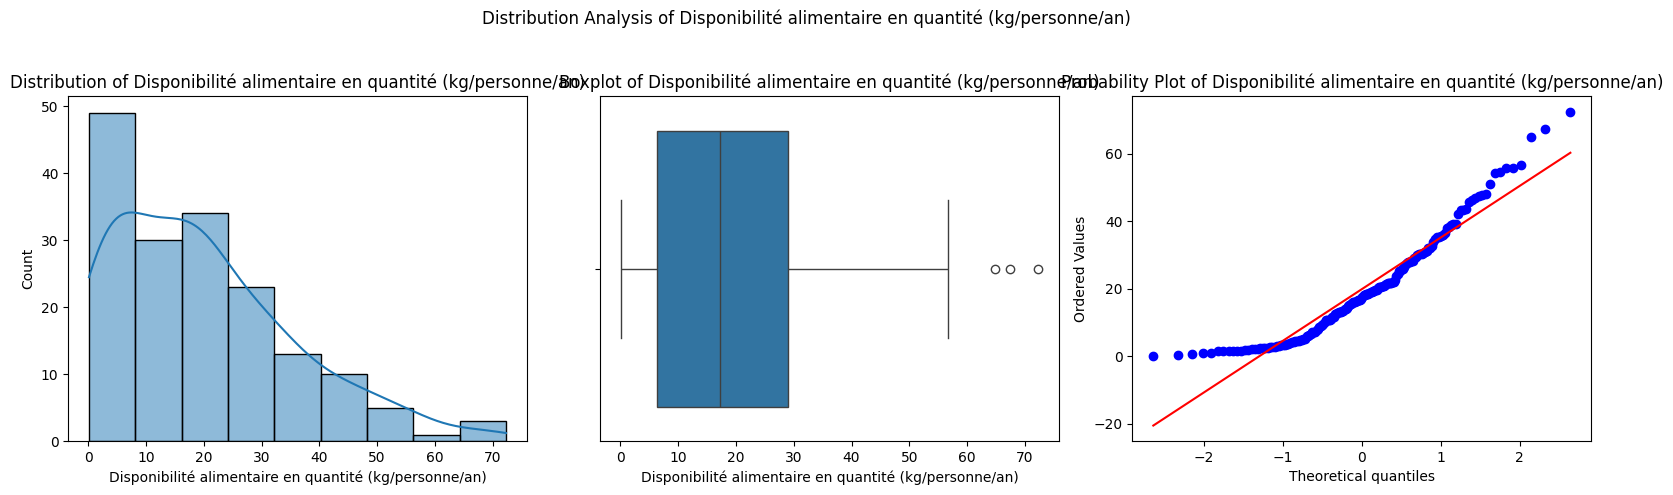

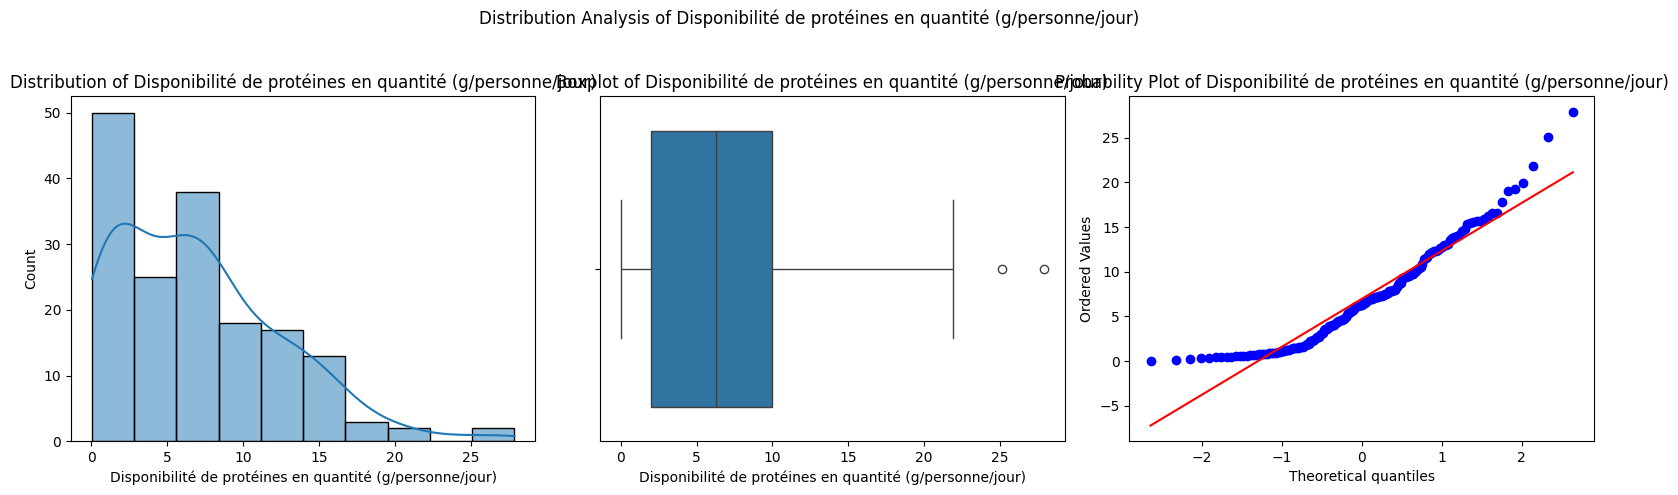

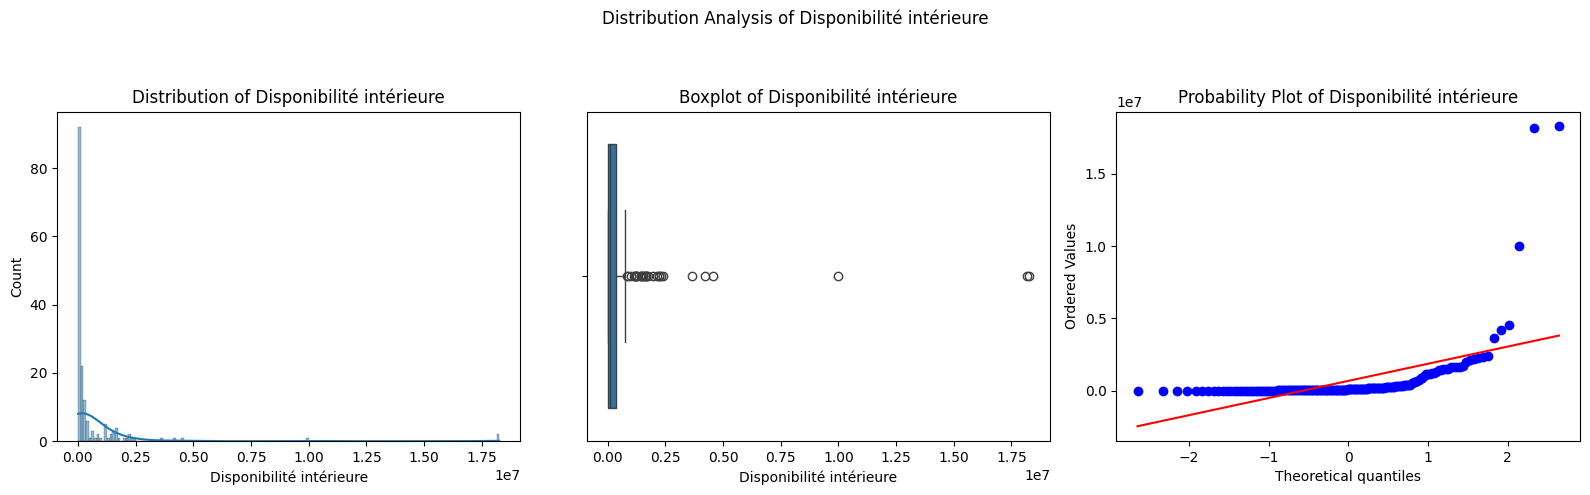

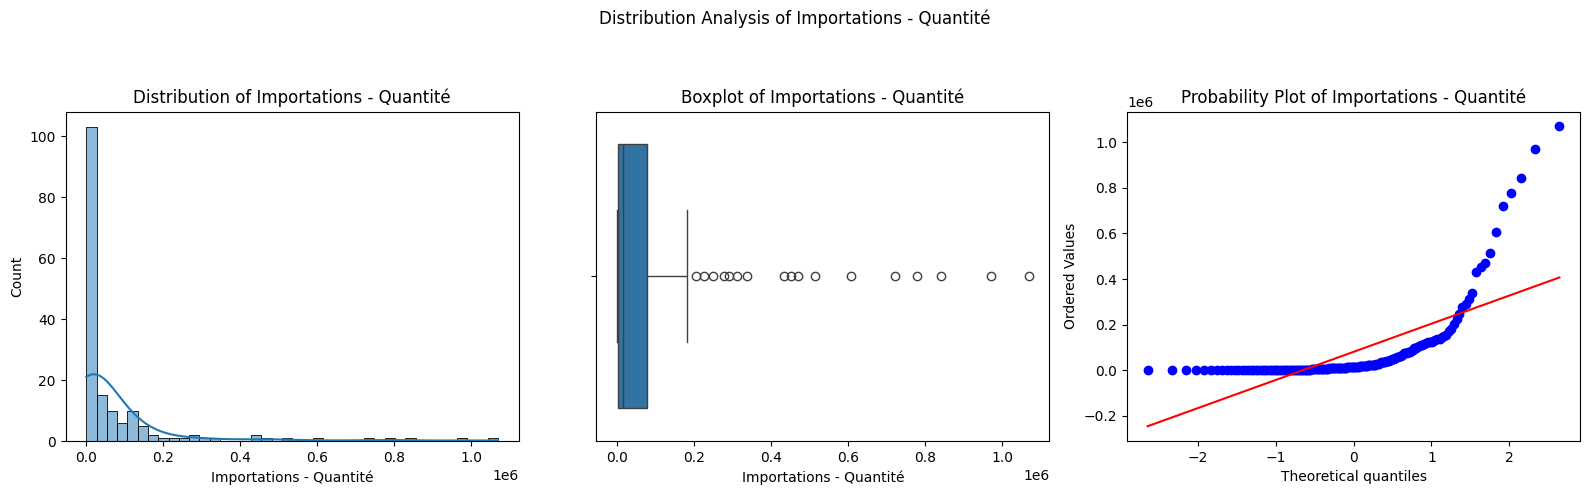

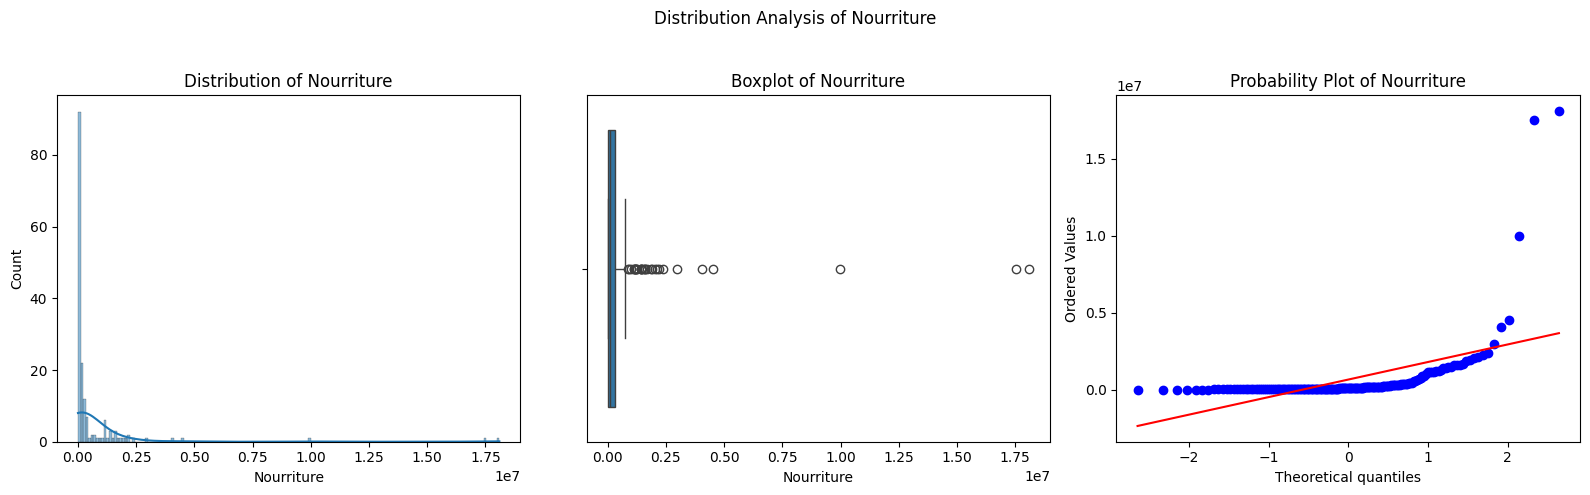

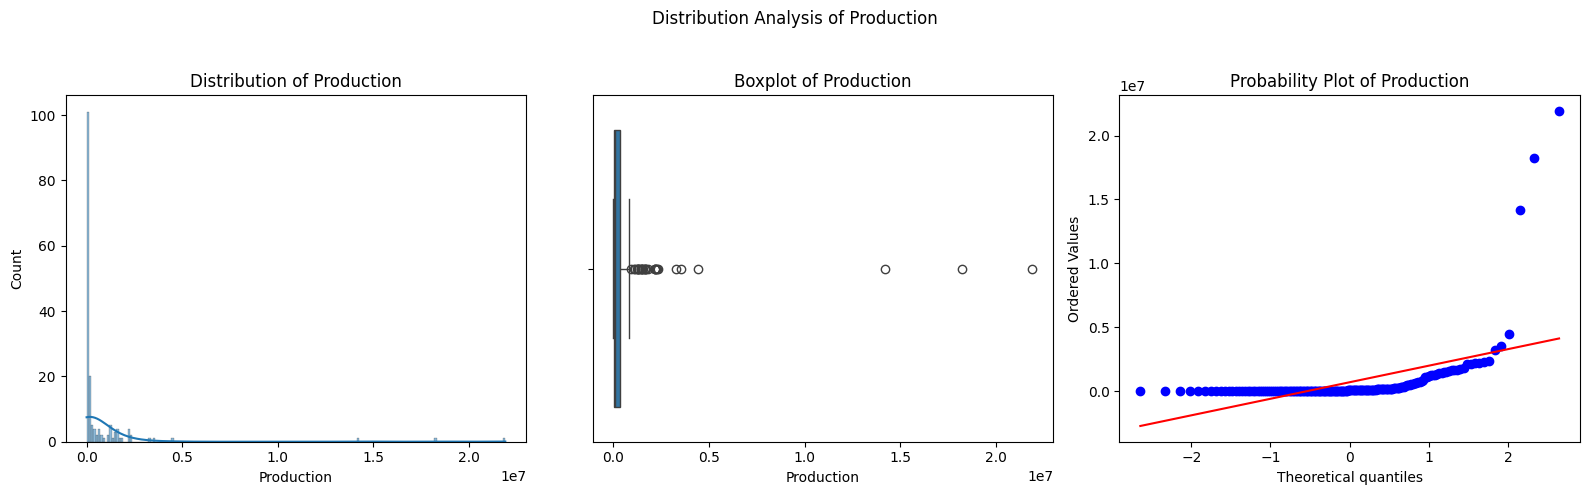

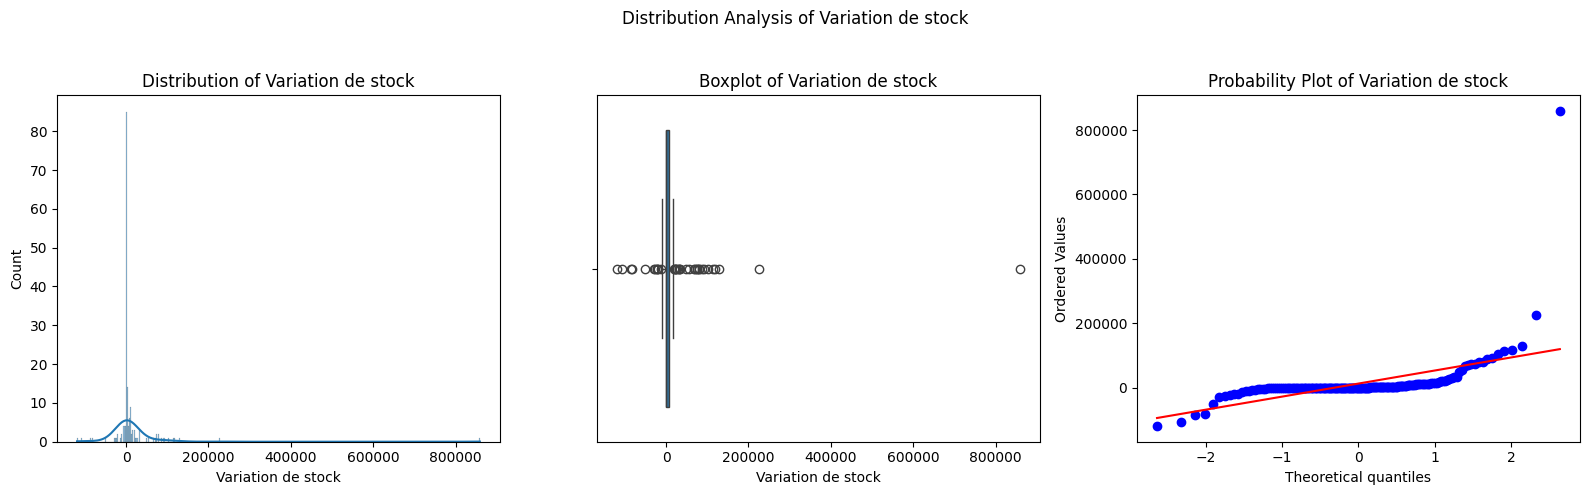

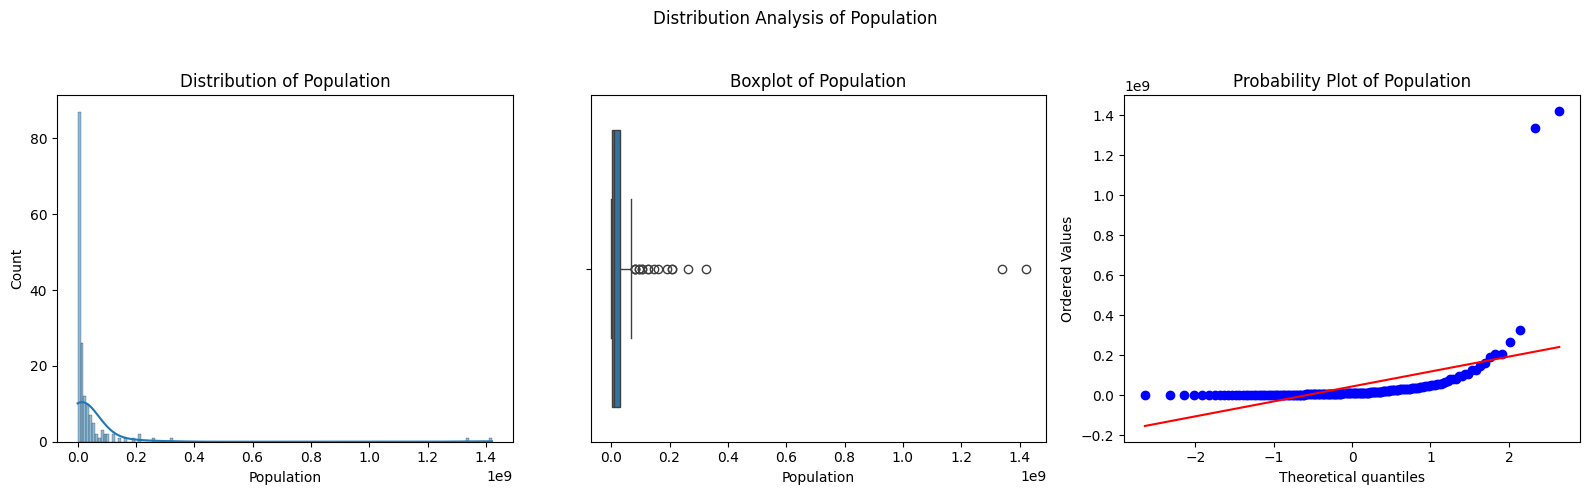

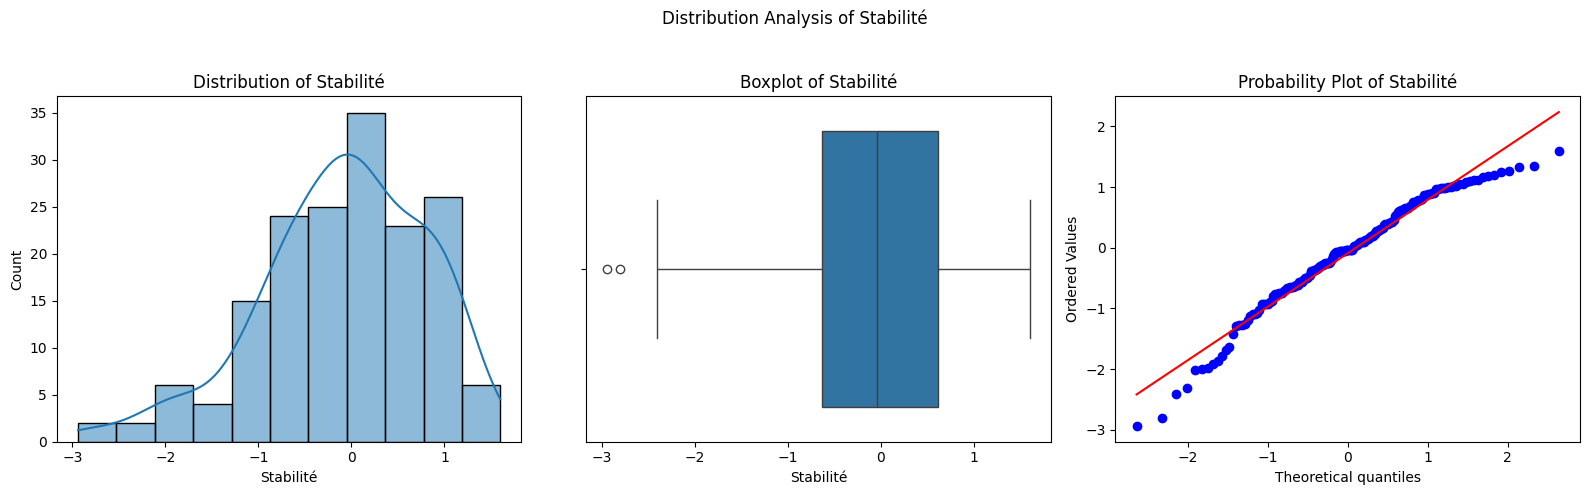

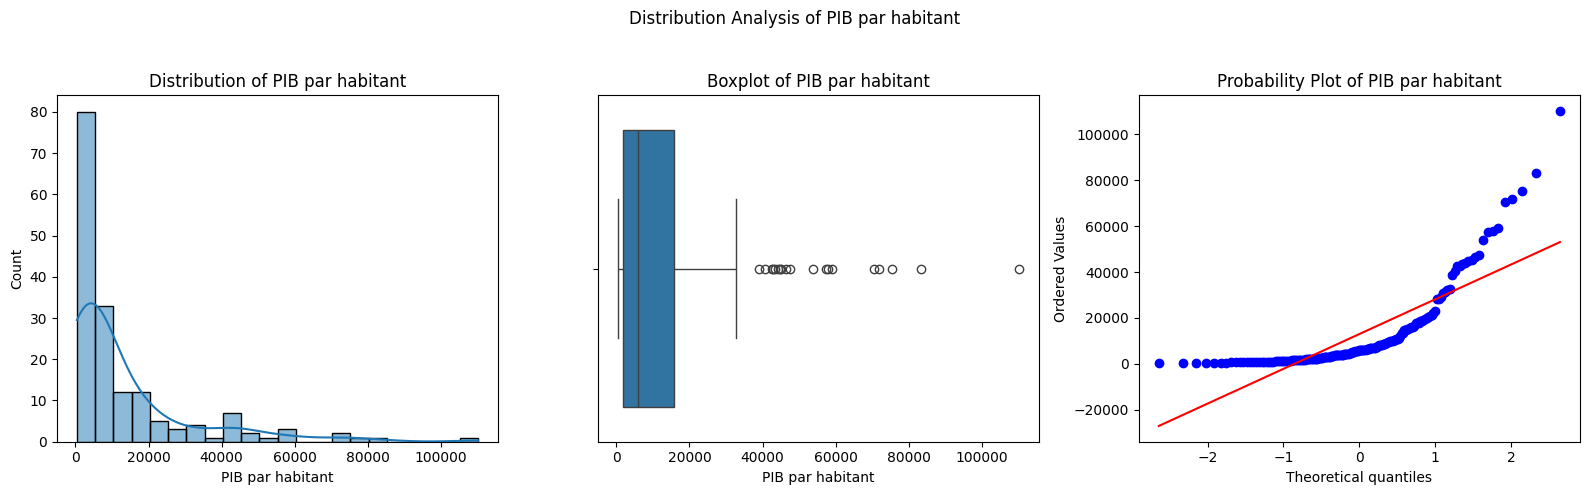

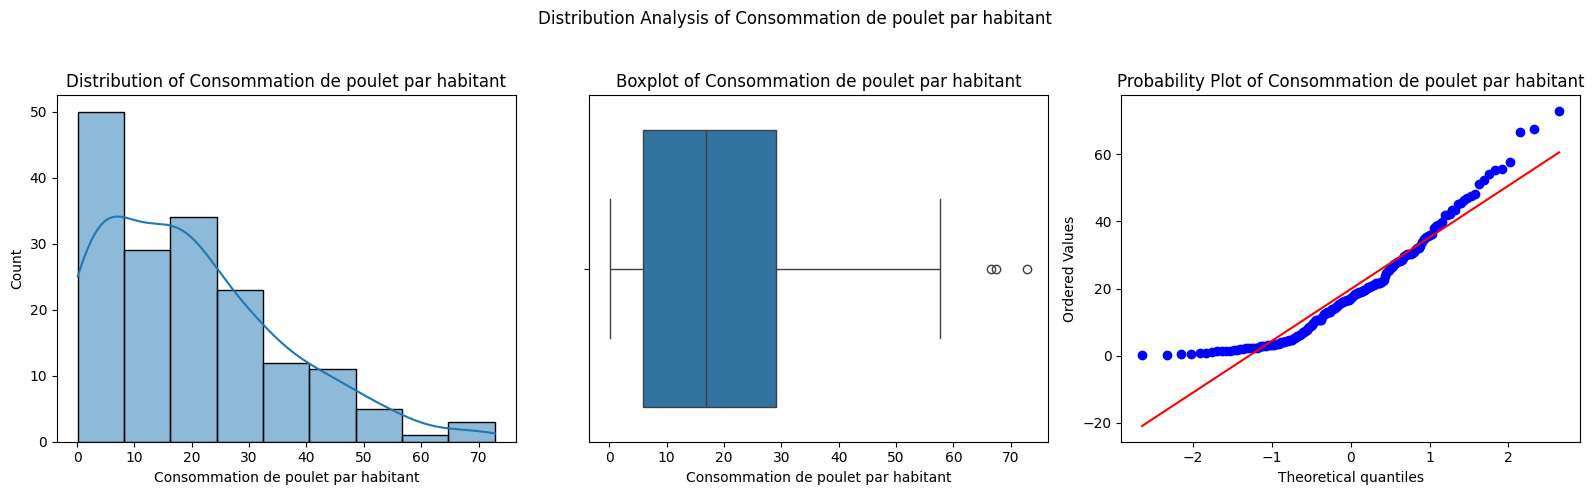

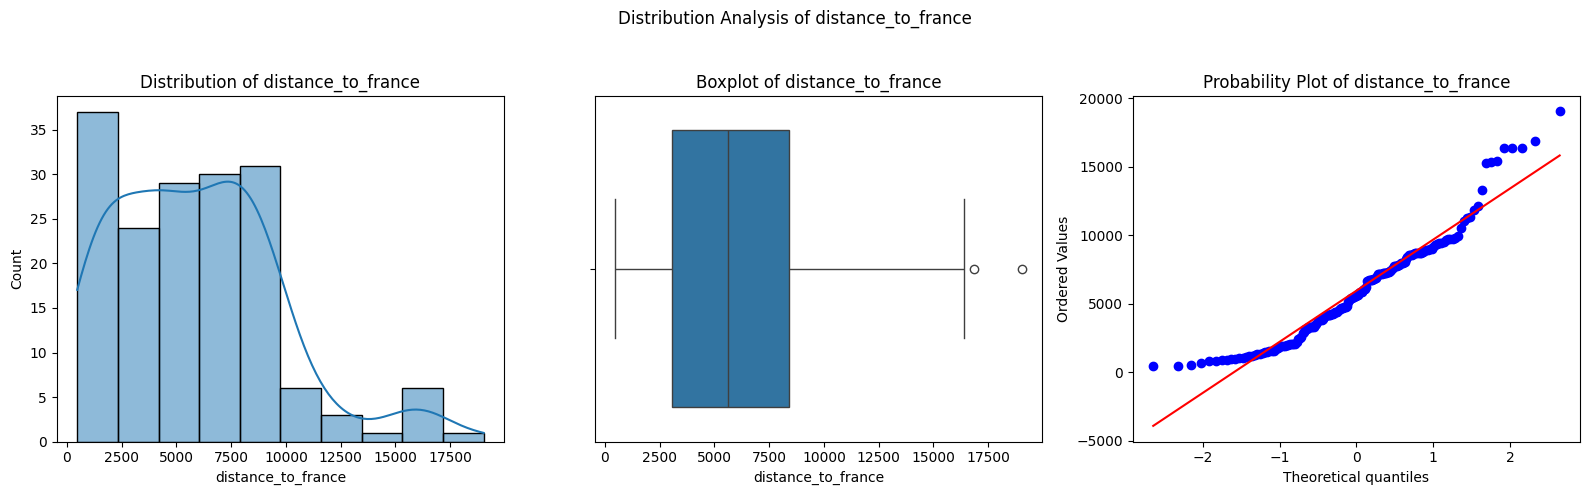

In [ ]:
# Identify numeric columns
numeric_features = df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column to create the charts
for feature in numeric_features:
    plt.figure(figsize=(16, 5))

    # Distribution plot
    plt.subplot(131)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    # Box plot
    plt.subplot(132)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Probability plot
    plt.subplot(133)
    stats.probplot(df[feature], plot=plt)
    plt.title(f'Probability Plot of {feature}')

    plt.suptitle(f'Distribution Analysis of {feature}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
df[df['Consommation de poulet par habitant'] > 60]

Zone  Alimentation pour touristes  \
68                            Israël                   242.776667   
130  Saint-Vincent-et-les Grenadines                     0.000000   
132                            Samoa                  2000.000000   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
68                                               67.39        
130                                              72.31        
132                                              64.77        

     Disponibilité de protéines en quantité (g/personne/jour)  \
68                                               27.87          
130                                              25.10          
132                                              21.88          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
68                   636000.0                      0.0    556000.0   
130                    8000.0                   9000.0      8000.0   
132                   15000.0                  17000.0     13000.0   

     Production  Variation de stock  Population  Stabilité  PIB par habitant  \
68     629000.0            -10000.0   8243848.0      -0.89      42756.825063   
130         0.0              1000.0    109827.0       0.89       8030.568916   
132         0.0              2000.0    195352.0       1.18       4246.467778   

     Consommation de poulet par habitant  
68                             67.444232  
130                            72.841833  
132                            66.546542

In [ ]:
df[df['Alimentation pour touristes'] > 1000]

Zone  Alimentation pour touristes  \
6        Antigua-et-Barbuda                       2000.0   
15                  Barbade                       3000.0   
31                   Chypre                       2000.0   
34               Costa Rica                       3000.0   
36                     Cuba                       3000.0   
40                Dominique                       2000.0   
52                  Grenade                       3000.0   
70                 Jamaïque                       2000.0   
88                 Maldives                       5000.0   
122  République dominicaine                       5000.0   
129                   Samoa                       2000.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
6                                                54.10        
15                                               46.78        
31                                               25.08        
34                                               26.52        
36                                               23.72        
40                                               35.19        
52                                               45.70        
70                                               51.10        
88                                               13.50        
122                                              35.26        
129                                              64.77        

     Disponibilité de protéines en quantité (g/personne/jour)  \
6                                                17.77          
15                                               15.33          
31                                                9.58          
34                                                7.93          
36                                                7.12          
40                                               11.52          
52                                               15.50          
70                                               15.71          
88                                                4.70          
122                                              10.88          
129                                              21.88          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
6                      7000.0                   7000.0      5000.0   
15                    17000.0                   2000.0     13000.0   
31                    38000.0                  14000.0     30000.0   
34                   134000.0                  17000.0    131000.0   
36                   342000.0                 312000.0    269000.0   
40                     4000.0                   4000.0      3000.0   
52                     8000.0                   7000.0      5000.0   
70                   152000.0                  31000.0    149000.0   
88                    12000.0                  12000.0      7000.0   
122                  375000.0                  42000.0    371000.0   
129                   15000.0                  17000.0     13000.0   

     Production  Variation de stock  Population  Stabilité  PIB par habitant  \
6           0.0                 0.0     95426.0       0.75      16110.556281   
15      15000.0                 0.0    286232.0       0.97      17843.196496   
31      25000.0                 0.0   1179678.0       0.54      18987.256286   
34     133000.0             13000.0   4949954.0       0.61      12118.133618   
36      29000.0             -1000.0  11339254.0       0.65       8543.360968   
40          0.0                 0.0     71458.0       1.20       7395.991648   
52       1000.0                 0.0    110874.0       1.01       9309.267842   
70     128000.0              7000.0   2920848.0       0.31       5273.149061   
88      15000.0                 0.0    496402.0       0.23      10063.003709   
122    339000.0                 0.0  10513104.0       0.16       7513.497951   
129         0.0              2000.0    1953

We can conclude that the outliers of the variable 'Food for tourists' are only statistical outliers due to the significant quantities present in some tourist countries.

In [ ]:
df[df['Disponibilité alimentaire en quantité (kg/personne/an)'] > 60]

Zone  Alimentation pour touristes  \
68                            Israël                   242.776667   
127  Saint-Vincent-et-les Grenadines                     0.000000   
129                            Samoa                  2000.000000   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
68                                               67.39        
127                                              72.31        
129                                              64.77        

     Disponibilité de protéines en quantité (g/personne/jour)  \
68                                               27.87          
127                                              25.10          
129                                              21.88          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
68                   636000.0                      0.0    556000.0   
127                    8000.0                   9000.0      8000.0   
129                   15000.0                  17000.0     13000.0   

     Production  Variation de stock  Population  Stabilité  PIB par habitant  \
68     629000.0            -10000.0   8243848.0      -0.89      42756.825063   
127         0.0              1000.0    109827.0       0.89       8030.568916   
129         0.0              2000.0    195352.0       1.18       4246.467778   

     Consommation de poulet par habitant  
68                             67.444232  
127                            72.841833  
129                            66.546542

In [ ]:
df[df['Disponibilité de protéines en quantité (g/personne/jour)'] > 22.5]

Zone  Alimentation pour touristes  \
69                            Israël                          0.0   
127  Saint-Vincent-et-les Grenadines                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
69                                               67.39        
127                                              72.31        

     Disponibilité de protéines en quantité (g/personne/jour)  \
69                                               27.87          
127                                              25.10          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
69                   636000.0                      0.0    556000.0   
127                    8000.0                   9000.0      8000.0   

     Production  Variation de stock  Population  Stabilité Tranche_stabilité  \
69     629000.0                 0.0   8243848.0      -0.89          Unstable   
127         0.0              1000.0    109827.0       0.89            Stable   

        PIB  
69   106.41  
127  100.46

In [ ]:
df[df['Disponibilité intérieure'] > 2000000]

Zone  \
1                                       Afrique du Sud   
21                                              Brésil   
48                                Fédération de Russie   
62                                                Inde   
63                                           Indonésie   
64                      Iran (République islamique d')   
71                                               Japon   
94                                             Mexique   
117  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
162                              États-Unis d'Amérique   

     Alimentation pour touristes  \
1                            0.0   
21                           0.0   
48                           0.0   
62                           0.0   
63                           0.0   
64                           0.0   
71                           0.0   
94                           0.0   
117                          0.0   
162                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                                35.69        
21                                               48.03        
48                                               30.98        
62                                                2.22        
63                                                7.19        
64                                               27.52        
71                                               18.50        
94                                               32.52        
117                                              31.94        
162                                              55.68        

     Disponibilité de protéines en quantité (g/personne/jour)  \
1                                                14.11          
21                                               15.68          
48                                               10.44          
62                                                0.75          
63                                                2.42          
64                                                9.80          
71                                                7.24          
94                                                9.26          
117                                              13.77          
162                                              19.93          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
1                   2118000.0                 514000.0   2035000.0   
21                  9982000.0                   3000.0   9982000.0   
48                  4556000.0                 226000.0   4509000.0   
62                  3661000.0                      0.0   2965000.0   
63                  2323000.0                   1000.0   1904000.0   
64                  2220000.0                   6000.0   2220000.0   
71                  2415000.0                1069000.0   2359000.0   
94                  4219000.0                 972000.0   4058000.0   
117                 2234000.0                 779000.0   2131000.0   
162                18266000.0                 123000.0  18100000.0   

     Production  Variation de stock    Population  Stabilité           PIB  
1     1667000.0                 0.0  5.700976e+07      -0.28   6723.928582  
21   14201000.0                 0.0  2.078338e+08      -0.47   9896.717511  
48    4444000.0                 0.0  1.455301e+08      -0.64  10822.770250  
62    3545000.0                 0.0  1.338677e+09      -0.76   1937.924543  
63    2301000.0                 0.0  2.646510e+08      -0.50   3839.785075  
64    2174000.0                 0.0  8.067388e+07      -0.93   5960.707147  
71    2215000.0            859000.0  1.275027e+08       1.11  38928.952604  
94    3249000.0                 0.0  1.247773e+08      -0.80   9434.378179  
117   1814000.0                 0.0  6.672746e+07       0.39  40617.679070  
162  21914000.0             80000.0  3.250848e+08       0.29  5

In [ ]:
df[df['Importations - Quantité'] > 200000]

Zone  \
1                                       Afrique du Sud   
4                                            Allemagne   
5                                               Angola   
7                                      Arabie saoudite   
16                                            Belgique   
36                                                Cuba   
42                                             Espagne   
47                                              France   
48                                Fédération de Russie   
65                                                Iraq   
71                                               Japon   
94                                             Mexique   
112                                        Philippines   
117  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
155                                           Viet Nam   
160                                Émirats arabes unis   

     Alimentation pour touristes  \
1                            0.0   
4                            0.0   
5                            0.0   
7                            0.0   
16                           0.0   
36                        3000.0   
42                           0.0   
47                           0.0   
48                           0.0   
65                           0.0   
71                           0.0   
94                           0.0   
112                          0.0   
117                          0.0   
155                          0.0   
160                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                                35.69        
4                                                19.47        
5                                                10.56        
7                                                43.36        
16                                               12.65        
36                                               23.72        
42                                               30.39        
47                                               22.90        
48                                               30.98        
65                                               14.95        
71                                               18.50        
94                                               32.52        
112                                              13.87        
117                                              31.94        
155                                              12.33        
160                                              43.47        

     Disponibilité de protéines en quantité (g/personne/jour)  \
1                                                14.11          
4                                                 7.96          
5                                                 3.60          
7                                                15.57          
16                                                4.57          
36                                                7.12          
42                                               12.47          
47                                                8.95          
48                                               10.44          
65                                                5.37          
71                                                7.24          
94                                                9.26          
112                                               4.65          
117                                              13.77          
155                                               4.01          
160                                              14.80          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
1                   2118000.0                 514000.0   2035000.0   
4                   1739000.0                 842000.0   1609000.0   
5                    319000.0                 277000.0    3150

In [ ]:
df[df['Nourriture'] > 1000000]

Zone  \
1                                       Afrique du Sud   
4                                            Allemagne   
7                                      Arabie saoudite   
8                                            Argentine   
10                                           Australie   
21                                              Brésil   
29                                              Canada   
32                                            Colombie   
42                                             Espagne   
47                                              France   
48                                Fédération de Russie   
62                                                Inde   
63                                           Indonésie   
64                      Iran (République islamique d')   
69                                              Italie   
71                                               Japon   
86                                            Malaisie   
94                                             Mexique   
98                                             Myanmar   
109                                           Pakistan   
112                                        Philippines   
113                                            Pologne   
117  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
150                                            Turquie   
151                                            Ukraine   
155                                           Viet Nam   
159                                             Égypte   
162                              États-Unis d'Amérique   

     Alimentation pour touristes  \
1                            0.0   
4                            0.0   
7                            0.0   
8                            0.0   
10                           0.0   
21                           0.0   
29                           0.0   
32                           0.0   
42                           0.0   
47                           0.0   
48                           0.0   
62                           0.0   
63                           0.0   
64                           0.0   
69                           0.0   
71                           0.0   
86                           0.0   
94                           0.0   
98                           0.0   
109                          0.0   
112                          0.0   
113                          0.0   
117                          0.0   
150                          0.0   
151                          0.0   
155                          0.0   
159                          0.0   
162                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                                35.69        
4                                                19.47        
7                                                43.36        
8                                                42.24        
10                                               47.65        
21                                               48.03        
29                                               39.02        
32                                               31.99        
42                                               30.39        
47                                               22.90        
48                                               30.98        
62                                                2.22        
63                                                7.19        
64                                               27.52        
69                                               18.88        
71                                               18.50        
86                                               39.21        
94                                               32.52        
98                                               30.37        
109                                               5.86        

In [ ]:
df[df['Production'] > 1000000]

Zone  \
1                                       Afrique du Sud   
4                                            Allemagne   
8                                            Argentine   
10                                           Australie   
21                                              Brésil   
29                                              Canada   
32                                            Colombie   
42                                             Espagne   
47                                              France   
48                                Fédération de Russie   
62                                                Inde   
63                                           Indonésie   
64                      Iran (République islamique d')   
69                                              Italie   
71                                               Japon   
86                                            Malaisie   
94                                             Mexique   
98                                             Myanmar   
109                                           Pakistan   
112                                        Philippines   
113                                            Pologne   
115                                              Pérou   
117  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
144                                          Thaïlande   
150                                            Turquie   
151                                            Ukraine   
159                                             Égypte   
162                              États-Unis d'Amérique   

     Alimentation pour touristes  \
1                            0.0   
4                            0.0   
8                            0.0   
10                           0.0   
21                           0.0   
29                           0.0   
32                           0.0   
42                           0.0   
47                           0.0   
48                           0.0   
62                           0.0   
63                           0.0   
64                           0.0   
69                           0.0   
71                           0.0   
86                           0.0   
94                           0.0   
98                           0.0   
109                          0.0   
112                          0.0   
113                          0.0   
115                          0.0   
117                          0.0   
144                          0.0   
150                          0.0   
151                          0.0   
159                          0.0   
162                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                                35.69        
4                                                19.47        
8                                                42.24        
10                                               47.65        
21                                               48.03        
29                                               39.02        
32                                               31.99        
42                                               30.39        
47                                               22.90        
48                                               30.98        
62                                                2.22        
63                                                7.19        
64                                               27.52        
69                                               18.88        
71                                               18.50        
86                                               39.21        
94                                               32.52        
98                                               30.37        
109                                               5.86        
112                                              13.87        

In [ ]:
df[df['Variation de stock'] < 0]

Zone  Alimentation pour touristes  \
4                                 Allemagne                          0.0   
7                           Arabie saoudite                          0.0   
9                                   Arménie                          0.0   
16                                 Belgique                          0.0   
25                                    Bénin                          0.0   
32                                 Colombie                          0.0   
36                                     Cuba                       3000.0   
48                     Fédération de Russie                          0.0   
57                                   Guyana                          0.0   
60                                 Honduras                          0.0   
62                                     Inde                          0.0   
63                                Indonésie                          0.0   
64           Iran (République islamique d')                          0.0   
66                                  Irlande                          0.0   
68                                   Israël                          0.0   
72                                 Jordanie                          0.0   
75                             Kirghizistan                          0.0   
89                                     Mali                          0.0   
90                                    Malte                          0.0   
94                                  Mexique                          0.0   
97                               Mozambique                          0.0   
98                                  Myanmar                          0.0   
109                                Pakistan                          0.0   
112                             Philippines                          0.0   
136                               Sri Lanka                          0.0   
138                                Suriname                          0.0   
154  Venezuela (République bolivarienne du)                          0.0   
159                                  Égypte                          0.0   
160                     Émirats arabes unis                          0.0   
161                                Équateur                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
4                                                19.47        
7                                                43.36        
9                                                16.06        
16                                               12.65        
25                                               14.40        
32                                               31.99        
36                                               23.72        
48                                               30.98        
57                                               38.34        
60                                               21.73        
62                                                2.22        
63                                                7.19        
64                                               27.52        
66                                               25.82        
68                                               67.39        
72                                               28.07        
75                                                3.10        
89                                                2.83        
90                                               27.17        
94                                               32.52        
97                                                3.59        
98                                               30.37        
109                                               5.86        
112                                              13.87        
136                                               7.78        
138                                         

A negative stock change in a country's food dataframe suggests a decrease in available food reserves, which can have significant implications for the country's food security, prices, and food policies.

In [ ]:
df[df['Population'] > 1000000000]

Zone  Alimentation pour touristes  \
31  China                          0.0   
63  India                          0.0   

    Disponibilité alimentaire (Kcal/personne/jour)  \
31                                            59.0   
63                                             7.0   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
31                                              12.33        
63                                               2.22        

    Disponibilité de protéines en quantité (g/personne/jour)  \
31                                               3.96          
63                                               0.75          

    Disponibilité intérieure  Importations - Quantité  Nourriture  Production  \
31                18161000.0                 452000.0  17518000.0  18236000.0   
63                 3661000.0                      0.0   2965000.0   3545000.0   

    Variation de stock    Population  Stabilité  PIB par habitant  \
31            -50000.0  1.421022e+09      -0.04       8729.136930   
63           -119000.0  1.338677e+09      -0.76       1937.924543   

    Consommation de poulet par habitant  distance_to_france  
31                            12.327749         7961.421160  
63                             2.214874         7276.981593

We must delete these two countries so as not to influence the clustering as a result.

In [ ]:
# Drop China and India
df = df[~df['Zone'].isin(['China', 'India'])]

In [ ]:
df[df['Stabilité'] < -2.5]

Zone  Alimentation pour touristes  \
0    Afghanistan                   242.776667   
160        Yemen                   242.776667   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                               5.0   
160                                            30.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.53        
160                                               8.53        

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
160                                               3.04          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
0                     57000.0                  29000.0     55000.0   
160                  246000.0                  78000.0    237000.0   

     Production  Variation de stock  Population  Stabilité  PIB par habitant  \
0       28000.0                 0.0  36296113.0      -2.80        530.149831   
160    168000.0                 0.0  27834819.0      -2.94        612.353054   

     Consommation de poulet par habitant  distance_to_france  
0                               1.515314         5480.783491  
160                             8.514516         5410.851710

These values ​​are explained by the fact that these two countries present conflicts and wars so political instability.

In [ ]:
df[df['PIB'] > 50000]

Zone  Alimentation pour touristes  \
10               Australie                          0.0   
38                Danemark                          0.0   
66                 Irlande                          0.0   
67                 Islande                          0.0   
83              Luxembourg                          0.0   
103                Norvège                          0.0   
137                 Suisse                          0.0   
139                  Suède                          0.0   
162  États-Unis d'Amérique                          0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
10                                               47.65        
38                                               28.98        
66                                               25.82        
67                                               29.95        
83                                               18.33        
103                                              19.05        
137                                              15.72        
139                                              16.60        
162                                              55.68        

     Disponibilité de protéines en quantité (g/personne/jour)  \
10                                               16.60          
38                                               12.97          
66                                               11.60          
67                                               12.33          
83                                                7.19          
103                                               7.81          
137                                               6.49          
139                                               7.09          
162                                              19.93          

     Disponibilité intérieure  Importations - Quantité  Nourriture  \
10                  1171000.0                  16000.0   1171000.0   
38                   167000.0                 133000.0    166000.0   
66                   128000.0                  99000.0    123000.0   
67                    10000.0                   2000.0     10000.0   
83                    11000.0                  11000.0     11000.0   
103                  102000.0                   2000.0    101000.0   
137                  133000.0                  51000.0    133000.0   
139                  187000.0                  84000.0    164000.0   
162                18266000.0                 123000.0  18100000.0   

     Production  Variation de stock   Population  Stabilité            PIB  
10    1269000.0             71000.0   24584620.0       0.90   57430.803788  
38     173000.0                 0.0    5732274.0       0.87   57888.203513  
66     110000.0            -12000.0    4753279.0       1.00   70491.993292  
67      10000.0              1000.0     334393.0       1.35   71961.532039  
83          0.0                 0.0     591910.0       1.33  110203.008207  
103    101000.0              1000.0    5296326.0       1.17   75490.688444  
137     91000.0              5000.0    8455804.0       1.26   83353.597567  
139    157000.0             31000.0    9904896.0       0.98   53788.877499  
162  21914000.0             80000.0  325084756.0       0.29   59059.596403

We note that these are statistical outiers due to the high GDP of rich countries.

In [ ]:
df[df['Consommation de poulet par habitant'] > 60]

Zone  Alimentation pour touristes  \
68                            Israël                          0.0   
127  Saint-Vincent-et-les Grenadines                          0.0   
129                            Samoa                       2000.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
68                                               27.87          
127                                              25.10          
129                                              21.88          

     Importations - Quantité  Nourriture  Variation de stock  Population  \
68                       0.0    556000.0            -10000.0   8243848.0   
127                   9000.0      8000.0              1000.0    109827.0   
129                  17000.0     13000.0              2000.0    195352.0   

     Stabilité           PIB  Consommation de poulet par habitant  
68       -0.89  42756.825063                            67.444232  
127       0.89   8030.568916                            72.841833  
129       1.18   4246.467778                            66.546542

**Bivariate analysis**

In [ ]:
df.head()

Zone  Alimentation pour touristes  \
0     Afghanistan                   242.776667   
1  Afrique du Sud                     0.000000   
2         Albanie                   242.776667   
3         Algérie                     0.000000   
4       Allemagne                   242.776667   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Importations - Quantité  Exportations - Quantité  \
0                   57000.0                  29000.0                      0.0   
1                 2118000.0                 514000.0                  63000.0   
2                   47000.0                  38000.0                      0.0   
3                  277000.0                   2000.0                      0.0   
4                 1739000.0                 842000.0                 646000.0   

   Nourriture  Production  Variation de stock  Population  Stabilité  \
0     55000.0     28000.0                 0.0  36296113.0      -2.80   
1   2035000.0   1667000.0                 0.0  57009756.0      -0.28   
2     47000.0     13000.0              4000.0   2884169.0       0.38   
3    264000.0    275000.0                 0.0  41389189.0      -0.92   
4   1609000.0   1514000.0            -29000.0  82658409.0       0.59   

   PIB par habitant  Consommation de poulet par habitant  
0        530.149831                             1.515314  
1       6723.928582                            35.695645  
2       4521.752217                            16.295855  
3       4134.936055                             6.378477  
4      44670.222282                            19.465654

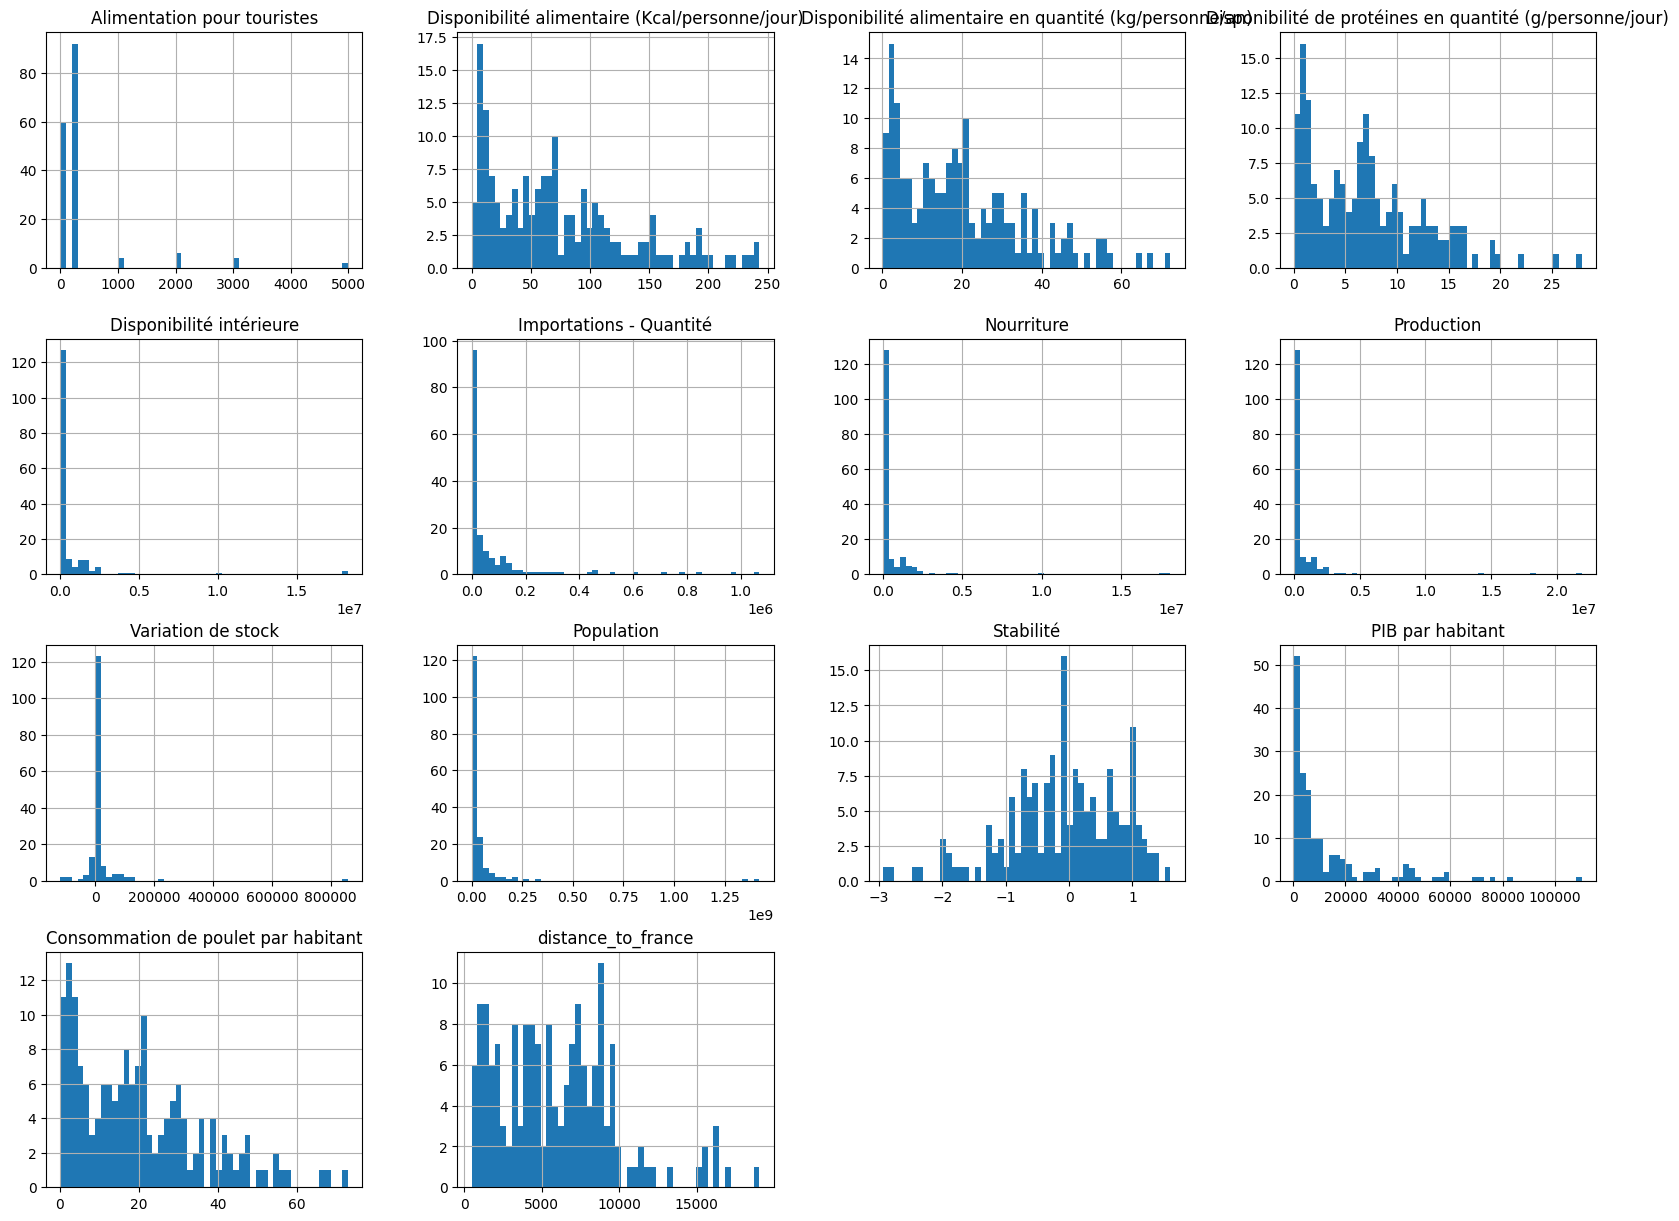

In [ ]:
# Histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

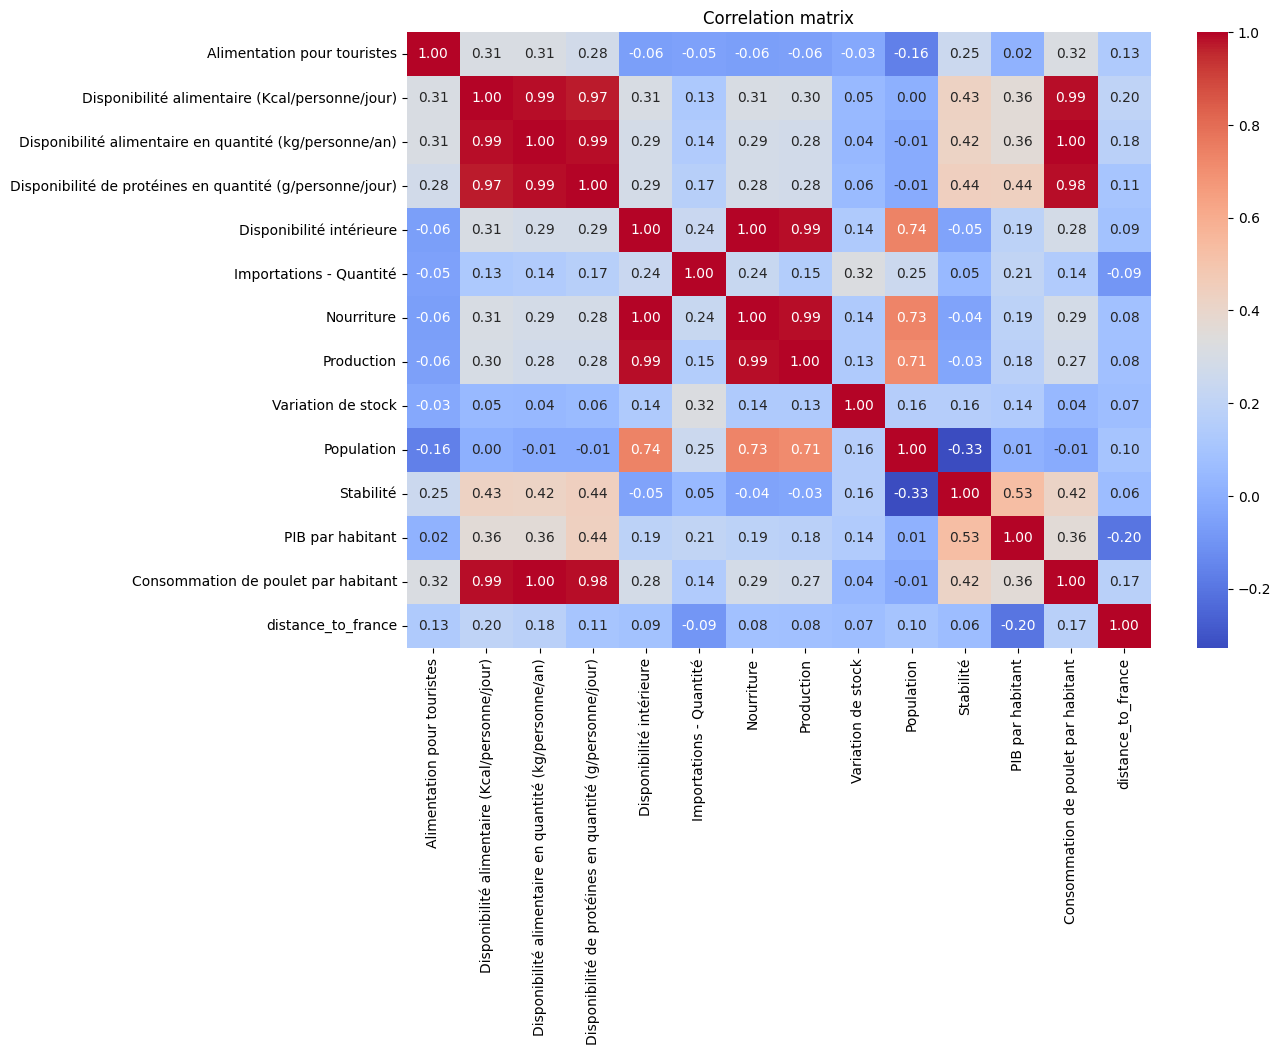

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

We notice that there are variables that are very correlated with each other, we must take appropriate measures to avoid multi-collinearity and improve the performance of our models as a result.

The variable 'Disponibilité alimentaire en quantité (kg/personne/an)' is highly correlated with the variable 'Disponibilité de protéines en quantité (g/personne/jour)', the same for the variable 'Disponibilité intérieure' and the variable 'Production', and also for 'Production' and 'Nourriture'. So to avoid redundancy of information we will delete the 'Disponibilité alimentaire en quantité (kg/personne/an)' and the 'Production'.

In [ ]:
df.drop(columns={'Disponibilité alimentaire (Kcal/personne/jour)',
                 'Disponibilité alimentaire en quantité (kg/personne/an)',
                 'Disponibilité intérieure','Production',
                 'Consommation de poulet par habitant'}, inplace=True)

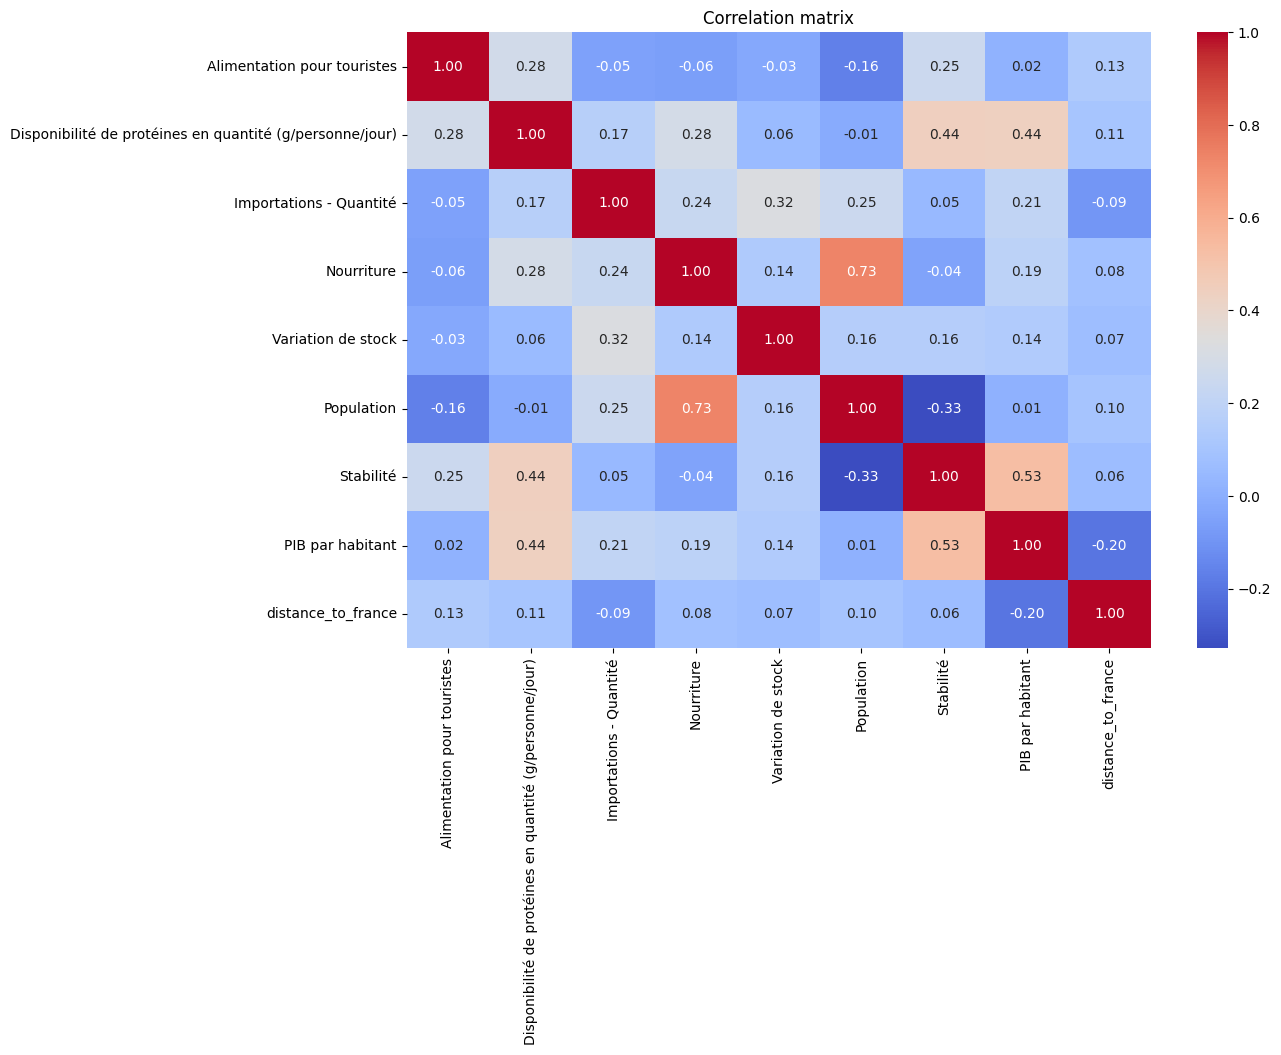

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Write the DataFrame to a CSV file
df.to_csv('mon_fichier.csv', index=False, encoding='utf-8')